# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_ID12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into cells so that it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write justifications for the decisions you make and code you write. 

Your code and analysis is like a story that awaits to be read. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .png
    - .pdf
    - .csv
    
**Please keep the whole code in a single notebook**. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not be considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 10 March, 2025, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the California Department of Forestry and Fire Protection [(CAL FIRE)](https://www.fire.ca.gov). CAL FIRE provides fire prevention and protection, emergency response, and natural resource protection services in the USA. 

In this analysis, we focus on using the data collected by CAL FIRE to build a data analytics solution for structure damage risk prediction. 
The full database represents structures impacted to different extents by wildland fire. The dataset we work with is a sample of the public data released by CAL FIRE, where the outcome for the target feature Damage is known and is only in the category "No Damage" or "Destroyed (>50%)").
https://data.ca.gov/dataset/cal-fire-damage-inspection-dins-data

Each student will work with a different subset of the data. The CSV file is named using the format: **cal-wildfires-[your-student-number].csv**, e.g., **cal-wildfires-12345.csv** is the data file for a student with number 12345. You need to work with the CSV file corresponding to your student number, available from this [[link]](https://drive.google.com/drive/folders/1pJYeBIHYj-2lFTGYSxHym3l_85jkJAyT?usp=share_link). There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B (see first lecture slides for marks to grade mapping scale).


(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Prepare the initial discussion of your findings into a single data quality report PDF file. 
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them (max 5 pages of text). Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features. The notebook provides detailed steps and analysis with code, while the report is a summary of findings and contains no Python code.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 

    - Analyse all features and mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

# (0). Background for the given data analytics problem and dataset

Importing the required packages below

In [4]:
# Import pandas for data analysis
import pandas as pd

# Import package numpy for numeric functions
import numpy as np

# Import matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#For showing plots directly in the notebook run the command below
%matplotlib inline

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages

# Import seaborn library
import seaborn as sns

# Hide ipykernel warnings
import warnings
warnings.filterwarnings('ignore')

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Import re to match strings with regex
import re



In [5]:
# Read from csv file into a data frame
df = pd.read_csv('cal-wildfires-24223321.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

# (1). Prepare a data quality report for the CSV

### Checking the shape of the CSV file

In [6]:
# Check how many rows and columns this dataframe has
df.shape

(10000, 33)

The dataset has 10000 entries with 33 features per entry

### Print the first and last five rows

In [7]:
# First five rows
df.head(5)

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,State,Zip Code,* CAL FIRE Unit,County,Community,Incident Start Date,Hazard Type,Structure Defense Actions Taken,* Structure Type,Structure Category,# Units in Structure (if multi unit),* Roof Construction,* Eaves,* Vent Screen,* Exterior Siding,* Window Pane,* Deck/Porch On Grade,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude
0,63752,Destroyed (>50%),4300.0,Wallace,Road,Unincorporated,CA,0.0,LNU,Sonoma,Riebli,10/8/2017 12:00:00 AM,Fire,NaN,Single Family Residence Single Story,Single Residence,NaN,Fire Resistant,Unknown,Screened,Fire Resistant,Multi Pane,NaN,NaN,NaN,NaN,NaN,NaN,56347.0,NaN,4300 WALLACE RD SANTA ROSA CA 95404,38.501048,-122.685623
1,58216,Destroyed (>50%),20731.0,Santa Rosa Ave,NaN,Middletown,CA,0.0,LNU,Lake,NaN,9/12/2015 12:00:00 AM,Fire,NaN,Utility Misc Structure,Other Minor Structure,NaN,Fire Resistant,Unknown,Unknown,Combustible,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,100454.0,NaN,20731 SANTA ROSA AVE MIDDLETOWN CA 95461,38.759144,-122.631672
2,20194,No Damage,17501.0,Cachagua,Road,NaN,NaN,NaN,BEU,Monterey,NaN,8/16/2020 12:00:00 AM,Fire,NaN,Single Family Residence Single Story,Single Residence,NaN,Asphalt,Unenclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,No Deck/Porch,No Deck/Porch,Combustible,No Fence,NaN,NaN,113005.0,1972.0,17500 CACHAGUA RD CARMEL VALLEY CA 93924,36.417060,-121.674834
3,83242,No Damage,1121.0,Navahoe South,Drive,South Lake Tahoe,CA,96150.0,AEU,El Dorado,South Lake Tahoe,8/14/2021 12:00:00 AM,Fire,Engine Company Actions,Single Family Residence Multi Story,Single Residence,0.0,Asphalt,Enclosed,"Mesh Screen > 1/8""""",Wood,Single Pane,Wood,No Deck/Porch,No Patio Cover/Carport,Combustible,NaN,<30',117423.0,NaN,1121 NAVAHOE DR SOUTH LAKE TAHOE CA 96150,38.851438,-120.016628
4,128000,Destroyed (>50%),1106.0,Galloway,Street,Pacific Palisades,CA,90272.0,LAC,Los Angeles,NaN,1/7/2025 8:02:01 AM,Fire,NaN,Utility Misc Structure,Other Minor Structure,NaN,Asphalt,Unknown,No Vents,Stucco Brick Cement,No Windows,No Deck/Porch,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,NaN,190561.0,1948.0,"1106 GALLOWAY ST, PACIFIC PALISADES, CA 90272",34.049564,-118.521175


In [8]:
# Last five rows
df.tail(5)

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,State,Zip Code,* CAL FIRE Unit,County,Community,Incident Start Date,Hazard Type,Structure Defense Actions Taken,* Structure Type,Structure Category,# Units in Structure (if multi unit),* Roof Construction,* Eaves,* Vent Screen,* Exterior Siding,* Window Pane,* Deck/Porch On Grade,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude
9995,13050,No Damage,270.0,Via Monte,NaN,NaN,CA,NaN,LNU,Napa,Saint Helena,9/27/2020 12:00:00 AM,Fire,Unknown,Single Family Residence Single Story,Single Residence,NaN,Metal,Unenclosed,"Mesh Screen <= 1/8""""",Other,Multi Pane,Masonry/Concrete,Wood,No Patio Cover/Carport,Combustible,NaN,<30',780785.0,1977.0,270 VIA MONTE SAINT HELENA CA 94574,38.526468,-122.475990
9996,33649,Destroyed (>50%),13812.0,Granada,Drive,Magalia,CA,NaN,BTU,Butte,Magalia,11/8/2018 12:00:00 AM,Fire,NaN,Single Family Residence Multi Story,Single Residence,NaN,Asphalt,Unknown,"Mesh Screen > 1/8""""",Combustible,Single Pane,Masonry/Concrete,Unknown,Unknown,Combustible,NaN,NaN,68666.0,1920.0,13812 GRANADA DR MAGALIA CA 95954,39.812605,-121.580407
9997,32816,Destroyed (>50%),5349.0,Harrison,Road,Paradise Southeast B,CA,NaN,BTU,Butte,Paradise,11/8/2018 12:00:00 AM,Fire,Unknown,Single Family Residence Multi Story,Single Residence,NaN,Tile,Unenclosed,"Mesh Screen > 1/8""""",Ignition Resistant,Single Pane,No Deck/Porch,No Deck/Porch,No Patio Cover/Carport,Combustible,NaN,NaN,263954.0,1982.0,5349 HARRISON RD PARADISE CA 95969,39.735187,-121.575156
9998,48338,Destroyed (>50%),154.0,Kings,Place,Westlake Village,CA,NaN,LAC,Los Angeles,Oak Forest,11/8/2018 12:00:00 AM,Fire,Unknown,Mobile Home Double Wide,Single Residence,0.0,Asphalt,No Eaves,Unknown,Combustible,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,34393.0,1976.0,154 KINGS PL WESTLAKE VILLAGE CA 91361,34.131928,-118.811460
9999,2231,Destroyed (>50%),83.0,Oak Tree,Lane,NaN,CA,0.0,BTU,Butte,Berry Creek,9/9/2020 12:00:00 AM,Fire,NaN,Mobile Home Double Wide,Single Residence,0.0,Asphalt,Unknown,"Mesh Screen > 1/8""""",Wood,Multi Pane,No Deck/Porch,Composite,Combustible,No Fence,>30,NaN,11037.0,0.0,"83 OAK TREE LN, BERRY CREEK CA 95916",39.635474,-121.402907


### Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types)

In [9]:
# Cleaning up column headings
df.columns = df.columns.str.replace('*', '')
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('#', 'Num')
df.rename(columns={'OBJECTID': 'ObjectID'}, inplace=True)


In [10]:
# Show the data types
df.dtypes

ObjectID                                                  int64
Damage                                                   object
StreetNumber                                            float64
StreetName                                               object
StreetType(e.g.road,drive,lane,etc.)                     object
City                                                     object
State                                                    object
ZipCode                                                 float64
CALFIREUnit                                              object
County                                                   object
Community                                                object
IncidentStartDate                                        object
HazardType                                               object
StructureDefenseActionsTaken                             object
StructureType                                            object
StructureCategory                       

Based on examining the data...
- ObjectID will be converted to categorical because it serves as an identifier for incidents.
- ZipCode will be converted to categorical because it represents a label or identifier rather than a measurable quantity. Zip codes are used to classify geographical areas. While zip codes are made up of numbers, they do not indicate magnitude and cannot be used to perform arithmetic operations.
- YearBuilt will be converted to int64 (after null values are handled) because the years do not require fractional values
- IncidentStartDate will be converted to date64

In [11]:
# Convert ObjectID column to category data type
df["ObjectID"] = df["ObjectID"].astype("category")
# Convert ZipCode column to category data type
df["ZipCode"] = df["ZipCode"].astype("category")
# Convert IncidentStartDate to date64
df['IncidentStartDate'] = pd.to_datetime(df['IncidentStartDate'], errors='coerce')


In [12]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
object_columns

Index(['Damage', 'StreetName', 'StreetType(e.g.road,drive,lane,etc.)', 'City',
       'State', 'CALFIREUnit', 'County', 'Community', 'HazardType',
       'StructureDefenseActionsTaken', 'StructureType', 'StructureCategory',
       'RoofConstruction', 'Eaves', 'VentScreen', 'ExteriorSiding',
       'WindowPane', 'Deck/PorchOnGrade', 'Deck/PorchElevated',
       'PatioCover/CarportAttachedtoStructure', 'FenceAttachedtoStructure',
       'Distance-PropaneTanktoStructure',
       'Distance-ResidencetoUtility/MiscStructure&gt;120SQFT',
       'SiteAddress(parcel)'],
      dtype='object')

In [13]:
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes 

ObjectID                                                      category
Damage                                                        category
StreetNumber                                                   float64
StreetName                                                    category
StreetType(e.g.road,drive,lane,etc.)                          category
City                                                          category
State                                                         category
ZipCode                                                       category
CALFIREUnit                                                   category
County                                                        category
Community                                                     category
IncidentStartDate                                       datetime64[ns]
HazardType                                                    category
StructureDefenseActionsTaken                                  category
Struct

In [14]:
# Remove parentheses and their content from column names
df.columns = df.columns.str.replace(r'\(.*\)', '', regex=True)

In [15]:
df.dtypes

ObjectID                                                      category
Damage                                                        category
StreetNumber                                                   float64
StreetName                                                    category
StreetType                                                    category
City                                                          category
State                                                         category
ZipCode                                                       category
CALFIREUnit                                                   category
County                                                        category
Community                                                     category
IncidentStartDate                                       datetime64[ns]
HazardType                                                    category
StructureDefenseActionsTaken                                  category
Struct

### Check for duplicate row/columns

In [16]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [17]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


### Result - There are no duplicate rows or columns
- Rows: There are no duplicate rows
- Columns: There are no duplicate columns. We will also check the descriptive stats to make sure we did not miss any duplicated columns

### Check for formatting inconsistencies between categories

In [18]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())  # Display unique values


Column: ObjectID
[63752, 58216, 20194, 83242, 128000, ..., 13050, 33649, 32816, 48338, 2231]
Length: 10000
Categories (10000, int64): [5, 22, 41, 47, ..., 131746, 131774, 131777, 131787]
Column: Damage
['Destroyed (>50%)', 'No Damage']
Categories (2, object): ['Destroyed (>50%)', 'No Damage']
Column: StreetNumber
[ 4300. 20731. 17501. ...  1960. 13812.  5349.]
Column: StreetName
['Wallace', 'Santa Rosa Ave', 'Cachagua', 'Navahoe South', 'Galloway ', ..., 'Vintage ', 'Crimson', 'Delaplain', 'Cantelow ', 'Granada']
Length: 4056
Categories (4055, object): ['-050 Doyle Grade ', '-120 Bear', '-240 Constantia ', '-255 Main', ..., 'toyon', 'unknown', 'w County Line ', 'wildberry']
Column: StreetType
['Road', NaN, 'Drive', 'Street', 'Avenue', ..., 'Route', 'Alley', 'Parkway', '-', 'Pass']
Length: 22
Categories (21, object): ['-', 'Alley', 'Avenue', 'Boulevard', ..., 'Street', 'Terrace', 'Trail', 'Way']
Column: City
['Unincorporated', 'Middletown', NaN, 'South Lake Tahoe', 'Pacific Palisades', 

In [19]:
df['Damage'].dtypes

CategoricalDtype(categories=['Destroyed (>50%)', 'No Damage'], ordered=False, categories_dtype=object)

In [20]:
df['StreetName'].unique()

['Wallace', 'Santa Rosa Ave', 'Cachagua', 'Navahoe South', 'Galloway ', ..., 'Vintage ', 'Crimson', 'Delaplain', 'Cantelow ', 'Granada']
Length: 4056
Categories (4055, object): ['-050 Doyle Grade ', '-120 Bear', '-240 Constantia ', '-255 Main', ..., 'toyon', 'unknown', 'w County Line ', 'wildberry']

In [21]:
# Function to consistently format street name labels
def normalize_street_name(name):
    name = name.upper().strip()  # Convert to lowercase and remove leading/trailing spaces
    name = re.sub(r'\W+', ' ', name)  # Remove special characters
    name = re.sub(r'\bst\b', 'street', name)  # Expand common abbreviations
    name = re.sub(r'\bave\b', 'avenue', name)
    name = re.sub(r'\brd\b', 'road', name)
    name = re.sub(r'\bblvd\b', 'boulevard', name)
    return name

# Apply function
df['StreetName'] = df['StreetName'].apply(normalize_street_name)
df['StreetName'] = df['StreetName'].astype('category')
df['StreetName'].unique()

['WALLACE', 'SANTA ROSA AVE', 'CACHAGUA', 'NAVAHOE SOUTH', 'GALLOWAY', ..., 'GOLDEN OAK', 'LATIGO CANYON', 'CRIMSON', 'DELAPLAIN', 'GRANADA']
Length: 3322
Categories (3321, object): [' 050 DOYLE GRADE', ' 120 BEAR', ' 240 CONSTANTIA', ' 255 MAIN', ..., 'ZENITH POINT', 'ZINK', 'ZOGG MINE', 'ZUCKERMAN']

After normalizing street names, the number of unique categories has been reduced

In [22]:
df['StreetType'].unique()

['Road', NaN, 'Drive', 'Street', 'Avenue', ..., 'Route', 'Alley', 'Parkway', '-', 'Pass']
Length: 22
Categories (21, object): ['-', 'Alley', 'Avenue', 'Boulevard', ..., 'Street', 'Terrace', 'Trail', 'Way']

In [23]:
# If StreetType label is not None, then remove whitespace and convert to uppercase
df['StreetType'] = df['StreetType'].apply(lambda x: str(x).upper().strip() if x is not None else x)

In [24]:
# Combine Highway and Hwy
df['StreetType'] = df['StreetType'].replace({'HWY': 'HIGHWAY'})
df['StreetType'].unique()

['ROAD', NaN, 'DRIVE', 'STREET', 'AVENUE', ..., 'ROUTE', 'ALLEY', 'PARKWAY', '-', 'PASS']
Length: 21
Categories (20, object): ['-', 'ALLEY', 'AVENUE', 'BOULEVARD', ..., 'STREET', 'TERRACE', 'TRAIL', 'WAY']

In [25]:
df['City'].unique()

['Unincorporated', 'Middletown', NaN, 'South Lake Tahoe', 'Pacific Palisades', ..., 'San Juan Bautista', 'Anaheim ', 'Herald', 'Napa ', 'Paso Robles, CA']
Length: 256
Categories (255, object): ['Adin', 'Agoura Hills', 'Aguanga', 'Alpine', ..., 'Yucaipa ', 'Zenia', 'banning', 'na']

In [26]:
def normalize_city_name(name):
    name = name.upper().strip()  # Convert to lowercase and remove leading/trailing spaces
    name = re.sub(r'\W+', ' ', name)  # Remove special characters
    name = re.sub(r'\btwn\b', 'town', name)  # Expand common abbreviations -> twn = TOWN
    name = re.sub(r'\bctr\b', 'center', name) # ctr = CENTER
    name = re.sub(r'\bhts\b', 'heights', name) # hts = HEIGHTS
    name = re.sub(r'\bmt\b', 'mount', name) # mt = MOUNT
    return name

# Apply function
df['City'] = df['City'].apply(normalize_city_name)
df['City'] = df['City'].astype('category')

# Show unique city names after standardization
df['City'].unique()


['UNINCORPORATED', 'MIDDLETOWN', NaN, 'SOUTH LAKE TAHOE', 'PACIFIC PALISADES', ..., 'GAVIOTA', 'VALLEY SPRINGS', 'SAN JUAN BAUTISTA', 'HERALD', 'PASO ROBLES CA']
Length: 218
Categories (217, object): ['ADIN', 'AGOURA HILLS', 'AGUANGA', 'ALPINE', ..., 'WRIGHTWOOD', 'YREKA', 'YUCAIPA', 'ZENIA']

After cleaning labels, the number of unique category labels for City has been reduced

In [27]:
# No need to standardized labels for State, only one unique value
df['State'].unique()

['CA', NaN]
Categories (1, object): ['CA']

In [28]:
# Will convert ZipCode to category after resolving NaN values in data quality plan
df['ZipCode'].unique()

[0.0, NaN, 96150.0, 90272.0, 95636.0, ..., 95979.0, 95252.0, 95045.0, 92808.0, 95638.0]
Length: 149
Categories (148, float64): [0.0, 90049.0, 90263.0, 90265.0, ..., 96122.0, 96129.0, 96130.0, 96150.0]

In [29]:
df['CALFIREUnit'].unique()

['LNU', 'BEU', 'AEU', 'LAC', 'CZU', ..., 'MMU', 'TGU', 'SBC', 'HUU', 'SLU']
Length: 26
Categories (26, object): ['AEU', 'BDU', 'BEU', 'BTU', ..., 'TCU', 'TGU', 'TUU', 'VNC']

In [30]:
def normalize(name):
    name = name.upper().strip()  # Convert to uppercase and remove leading/trailing spaces
    name = re.sub(r'\W+', ' ', name)  # Remove special characters
    return name

# Apply function
df['CALFIREUnit'] = df['CALFIREUnit'].apply(normalize)
df['CALFIREUnit'] = df['CALFIREUnit'].astype('category')

# Show unique normalized city names
df['CALFIREUnit'].unique()

['LNU', 'BEU', 'AEU', 'LAC', 'CZU', ..., 'MMU', 'TGU', 'SBC', 'HUU', 'SLU']
Length: 26
Categories (26, object): ['AEU', 'BDU', 'BEU', 'BTU', ..., 'TCU', 'TGU', 'TUU', 'VNC']

There were no inconsistencies in labeling for CALFireUnit

In [31]:
df['County'].unique()

['Sonoma', 'Lake', 'Monterey', 'El Dorado', 'Los Angeles', ..., 'Inyo', 'San Luis Obispo', 'Colusa', 'San Benito', 'Sacramento']
Length: 49
Categories (48, object): ['Alameda', 'Alpine', 'Amador', 'Butte', ..., 'Tuolumne', 'Ventura', 'Yolo', 'Yuba']

In [32]:
# Apply function
df['County'] = df['County'].apply(normalize)
df['County'] = df['County'].astype('category')

df['County'].unique()

['SONOMA', 'LAKE', 'MONTEREY', 'EL DORADO', 'LOS ANGELES', ..., 'INYO', 'SAN LUIS OBISPO', 'COLUSA', 'SAN BENITO', 'SACRAMENTO']
Length: 49
Categories (48, object): ['ALAMEDA', 'ALPINE', 'AMADOR', 'BUTTE', ..., 'TUOLUMNE', 'VENTURA', 'YOLO', 'YUBA']

There were no inconsistencies in labeling for County

In [33]:
df['Community'].unique()

['Riebli', NaN, 'South Lake Tahoe ', 'Middletown ', 'Carmel Valley', ..., 'Trancas Vinyard', 'Avenues', 'Clearlake', 'Calabasas', 'Thousand Oaks']
Length: 425
Categories (424, object): ['-', 'A', 'Agoura Hills', 'Agoura Hills ', ..., 'hidden vally area', 'junction city ', 'middletown', 'paradise']

In [34]:
# Apply function
df['Community'] = df['Community'].apply(normalize)
df['Community'] = df['Community'].astype('category')
df['Community'].unique()

['RIEBLI', NaN, 'SOUTH LAKE TAHOE', 'MIDDLETOWN', 'CARMEL VALLEY', ..., 'TRANCAS VINYARD', 'AVENUES', 'CLEARLAKE', 'CALABASAS', 'THOUSAND OAKS']
Length: 314
Categories (313, object): [' ', 'A', 'AGOURA HILLS', 'ALPINE', ..., 'WRIGHTWOOD', 'YANKEE HILL', 'ZUMA', 'ZUMA BEACH']

After standardizing the category labels for Community, the number of unique categories has been reduced

In [35]:
df['IncidentStartDate'].unique()

<DatetimeArray>
['2017-10-08 00:00:00', '2015-09-12 00:00:00', '2020-08-16 00:00:00',
 '2021-08-14 00:00:00', '2025-01-07 08:02:01', '2020-09-04 00:00:00',
 '2015-09-09 00:00:00', '2018-11-08 00:00:00', '2017-07-07 00:00:00',
 '2022-09-05 00:00:00',
 ...
 '2022-07-31 00:00:00', '2024-06-25 00:00:00', '2022-08-03 00:00:00',
 '2018-07-08 00:00:00', '2023-07-18 20:35:00', '2025-01-07 21:11:00',
 '2023-07-03 19:46:00', '2022-07-21 00:00:00', '2022-06-06 00:00:00',
 '2018-09-02 00:00:00']
Length: 139, dtype: datetime64[ns]

In [36]:
# Standardize to 'YYYY-MM-DD HH:MM' format
df['IncidentStartDate'] = df['IncidentStartDate'].dt.strftime('%Y-%m-%d %H:%M')

In [37]:
len(df['IncidentStartDate'].unique())

139

The number of unique values for IncidentStartDate remainded the same, but all entries have documented in the same 'YYYY-M HH:MM' format now

In [38]:
# HazardType only has one value (Fire)
df['HazardType'].unique()

['Fire']
Categories (1, object): ['Fire']

In [39]:
df['StructureDefenseActionsTaken'].unique()

[NaN, 'Engine Company Actions', 'Unknown', 'Other', 'Fire Department', ..., 'Combination of Actions', 'Hand Crew Fuel Break', 'Fire Retardant Drop', 'Civilian', 'Both']
Length: 11
Categories (10, object): ['Both', 'Civilian', 'Combination of Actions', 'Dozer Fuel Break', ..., 'Fire Retardant Drop', 'Hand Crew Fuel Break', 'Other', 'Unknown']

In [40]:
# Apply function
df['StructureDefenseActionsTaken'] = df['StructureDefenseActionsTaken'].apply(normalize)
df['StructureDefenseActionsTaken'] = df['StructureDefenseActionsTaken'].astype('category')
df['StructureDefenseActionsTaken'].unique()

[NaN, 'ENGINE COMPANY ACTIONS', 'UNKNOWN', 'OTHER', 'FIRE DEPARTMENT', ..., 'COMBINATION OF ACTIONS', 'HAND CREW FUEL BREAK', 'FIRE RETARDANT DROP', 'CIVILIAN', 'BOTH']
Length: 11
Categories (10, object): ['BOTH', 'CIVILIAN', 'COMBINATION OF ACTIONS', 'DOZER FUEL BREAK', ..., 'FIRE RETARDANT DROP', 'HAND CREW FUEL BREAK', 'OTHER', 'UNKNOWN']

The number of unique values for StructureDefenseActionsTaken remained the same after cleaning up labeling

In [41]:
df['StructureType'].unique()

['Single Family Residence Single Story', 'Utility Misc Structure', 'Single Family Residence Multi Story', 'Mobile Home Double Wide', 'Mobile Home Single Wide', ..., 'Commercial Building Multi Story', 'Mobile Home Triple Wide', 'Hospital', 'Single Famliy Residence Single Story', 'Utility or Miscellaneous Structure > 120 sqft']
Length: 18
Categories (18, object): ['Church', 'Commercial Building Multi Story', 'Commercial Building Single Story', 'Hospital', ..., 'Single Family Residence Single Story', 'Single Famliy Residence Single Story', 'Utility Misc Structure', 'Utility or Miscellaneous Structure > 120 sqft']

In [42]:
# Apply function
df['StructureType'] = df['StructureType'].apply(normalize)
df['StructureType'] = df['StructureType'].astype('category')
df['StructureType'].unique()

# Correct misspelling in 'SINGLE FAMLIY RESIDENCE SINGLE STORY'
df['StructureType'] = df['StructureType'].replace({'SINGLE FAMLIY RESIDENCE SINGLE STORY': 'SINGLE FAMILY RESIDENCE SINGLE STORY'})
df['StructureType'].unique()

['SINGLE FAMILY RESIDENCE SINGLE STORY', 'UTILITY MISC STRUCTURE', 'SINGLE FAMILY RESIDENCE MULTI STORY', 'MOBILE HOME DOUBLE WIDE', 'MOBILE HOME SINGLE WIDE', ..., 'SCHOOL', 'COMMERCIAL BUILDING MULTI STORY', 'MOBILE HOME TRIPLE WIDE', 'HOSPITAL', 'UTILITY OR MISCELLANEOUS STRUCTURE 120 SQFT']
Length: 17
Categories (17, object): ['CHURCH', 'COMMERCIAL BUILDING MULTI STORY', 'COMMERCIAL BUILDING SINGLE STORY', 'HOSPITAL', ..., 'SINGLE FAMILY RESIDENCE MULTI STORY', 'SINGLE FAMILY RESIDENCE SINGLE STORY', 'UTILITY MISC STRUCTURE', 'UTILITY OR MISCELLANEOUS STRUCTURE 120 SQFT']

The number of unique values in StructureType was reduced after cleaning up the labels

In [43]:
df['StructureCategory'].unique()

['Single Residence', 'Other Minor Structure', 'Multiple Residence', 'Infrastructure', 'Nonresidential Commercial', 'Mixed Commercial/Residential']
Categories (6, object): ['Infrastructure', 'Mixed Commercial/Residential', 'Multiple Residence', 'Nonresidential Commercial', 'Other Minor Structure', 'Single Residence']

In [44]:
# Apply function
df['StructureCategory'] = df['StructureCategory'].apply(normalize)
df['StructureCategory'] = df['StructureCategory'].astype('category')
df['StructureCategory'].unique()

['SINGLE RESIDENCE', 'OTHER MINOR STRUCTURE', 'MULTIPLE RESIDENCE', 'INFRASTRUCTURE', 'NONRESIDENTIAL COMMERCIAL', 'MIXED COMMERCIAL RESIDENTIAL']
Categories (6, object): ['INFRASTRUCTURE', 'MIXED COMMERCIAL RESIDENTIAL', 'MULTIPLE RESIDENCE', 'NONRESIDENTIAL COMMERCIAL', 'OTHER MINOR STRUCTURE', 'SINGLE RESIDENCE']

The number of unique values in StructureCategory remainded the same after cleaning up the labels

In [45]:
df['RoofConstruction'].unique()

['Fire Resistant', 'Asphalt', 'Other', 'Unknown', 'Tile', ..., 'Wood', NaN, 'Combustible', 'Concrete', 'Non Combustible']
Length: 11
Categories (10, object): ['Asphalt', 'Combustible', 'Concrete', 'Fire Resistant', ..., 'Other', 'Tile', 'Unknown', 'Wood']

In [46]:
# Apply function
df['RoofConstruction'] = df['RoofConstruction'].apply(normalize)
df['RoofConstruction'] = df['RoofConstruction'].astype('category')
df['RoofConstruction'].unique()

['FIRE RESISTANT', 'ASPHALT', 'OTHER', 'UNKNOWN', 'TILE', ..., 'WOOD', NaN, 'COMBUSTIBLE', 'CONCRETE', 'NON COMBUSTIBLE']
Length: 11
Categories (10, object): ['ASPHALT', 'COMBUSTIBLE', 'CONCRETE', 'FIRE RESISTANT', ..., 'OTHER', 'TILE', 'UNKNOWN', 'WOOD']

The number of unique values in RoofConstruction remainded the same after cleaning up the labels

In [47]:
df['Eaves'].unique()

['Unknown', 'Unenclosed', 'Enclosed', 'No Eaves', NaN, 'Not Applicable']
Categories (5, object): ['Enclosed', 'No Eaves', 'Not Applicable', 'Unenclosed', 'Unknown']

In [48]:
# Apply function
df['Eaves'] = df['Eaves'].apply(normalize)
df['Eaves'] = df['Eaves'].astype('category')
df['Eaves'].unique()

['UNKNOWN', 'UNENCLOSED', 'ENCLOSED', 'NO EAVES', NaN, 'NOT APPLICABLE']
Categories (5, object): ['ENCLOSED', 'NO EAVES', 'NOT APPLICABLE', 'UNENCLOSED', 'UNKNOWN']

The number of unique values in Eaves remained the same after cleaning up the labels

In [49]:
df['VentScreen'].unique()

['Screened', 'Unknown', 'Mesh Screen > 1/8""', 'No Vents', 'Mesh Screen <= 1/8""', NaN, 'Unscreened']
Categories (6, object): ['Mesh Screen <= 1/8""', 'Mesh Screen > 1/8""', 'No Vents', 'Screened', 'Unknown', 'Unscreened']

In [50]:
df['VentScreen'].unique()
# Apply function
df['VentScreen'] = df['VentScreen'].apply(normalize)
df['VentScreen'] = df['Eaves'].astype('category')
df['VentScreen'].unique()

['UNKNOWN', 'UNENCLOSED', 'ENCLOSED', 'NO EAVES', NaN, 'NOT APPLICABLE']
Categories (5, object): ['ENCLOSED', 'NO EAVES', 'NOT APPLICABLE', 'UNENCLOSED', 'UNKNOWN']

In [51]:
df['ExteriorSiding'].unique()

['Fire Resistant', 'Combustible', 'Wood', 'Stucco Brick Cement', 'Other', ..., 'Ignition Resistant', 'Metal', NaN, 'Vinyl', 'Stucco/Brick/Cement']
Length: 11
Categories (10, object): ['Combustible', 'Fire Resistant', 'Ignition Resistant', 'Metal', ..., 'Stucco/Brick/Cement', 'Unknown', 'Vinyl', 'Wood']

In [52]:
# Apply function
df['ExteriorSiding'] = df['ExteriorSiding'].apply(normalize)
df['ExteriorSiding'] = df['ExteriorSiding'].astype('category')
df['ExteriorSiding'].unique()

['FIRE RESISTANT', 'COMBUSTIBLE', 'WOOD', 'STUCCO BRICK CEMENT', 'OTHER', 'UNKNOWN', 'IGNITION RESISTANT', 'METAL', NaN, 'VINYL']
Categories (9, object): ['COMBUSTIBLE', 'FIRE RESISTANT', 'IGNITION RESISTANT', 'METAL', ..., 'STUCCO BRICK CEMENT', 'UNKNOWN', 'VINYL', 'WOOD']

The number of unique values in ExteriorSiding was reduced after cleaning up the labels

In [53]:
df['WindowPane'].unique()

['Multi Pane', 'Unknown', 'Single Pane', 'No Windows', NaN]
Categories (4, object): ['Multi Pane', 'No Windows', 'Single Pane', 'Unknown']

In [54]:
# Apply function
df['WindowPane'] = df['WindowPane'].apply(normalize)
df['WindowPane'] = df['WindowPane'].astype('category')
df['WindowPane'].unique()

['MULTI PANE', 'UNKNOWN', 'SINGLE PANE', 'NO WINDOWS', NaN]
Categories (4, object): ['MULTI PANE', 'NO WINDOWS', 'SINGLE PANE', 'UNKNOWN']

The number of unique values in WindowPane remained the same after cleaning up the labels

In [55]:
df['Deck/PorchOnGrade'].unique()

[NaN, 'No Deck/Porch', 'Wood', 'Unknown', 'Masonry/Concrete', 'Composite']
Categories (5, object): ['Composite', 'Masonry/Concrete', 'No Deck/Porch', 'Unknown', 'Wood']

In [56]:
# Apply function
df['Deck/PorchOnGrade'] = df['Deck/PorchOnGrade'].apply(normalize)
df['Deck/PorchOnGrade'] = df['Deck/PorchOnGrade'].astype('category')
df['Deck/PorchOnGrade'].unique()

[NaN, 'NO DECK PORCH', 'WOOD', 'UNKNOWN', 'MASONRY CONCRETE', 'COMPOSITE']
Categories (5, object): ['COMPOSITE', 'MASONRY CONCRETE', 'NO DECK PORCH', 'UNKNOWN', 'WOOD']

The number of unique values in Deck/PorchOnGrade remained the same after cleaning up the labels

In [57]:
df['Deck/PorchElevated'].unique()

[NaN, 'No Deck/Porch', 'Unknown', 'Wood', 'Masonry/Concrete', 'Composite']
Categories (5, object): ['Composite', 'Masonry/Concrete', 'No Deck/Porch', 'Unknown', 'Wood']

In [58]:
# Apply function
df['Deck/PorchElevated'] = df['Deck/PorchElevated'].apply(normalize)
df['Deck/PorchElevated'] = df['Deck/PorchElevated'].astype('category')
df['Deck/PorchElevated'].unique()

[NaN, 'NO DECK PORCH', 'UNKNOWN', 'WOOD', 'MASONRY CONCRETE', 'COMPOSITE']
Categories (5, object): ['COMPOSITE', 'MASONRY CONCRETE', 'NO DECK PORCH', 'UNKNOWN', 'WOOD']

The number of unique values in Deck/PorchElevated remained the same after cleaning up the labels

In [59]:
df['PatioCover/CarportAttachedtoStructure'].unique()

[NaN, 'Combustible', 'No Patio Cover/Carport', 'Unknown', 'Non Combustible']
Categories (4, object): ['Combustible', 'No Patio Cover/Carport', 'Non Combustible', 'Unknown']

In [60]:
# Apply function
df['PatioCover/CarportAttachedtoStructure'] = df['PatioCover/CarportAttachedtoStructure'].apply(normalize)
df['PatioCover/CarportAttachedtoStructure'] = df['PatioCover/CarportAttachedtoStructure'].astype('category')
df['PatioCover/CarportAttachedtoStructure'].unique()

[NaN, 'COMBUSTIBLE', 'NO PATIO COVER CARPORT', 'UNKNOWN', 'NON COMBUSTIBLE']
Categories (4, object): ['COMBUSTIBLE', 'NO PATIO COVER CARPORT', 'NON COMBUSTIBLE', 'UNKNOWN']

In [61]:
df['FenceAttachedtoStructure'].unique()

[NaN, 'No Fence', 'Combustible', 'Unknown', 'Non Combustible']
Categories (4, object): ['Combustible', 'No Fence', 'Non Combustible', 'Unknown']

In [62]:
# Apply function
df['FenceAttachedtoStructure'] = df['FenceAttachedtoStructure'].apply(normalize)
df['FenceAttachedtoStructure'] = df['FenceAttachedtoStructure'].astype('category')
df['FenceAttachedtoStructure'].unique()

[NaN, 'NO FENCE', 'COMBUSTIBLE', 'UNKNOWN', 'NON COMBUSTIBLE']
Categories (4, object): ['COMBUSTIBLE', 'NO FENCE', 'NON COMBUSTIBLE', 'UNKNOWN']

The number of unique values in FenceAttachedtoStructure remained the same after cleaning up the labels

In [63]:
df['Distance-PropaneTanktoStructure'].unique()

[NaN, '11-20', 'Unknown', '>30', '21-30', '0-10']
Categories (5, object): ['0-10', '11-20', '21-30', '>30', 'Unknown']

In [64]:
df['Distance-ResidencetoUtility/MiscStructure&gt;120SQFT'].unique()

[NaN, '<30'', '30-50'', '>50'', '30', '50']
Categories (5, object): ['30', '30-50'', '50', '<30'', '>50'']

In [65]:
df['SiteAddress'].unique()

['4300 WALLACE RD SANTA ROSA CA 95404', '20731 SANTA ROSA AVE MIDDLETOWN CA 95461', '17500 CACHAGUA RD CARMEL VALLEY CA 93924', '1121 NAVAHOE DR SOUTH LAKE TAHOE CA 96150', '1106 GALLOWAY ST, PACIFIC PALISADES, CA 90272', ..., '270 VIA MONTE SAINT HELENA CA 94574', '13812  GRANADA DR   MAGALIA CA 95954', '5349  HARRISON RD   PARADISE CA 95969', '154 KINGS PL WESTLAKE VILLAGE CA 91361', '83 OAK TREE LN, BERRY CREEK CA 95916']
Length: 8542
Categories (8541, object): ['0  CENTERVILLE RD   CHICO CA 95926', '0  CONISTON LOOP   CONCOW CA 95965', '0  FOSTER RD   PARADISE CA 95969', '0  GRANITE RIDGE RD   CONCOW CA 95965', ..., 'WALLACE CREEK RD HEALDSBURG CA 95448', 'WEED CA 96094', 'WINTERS CA 95694', 'WOFFORD HEIGHTS CA 93285']

In [66]:
# Apply function
df['SiteAddress'] = df['SiteAddress'].apply(normalize)
df['SiteAddress'] = df['SiteAddress'].astype('category')
df['SiteAddress'].unique()

['4300 WALLACE RD SANTA ROSA CA 95404', '20731 SANTA ROSA AVE MIDDLETOWN CA 95461', '17500 CACHAGUA RD CARMEL VALLEY CA 93924', '1121 NAVAHOE DR SOUTH LAKE TAHOE CA 96150', '1106 GALLOWAY ST PACIFIC PALISADES CA 90272', ..., '270 VIA MONTE SAINT HELENA CA 94574', '13812 GRANADA DR MAGALIA CA 95954', '5349 HARRISON RD PARADISE CA 95969', '154 KINGS PL WESTLAKE VILLAGE CA 91361', '83 OAK TREE LN BERRY CREEK CA 95916']
Length: 8535
Categories (8534, object): ['0 CENTERVILLE RD CHICO CA 95926', '0 CONISTON LOOP CONCOW CA 95965', '0 COUNTRY CLUB DR', '0 FOSTER RD PARADISE CA 95969', ..., 'WALLACE CREEK RD HEALDSBURG CA 95448', 'WEED CA 96094', 'WINTERS CA 95694', 'WOFFORD HEIGHTS CA 93285']

The number of unique values in SiteAddress was reduced after cleaning up the labels

### Check for constant columns

In [67]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
ObjectID,10000,10000,5,1
Damage,10000,2,Destroyed (>50%),5724
StreetName,9564,3321,PENTZ,71
StreetType,8888,20,ROAD,3441
City,7629,217,UNINCORPORATED,1300
State,9999,1,CA,9999
ZipCode,5997.0,148.0,0.0,1912.0
CALFIREUnit,10000,26,LAC,2626
County,9998,48,LOS ANGELES,2626
Community,4193,313,PARADISE,1150


Categorical Data - Reviewing the categorical data above...
- Consider dropping the HazardType column. All 10,000 entries have the value "Fire" for this feature.
- Consider dropping SiteAddress column, these values are broken out into separate features already

In [68]:
# Print table with continuous statistics
df.select_dtypes(include=['float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
StreetNumber,9655.0,9831.927706,4.129023e+04,0.000000,700.000000,3060.000000,8398.500000,7.471500e+05
NumUnitsinStructure,2970.0,0.225253,1.066705e+00,0.000000,0.000000,0.000000,0.000000,1.100000e+01
AssessedImprovedValue,9497.0,658700.816468,8.669051e+06,0.000000,70858.000000,159740.000000,339586.000000,5.226526e+08
YearBuilt,7617.0,1760.054746,6.014169e+02,0.000000,1940.000000,1962.000000,1984.000000,2.022000e+03
Latitude,10000.0,37.355887,2.509915e+00,32.597628,34.195100,38.475126,39.742731,4.195725e+01
Longitude,10000.0,-120.502913,1.829930e+00,-123.774580,-122.135493,-121.402610,-118.537856,-1.166239e+02


Continuous Data
1. StreetNumber
- The standard deviation is much larger than the mean, indicating a wide range of values
- The max value is significantly larger than the 75th percentile, indiciating potential extreme outliers or errors
- The min of 0 may indicate missing or placeholder values
2. NumUnitsinStructure
- The mean is very close to zero, and the percentiles show that most values are 0
- The count indicates that there are a lot of missing values
3. AssessedImprovedValue
- The max is much larger than the mean and even the 75th percentile, indicating an extreme high outlier
- The standard deviation indicates a highly skewed distribution
- The min of 0 indicates that some properties may not have an assessed improved valuation
4. YearBuilt
- The min of 0 indicates missing or incomplete data
5. Latitude & Longitude
- The min and max values fall within expected ranges


In [69]:
unique_latitudes = df["Latitude"].nunique()
unique_longitudes = df["Longitude"].nunique()

print("Unique Latitudes:", unique_latitudes)
print("Unique Longitudes:", unique_longitudes)

Unique Latitudes: 9999
Unique Longitudes: 9997


**Running Assessment:**
<br><br>
| Feature    | Assessment |
| -------- | ------- |
| NumUnitsinStructure | Standard deviation of 1.07 is much larger than the mean of 0.225, suggesting that most structures have few or no units. 0 is likely a placeholder for missing values, resulting in a skewed data set. There are a few outliers with many units. Note for further investigation.     |
| AssessedImprovedValue    | Extremely high standard deviation indicates that property values vary draastically. There are likely extreme outliers, such as properties with very high assessed values. Potential action includes capping extreme values or transforming data to reduce impact of outliers.    |
| YearBuilt    | Mean of 1760 and standard deviation 601.42 indicates that there are likely a significant number of 0 values. Note for further investigation.    |
| Latitude and Longitude    | Both features have relatively small standard deviations, indicating that the homes are clustered in a specific geographic area. This is to be expected.    |

### Continuous Data - Reviewing the continuous data above, we can see that all numerical features have a non-zero standard deviation
- This implies that a particular feature does not contain a single constant value in all of the rows. In this case, none of the continuous features are constant.

### Check for Null Values

In [70]:
df.isnull().sum()

ObjectID                                                   0
Damage                                                     0
StreetNumber                                             345
StreetName                                               436
StreetType                                              1112
City                                                    2371
State                                                      1
ZipCode                                                 4003
CALFIREUnit                                                0
County                                                     2
Community                                               5807
IncidentStartDate                                          0
HazardType                                                 0
StructureDefenseActionsTaken                            7387
StructureType                                              0
StructureCategory                                          0
NumUnitsinStructure     

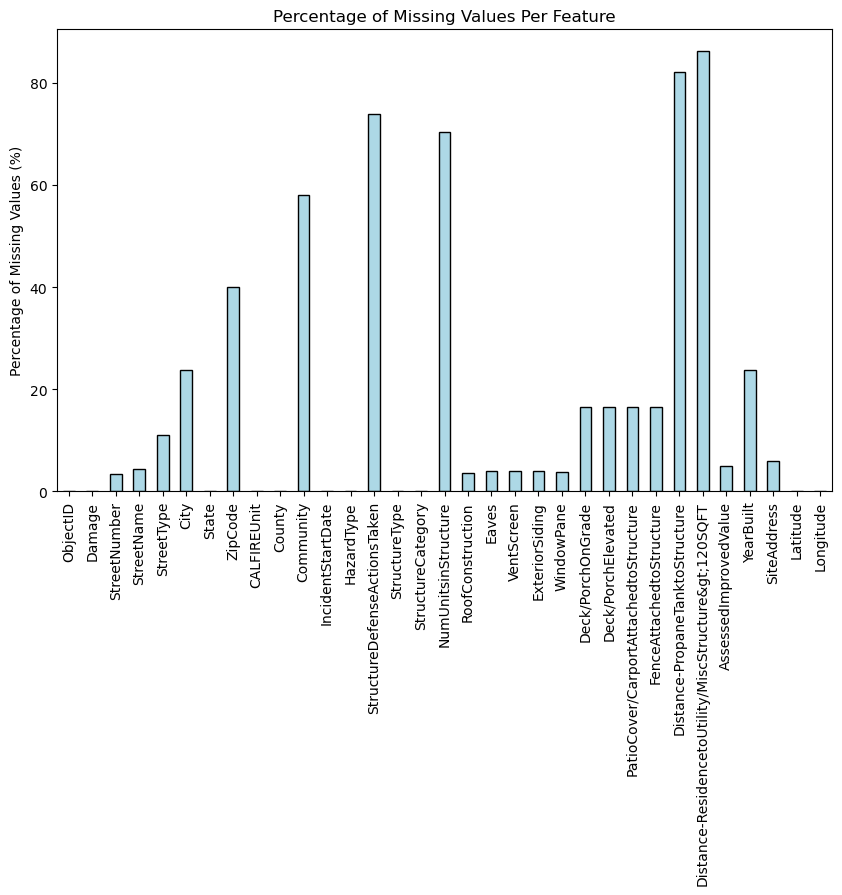

In [71]:
# Bar plot to count missing values per column
missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100

plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Percentage of Missing Values Per Feature")
plt.ylabel("Percentage of Missing Values (%)")
plt.show()




**Interpretation of the Bar Chart**
- Several features have null values for a significant number of records (>50%), such as StructureDefenseActionsTaken, Distance-PropaneTanktoStructure, and NumUnitsinStructure
- Will note these features for future review, as they may need to be dropped from the dataset

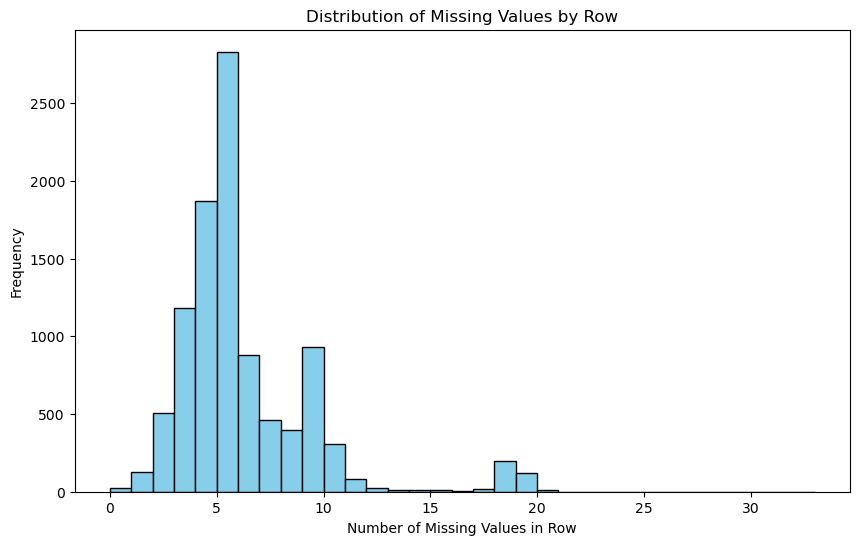

In [72]:
# Row-wise missing data count
row_missing = df.isnull().sum(axis=1)

# Plot histogram of row-wise missing values
plt.figure(figsize=(10, 6))
plt.hist(row_missing, bins=range(df.shape[1] + 1), color='skyblue', edgecolor='black')
plt.title("Distribution of Missing Values by Row")
plt.xlabel("Number of Missing Values in Row")
plt.ylabel("Frequency")
plt.show()


**Intepretation of histogram**
- The x-axis represents the number of missing values in each row
- The y-axis represents the frequency of rows that have a specific number of missing values
- With a peak at 6 missing values per row, there are many rows that have missing values. Consider imputing missing values or dropping rows with multiple missing features

In [73]:
# Calculate percentage of null values per column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result
print(null_percentage)

ObjectID                                                 0.00
Damage                                                   0.00
StreetNumber                                             3.45
StreetName                                               4.36
StreetType                                              11.12
City                                                    23.71
State                                                    0.01
ZipCode                                                 40.03
CALFIREUnit                                              0.00
County                                                   0.02
Community                                               58.07
IncidentStartDate                                        0.00
HazardType                                               0.00
StructureDefenseActionsTaken                            73.87
StructureType                                            0.00
StructureCategory                                        0.00
NumUnits

### Result: There are several features with a significant number of null values
- To further inspect the features with null values, null percentages were calculated

### Check for null values that may be coded differently (While reviewing the CSV, noted that there were "Unknown" values)

In [74]:
counts = (df == "UNKNOWN").sum()
print(counts)

ObjectID                                                   0
Damage                                                     0
StreetNumber                                               0
StreetName                                                24
StreetType                                                 0
City                                                       0
State                                                      0
ZipCode                                                    0
CALFIREUnit                                                0
County                                                     0
Community                                                  2
IncidentStartDate                                          0
HazardType                                                 0
StructureDefenseActionsTaken                            2052
StructureType                                              0
StructureCategory                                          0
NumUnitsinStructure     

In [75]:
counts = ((df == "UNKNOWN") | df.isnull()).sum()
print(counts)

ObjectID                                                   0
Damage                                                     0
StreetNumber                                             345
StreetName                                               460
StreetType                                              1112
City                                                    2371
State                                                      1
ZipCode                                                 4003
CALFIREUnit                                                0
County                                                     2
Community                                               5809
IncidentStartDate                                          0
HazardType                                                 0
StructureDefenseActionsTaken                            9439
StructureType                                              0
StructureCategory                                          0
NumUnitsinStructure     

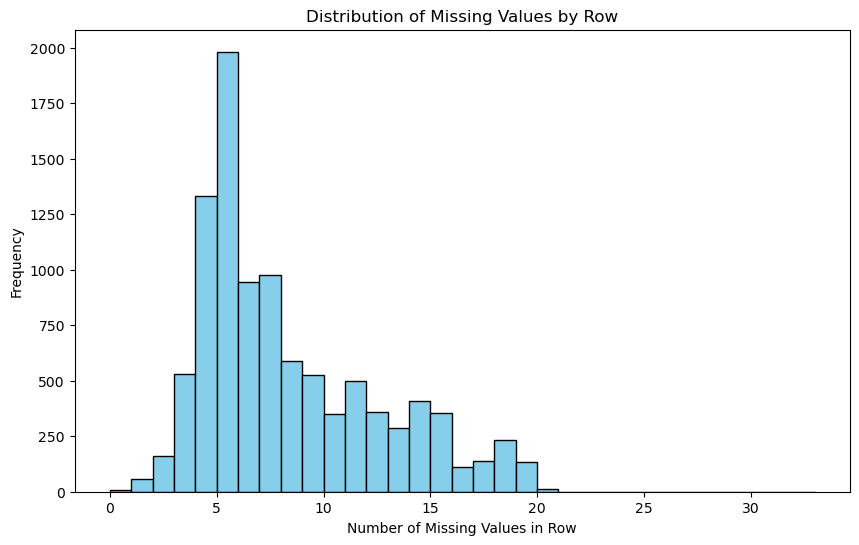

In [76]:
# Count missing or 'UNKNOWN' values row-wise
row_missing = ((df == "UNKNOWN") | df.isnull()).sum(axis=1)

# Plot histogram of row-wise missing values
plt.figure(figsize=(10, 6))
plt.hist(row_missing, bins=range(df.shape[1] + 1), color='skyblue', edgecolor='black')
plt.title("Distribution of Missing Values by Row")
plt.xlabel("Number of Missing Values in Row")
plt.ylabel("Frequency")
plt.show()


**Interpretation of the Histogram**
- After also considering UNKNOWN as a missing value category, I created the above visualization
- The most frequent number of missing values per row is around 5 or 6
- The distribution is right-skewed. There are more rows with a smaller number of missing values and fewer rows with a large number of missing values
- There are very few rows with a high number of missing values (>20)

In [77]:
null_percentage= (counts/ len(df)) * 100

# Display the result
print(null_percentage)

ObjectID                                                 0.00
Damage                                                   0.00
StreetNumber                                             3.45
StreetName                                               4.60
StreetType                                              11.12
City                                                    23.71
State                                                    0.01
ZipCode                                                 40.03
CALFIREUnit                                              0.00
County                                                   0.02
Community                                               58.09
IncidentStartDate                                        0.00
HazardType                                               0.00
StructureDefenseActionsTaken                            94.39
StructureType                                            0.00
StructureCategory                                        0.00
NumUnits

### Results

#### 1. Mostly Complete Data (0-5% Missing)
**Columns:** Damage, ObjectID, StreetNumber, StreetName, State, CALFIREUnit, County, IncidentStartDate, HazardType, StructureType, StructureCategory <br>
**Actions to Consider:** 
- For features such as StreetName and StreetNumber, which are missing less than 5% of values, consider imputation with a placeholder or filling missing values based on related data

#### 2. Moderately Complete Data (5-30% Missing)
**Columns:** StreetType, City, YearBuilt, FenceAttachedtoStructure, RoofConstruction, ExteriorSiding, WindowPane, Deck/PorchOnGrade, AssessedImprovedValue, SiteAddress <br>
**Actions to Consider:** 
- For StreetType, imputation with a placeholder value or relying on related fields are potential courses of actions
- For City, because the amount of missing data could impact analysis based on location, consider imputation based on nearby geographic features such as ZipCode or Longitude/Latitude
- For RoofConstruction, a moderate percentage of misisng data indicates missing records or that certain types of properties may be lacking roof construction data. Consider imputing missing values based on common roof types or using a placeholder
- For ExteriorSiding, consider imputation with "Unknown" or values based on common materials in the area/for similar property types
- For Deck/PorchOnGrade, consider imputing with "None" or a similar placeholder for properties that do not have deck or porches on grade
- For FenceAttachedtoStructure, consider imputation with "None" or a similar placeholder for properties that lack fences
- For AssessedImprovedValue, consider imputation with the average value for similar properties in the area
- For YearBuilt, consider imputation with the average value for similar properties in the area
- SiteAddress is a composite field that captures information already contained StreetNumber, StreetName, State, and ZipCode. Depending on the objective of your analysis, you can consider keeping or dropping the SiteAddress feature. SiteAddress can provide additional completeness for reporting, but if you are interested in analyzing location in terms of state, zip code, or street name for trends or patterns, SiteAddress can be dropped from the dataset. It's important to note that SiteAddress can be used to populate missing values for features such as Zip Code

#### 3. Significant Missing Data (30-70% Missing)
**Columns:** Community, Deck/PorchElevated, Eaves, VentScreen, PatioCover/CarportAttachedtoStructure, WindowPane, Distance-PropaneTanktoStructure, ZipCode <br>
**Actions to Consider:** 
- Many records do not have associated community information, possibly due to missing data for certain properties. For Community, consider dropping the feature, imputing with a placeholder, or focusing on analyzing records that have this data available
- For Eaves, WindowPane, and VentScreen, consider imputation with a placeholder
- For Deck/PorchElvated, consider imputing with "None" or a similar placeholder for properties that do not have elevated decks/porches
- For PatioCover/CarportAttachedto Structure, consider imputing with "None" or a similar placeholder for properties that do not have patio covers/carports
- Distance-PropaneTanktoStructure may only be relevant for a small subset of certain types of properties. Consider dropping this feature, unless analysis targets properties with propane tanks
- Distance-ResidencetoUtility/MiscStructure>120SQFT may only be relevant for a small subset of certain types of properties. Consider dropping this feature, unless analysis targets properties with this feature
- ZipCode, which is valuable for location-based analysis, is missing a significant amount of data. Missing records indicate incomplete address data or records for areas where zip code wasn't captured. Consider imputing based on city/state or other available address details. SiteAddress can potentially provide missing zip codes

#### 4. Severely Missing Data (70-100% Missing)
**Columns:** StructureDefenseActionsTaken, Distance-PropaneTanktoStructure, Distance-ResidencetoUtility/MiscStructure, NumUnitsinStructure <br>
**Actions to Consider:** 
- Structure defense actions weren't recorded for most properties, indicating that the feature is only relevant for certain properties or incidents. Consider imputing with a placeholder or dropping this feature if it's not useful for analysis 
- NumUnitsinStructure has a high percentage of missing vlaues, which indicates that this data is not relevant for records such as single family homes. Consider performing imputation based on common patterns in property types or filling with 0 for relevant records

### Determine how many SiteAddress records could potentially be used to fill in missing ZipCode values

For this attempt to extract and impute zip code values, we will use domain knowledge -> All zip codes in the United States consist of five numeric values

In [78]:
df_null_zip_code = df[df['ZipCode'].isnull()]

# xtract the potential ZipCode from SiteAddress (assuming its the last part of SiteAddress)

#Function to extract ZipCode from SiteAddress
def extract_zipcode(site_address):
    match = re.search(r'(\d{5})$', str(site_address))  #Look for a 5-digit number at the end of SiteAddress
    if match:
        return match.group(1)  #Return the found ZipCode
    return None

# Apply the function to the SiteAddress column
df_null_zip_code['PotentialZipCode'] = df_null_zip_code['SiteAddress'].apply(extract_zipcode)

# Count the number of extracted ZipCodes that are valid
valid_zip_codes = df_null_zip_code['PotentialZipCode'].notnull().sum()

# Number of SiteAddress records that could potentially fill in the missing ZipCode
print(f"Number of SiteAddress records that could be used to fill in missing ZipCode: {valid_zip_codes}")


Number of SiteAddress records that could be used to fill in missing ZipCode: 3603


### <font color='red'>Decision to Drop Features</font> <br>
Decided to drop the following features:
<br><br>
| Feature    | Reason |
| -------- | ------- |
| HazardType | Because Fire is the only hazard type, this feature doesn't differentiate between records. As a result, it doesn't provide predictive value for analysis or modeling |
| Distance-ResidencetoUtility/MiscStructure>120SQFT | Distance - Residence to Utility/Misc Structure Greater Than 120 SQFT is not applicable for properties without external structures. As a result, this feature is missing values for 86% of records and unsuitable for analysis |
| Distance-PropaneTanktoStructure | This feature is missing values for 87% of records. It is likely that most properties do not have propane tanks. As a result, this feature lacks relevance for predictive analysis |
| StructureDefenseActionsTaken | Structure defense actions weren't recorded for most properties (94%), indicating that the feature is only relevant for certain properties or incidents |



In [79]:
# List of columns to drop
columns_to_drop = [
    'HazardType',
    'Distance-ResidencetoUtility/MiscStructure&gt;120SQFT',
    'Distance-PropaneTanktoStructure',
    'StructureDefenseActionsTaken'
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print(df.head())

  ObjectID            Damage  StreetNumber      StreetName StreetType  \
0    63752  Destroyed (>50%)        4300.0         WALLACE       ROAD   
1    58216  Destroyed (>50%)       20731.0  SANTA ROSA AVE        NaN   
2    20194         No Damage       17501.0        CACHAGUA       ROAD   
3    83242         No Damage        1121.0   NAVAHOE SOUTH      DRIVE   
4   128000  Destroyed (>50%)        1106.0        GALLOWAY     STREET   

                City State  ZipCode CALFIREUnit       County  \
0     UNINCORPORATED    CA      0.0         LNU       SONOMA   
1         MIDDLETOWN    CA      0.0         LNU         LAKE   
2                NaN   NaN      NaN         BEU     MONTEREY   
3   SOUTH LAKE TAHOE    CA  96150.0         AEU    EL DORADO   
4  PACIFIC PALISADES    CA  90272.0         LAC  LOS ANGELES   

          Community IncidentStartDate                         StructureType  \
0            RIEBLI  2017-10-08 00:00  SINGLE FAMILY RESIDENCE SINGLE STORY   
1               Na

### Check for irregular cardinalities & permitted values

In [80]:
# Check for irregular cardinality & permitted values in categorical features. 
print("Unique values for:\nDamage:", pd.unique(df["Damage"].ravel()))
print("StreetName:", pd.unique(df["StreetName"].ravel()))
# print("StreetType(e.g.road,drive,lane,etc.) :", pd.unique(df["StreetType(e.g.road,drive,lane,etc.)"].ravel()))
print("City:", pd.unique(df["City"].ravel()))
print("State:", pd.unique(df["State"].ravel()))
print("ZipCode:", pd.unique(df["ZipCode"].ravel()))
print("CALFIREUnit:", pd.unique(df["CALFIREUnit"].ravel()))
print("County:", pd.unique(df["County"].ravel()))
print("Community:", pd.unique(df["Community"].ravel()))
print("StructureCategory:", pd.unique(df["StructureCategory"].ravel()))
print("IncidentStartDate:", pd.unique(df["IncidentStartDate"].ravel()))
print("StructureType:", pd.unique(df["StructureType"].ravel()))
print("RoofConstruction:", pd.unique(df["RoofConstruction"].ravel()))
print("Eaves:", pd.unique(df["Eaves"].ravel()))
print("VentScreen:", pd.unique(df["VentScreen"].ravel()))
print("ExteriorSiding:", pd.unique(df["ExteriorSiding"].ravel()))
print("WindowPane:", pd.unique(df["WindowPane"].ravel()))
print("Deck/PorchOnGrade:", pd.unique(df["Deck/PorchOnGrade"].ravel()))
# print("Deck/PorchElevated :", pd.unique(df["Deck/PorchElevated "].ravel()))
print("PatioCover/CarportAttachedtoStructure :", pd.unique(df["PatioCover/CarportAttachedtoStructure"].ravel()))
# print("FenceAttachedtoStructure :", pd.unique(df["FenceAttachedtoStructure "].ravel()))
print("WindowPane:", pd.unique(df["WindowPane"].ravel()))
# print("SiteAddress(parcel) :", pd.unique(df["SiteAddress(parcel)"].ravel()))

Unique values for:
Damage: ['Destroyed (>50%)', 'No Damage']
Categories (2, object): ['Destroyed (>50%)', 'No Damage']
StreetName: ['WALLACE', 'SANTA ROSA AVE', 'CACHAGUA', 'NAVAHOE SOUTH', 'GALLOWAY', ..., 'GOLDEN OAK', 'LATIGO CANYON', 'CRIMSON', 'DELAPLAIN', 'GRANADA']
Length: 3322
Categories (3321, object): [' 050 DOYLE GRADE', ' 120 BEAR', ' 240 CONSTANTIA', ' 255 MAIN', ..., 'ZENITH POINT', 'ZINK', 'ZOGG MINE', 'ZUCKERMAN']
City: ['UNINCORPORATED', 'MIDDLETOWN', NaN, 'SOUTH LAKE TAHOE', 'PACIFIC PALISADES', ..., 'GAVIOTA', 'VALLEY SPRINGS', 'SAN JUAN BAUTISTA', 'HERALD', 'PASO ROBLES CA']
Length: 218
Categories (217, object): ['ADIN', 'AGOURA HILLS', 'AGUANGA', 'ALPINE', ..., 'WRIGHTWOOD', 'YREKA', 'YUCAIPA', 'ZENIA']
State: ['CA', NaN]
Categories (1, object): ['CA']
ZipCode: [0.0, NaN, 96150.0, 90272.0, 95636.0, ..., 95979.0, 95252.0, 95045.0, 92808.0, 95638.0]
Length: 149
Categories (148, float64): [0.0, 90049.0, 90263.0, 90265.0, ..., 96122.0, 96129.0, 96130.0, 96150.0]
CALFIR

### Results: <br>
1. Extremely Low Cardinality <br>
-  State: Only contains CA (aside from NaN)
-  Damage: Contains Destroyed (>50%) and No Damage

2. Extremely High Cardinality <br>
-  StreetName (4056 unique values): Almost every record has a unique street name. This feature may be too granular to use to perform broad analysis
-  City (256 unique values) and Community (425 unique values): Expected to have variety but need to check for typos or inconsistent formatting.
-  ZipCode (149 unique values): Expected to have variety but again, need to check for formatting (Example: 0.0 and NaN are present)

In [81]:
df.dtypes 

ObjectID                                 category
Damage                                   category
StreetNumber                              float64
StreetName                               category
StreetType                               category
City                                     category
State                                    category
ZipCode                                  category
CALFIREUnit                              category
County                                   category
Community                                category
IncidentStartDate                          object
StructureType                            category
StructureCategory                        category
NumUnitsinStructure                       float64
RoofConstruction                         category
Eaves                                    category
VentScreen                               category
ExteriorSiding                           category
WindowPane                               category


Potential Action to Take: <br>
-  Split the IncidentStartDate feature into two separate features (Incident Date, Incident Time) to perform date and time of day-based analysis
-  For features with multiple entries that seem similar but are written differently (Example: "Single Family Residence Single Story" and "Single Family Residence Single Story " in StructureType), apply standardization to ensure all variations of a category are captured under a single, consistent label
- Will resolve float data types for certain features after getting rid of null values in the data quality plan

## Descriptive Statistics: Continuous Features

Of the continuous features, we already know: <br>
-  The type of data for each

We now supplement this information with the following: <br>
-  The range into which each feature can fall
-  A numerical representation of how these values are distributed across the upper tiers of that range 
-  Feature cardinality

In [82]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.
continuous_features = df.select_dtypes(['float64']).columns
for feature in continuous_features:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")


StreetNumber
----------

Range StreetNumber is:  747150.0
----------
Value  Number of Instances
StreetNumber
0.0        528
580.0       21
1.0         19
16001.0     19
1480.0      14
70.0        14
15.0        13
100.0       12
2.0         12
145.0       11
40.0        11
200.0       11
21600.0     10
500.0       10
120.0       10
Name: count, dtype: int64 



NumUnitsinStructure
----------

Range NumUnitsinStructure is:  11.0
----------
Value  Number of Instances
NumUnitsinStructure
0.0     2731
1.0      120
2.0       43
4.0       14
3.0       13
8.0       13
6.0       11
7.0        9
10.0       9
5.0        5
11.0       1
9.0        1
Name: count, dtype: int64 



AssessedImprovedValue
----------

Range AssessedImprovedValue is:  522652568.0
----------
Value  Number of Instances
AssessedImprovedValue
0.0           410
54139901.0     16
150000.0       15
2756731.0      14
10000.0        12
200000.0       12
100000.0       12
533980.0       12
26000.0        11
80000.0        11
11000

In [83]:
# Display the cardinality of each continuous feature

features_cardinality = list(df[continuous_features].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Cardinality
-------                              --------------- 

StreetNumber                         5707
NumUnitsinStructure                  13
AssessedImprovedValue                7645
YearBuilt                            137
Latitude                             9999
Longitude                            9997


In [84]:
# Descriptive stats for continuous features
# Table is transposed
# One feature per rows, stats in columns
# The 'count' column shows how many rows have data for that feature.
# This table does not show the cardinality and the %Missing columns.
# We compute them below.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
StreetNumber,9655.0,9831.927706,4.129023e+04,0.000000,700.000000,3060.000000,8398.500000,7.471500e+05
NumUnitsinStructure,2970.0,0.225253,1.066705e+00,0.000000,0.000000,0.000000,0.000000,1.100000e+01
AssessedImprovedValue,9497.0,658700.816468,8.669051e+06,0.000000,70858.000000,159740.000000,339586.000000,5.226526e+08
YearBuilt,7617.0,1760.054746,6.014169e+02,0.000000,1940.000000,1962.000000,1984.000000,2.022000e+03
Latitude,10000.0,37.355887,2.509915e+00,32.597628,34.195100,38.475126,39.742731,4.195725e+01
Longitude,10000.0,-120.502913,1.829930e+00,-123.774580,-122.135493,-121.402610,-118.537856,-1.166239e+02


**Running Assessment**

-  Examining the gaps / relationships between the minimum and maximum values and the quartile ranges. Features below may contain significant outliers
- From the visual analysis of the rows and this initial descriptive analysis, 0 is a special value in the original data

**Action to Consider**
-  Low cardinality features like NumUnitsinStructure and YearBuilt could benefit from categorization or grouping, especially if there are inconsistencies in data entry.

In [85]:
# For each continuous feature, print the number of occurrences of the remaining special values, 
# and the percentage of the features total values that they represent.

print("SPECIAL VALUE COUNT\n---------------")

for col in continuous_features:
    print("Feature:", col, "\t")
    print(len(df[df[col] == 0.0]), "occurrences of 0 special value ( = ", round((((len(df[df[col] == 0.0]))/ len(df[col]))*100), 2), "% of values)")
    #print(len(df[df[col] == -7.0]), "occurrences of -7 special value ( = ", round((((len(df[df[col] == -7.0]))/ len(df[col]))*100), 2), "% of values)")
    print("\n\n")


SPECIAL VALUE COUNT
---------------
Feature: StreetNumber 	
528 occurrences of 0 special value ( =  5.28 % of values)



Feature: NumUnitsinStructure 	
2731 occurrences of 0 special value ( =  27.31 % of values)



Feature: AssessedImprovedValue 	
410 occurrences of 0 special value ( =  4.1 % of values)



Feature: YearBuilt 	
795 occurrences of 0 special value ( =  7.95 % of values)



Feature: Latitude 	
0 occurrences of 0 special value ( =  0.0 % of values)



Feature: Longitude 	
0 occurrences of 0 special value ( =  0.0 % of values)





**Assessing Zero as a Special Value:**

For each feature, assess whether a zero value is a valid entry or represents missing data. For example:
-  StreetNumber: Zero could represent an unassigned or missing street number.
-  NumUnitsinStructure: Zero may indicate an unknown or unassigned value for the number of units.
-  AssessedImprovedValue: Zero might imply a property that has no assessed value or has not been assessed.
-  YearBuilt: Zero could indicate an unknown year of construction, which may need to be handled as missing or invalid data. <br>

**Examine Impact on Modeling:**

For features like NumUnitsinStructure and YearBuilt, where zero values represent a substantial proportion of the dataset (over 5%), the distribution may be significantly affected. Visual analysis (e.g., histograms and boxplots) will help assess how zero values impact the feature's distribution and its role in predictive models.

**Running Assessment:**

-  We shall take note of this data quality issue and address it in the Data Quality Plan.
-  We shall continue to visually represent the data as it stands.
-  We expect some of the results to be skewed because of the special values. 0 may have been used at a placeholder
-  We shall retain this original representation of the data for further comparison and documentation.

## Check logical integrity of data ### 

A number of additional checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

**Negative Value Check**
-  Test 1: Ensure that features that should always be positive (or zero) do not contain negative values.

In [86]:
# Check for negative values in StreetNumber
test_1 = df[['StreetNumber']][df['StreetNumber'] < 0]
print("Number of rows failing the test for negative StreetNumber: ", test_1.shape[0])
test_1.head(5)

# Check for negative values in NumUnitsinStructure
test_2 = df[['NumUnitsinStructure']][df['NumUnitsinStructure'] < 0]
print("Number of rows failing the test for negative NumUnitsinStructure: ", test_2.shape[0])
test_2.head(5)

# Check for negative values in AssessedImprovedValue
test_3 = df[['AssessedImprovedValue']][df['AssessedImprovedValue'] < 0]
print("Number of rows failing the test for negative AssessedImprovedValue: ", test_3.shape[0])
test_3.head(5)

# Check for negative values in YearBuilt
test_4 = df[['YearBuilt']][df['YearBuilt'] < 0]
print("Number of rows failing the test for negative YearBuilt: ", test_4.shape[0])
test_4.head(5)


Number of rows failing the test for negative StreetNumber:  0
Number of rows failing the test for negative NumUnitsinStructure:  0
Number of rows failing the test for negative AssessedImprovedValue:  0
Number of rows failing the test for negative YearBuilt:  0


,YearBuilt


**Zero Value Check**
-  Test 2: Ensure that features that should always be positive do not equal zero.

In [87]:
# Check for zero values in StreetNumber
test_5 = df[['StreetNumber']][df['StreetNumber'] == 0]
print("Number of rows failing the test for zero StreetNumber: ", test_5.shape[0])
test_5.head(5)

# Check for zero values in NumUnitsinStructure
test_6 = df[['NumUnitsinStructure']][df['NumUnitsinStructure'] == 0]
print("Number of rows failing the test for zero NumUnitsinStructure: ", test_6.shape[0])
test_6.head(5)

# Check for zero values in AssessedImprovedValue
test_7 = df[['AssessedImprovedValue']][df['AssessedImprovedValue'] == 0]
print("Number of rows failing the test for zero AssessedImprovedValue: ", test_7.shape[0])
test_7.head(5)

# Check for zero values in YearBuilt
test_8 = df[['YearBuilt']][df['YearBuilt'] == 0]
print("Number of rows failing the test for zero YearBuilt: ", test_8.shape[0])
test_8.head(5)


Number of rows failing the test for zero StreetNumber:  528
Number of rows failing the test for zero NumUnitsinStructure:  2731
Number of rows failing the test for zero AssessedImprovedValue:  410
Number of rows failing the test for zero YearBuilt:  795


,YearBuilt
10,0.0
25,0.0
58,0.0
63,0.0
70,0.0


**Running Assessment**
- For Test 2, it's likely that 0 was added to the dataset as a placeholder. Will revisit in the data quality plan.

**Out of Range Lat/Lon Check**
-  Test 3: Ensure that latitude and longitude are not out of range.

In [88]:
# Check for Latitude out of range
test_9 = df[['Latitude']][(df['Latitude'] < -90) | (df['Latitude'] > 90)]
print("Number of rows failing the test for invalid Latitude: ", test_9.shape[0])
test_9.head(5)

# Check for Longitude out of range
test_10 = df[['Longitude']][(df['Longitude'] < -180) | (df['Longitude'] > 180)]
print("Number of rows failing the test for invalid Longitude: ", test_10.shape[0])
test_10.head(5)


Number of rows failing the test for invalid Latitude:  0
Number of rows failing the test for invalid Longitude:  0


,Longitude


**Year Built**
-  Test 4: Check that YearBuilt is within a reasonable range

In [89]:
# Check if YearBuilt is within a reasonable range
test_11 = df[['YearBuilt']][(df['YearBuilt'] <= 1600) | (df['YearBuilt'] > 2025)]
print("Number of rows failing the test for YearBuilt out of range: ", test_11.shape[0])
test_11.head(5)


Number of rows failing the test for YearBuilt out of range:  795


,YearBuilt
10,0.0
25,0.0
58,0.0
63,0.0
70,0.0


**Running Assessment**
- For Test 4, it's likely that 0 was added to the dataset as a placeholder. Will revisit in the data quality plan.

**MultiUnit Structures**
-  Test 5: Check that multiunit structures contain more than one unit


In [90]:
test_multiunit = df[['StructureType', 'NumUnitsinStructure']][df['StructureType'] == 'multiunit']
test_invalid_units = test_multiunit[test_multiunit['NumUnitsinStructure'] <= 1]

# Output the results
print("Number of rows failing the test: ", test_invalid_units.shape[0])
print(test_invalid_units.head(5))


Number of rows failing the test:  0
Empty DataFrame
Columns: [StructureType, NumUnitsinStructure]
Index: []


**Incident Start Date**
- Test 6: Check that IncidentDate occured in a reasonable range
- Based on knowledge of the data collection process, records should not precede 2013
https://gis.data.cnra.ca.gov/datasets/CALFIRE-Forestry::cal-fire-damage-inspection-dins-data/about

In [91]:
# Ensure 'IncidentStartDate' is converted to string if it's categorical or another type
df['IncidentStartDate'] = df['IncidentStartDate'].astype(str)

# Convert 'IncidentStartDate' to datetime
df['IncidentStartDate'] = pd.to_datetime(df['IncidentStartDate'], errors='coerce')

# Define the valid start date (no incidents before January 1, 2013)
valid_start_date = pd.to_datetime('2013-01-01')

# Get today's date
today_date = pd.to_datetime('today')

# Check for incidents before the valid start date or after today
invalid_incidents = df[(df['IncidentStartDate'] < valid_start_date) | (df['IncidentStartDate'] > today_date)]

# Print the number of invalid incidents and display them
print(f"Number of invalid incidents (before 2013 or after today): {len(invalid_incidents)}")
print(invalid_incidents)


Number of invalid incidents (before 2013 or after today): 0
Empty DataFrame
Columns: [ObjectID, Damage, StreetNumber, StreetName, StreetType, City, State, ZipCode, CALFIREUnit, County, Community, IncidentStartDate, StructureType, StructureCategory, NumUnitsinStructure, RoofConstruction, Eaves, VentScreen, ExteriorSiding, WindowPane, Deck/PorchOnGrade, Deck/PorchElevated, PatioCover/CarportAttachedtoStructure, FenceAttachedtoStructure, AssessedImprovedValue, YearBuilt, SiteAddress, Latitude, Longitude]
Index: []


### - Save updated/cleaned data frame to a new csv file.

In [92]:
# Write the dataframe to a csv file
df.to_csv('FireDamageCleaned.csv', index=False)

### - Prepare a table with descriptive statistics for all the continuous features.

In [93]:
# Print table with descriptive statistics for all the continuous features
continuous_columns = df.select_dtypes(['float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
StreetNumber,9655.0,9831.927706,4.129023e+04,0.000000,700.000000,3060.000000,8398.500000,7.471500e+05
NumUnitsinStructure,2970.0,0.225253,1.066705e+00,0.000000,0.000000,0.000000,0.000000,1.100000e+01
AssessedImprovedValue,9497.0,658700.816468,8.669051e+06,0.000000,70858.000000,159740.000000,339586.000000,5.226526e+08
YearBuilt,7617.0,1760.054746,6.014169e+02,0.000000,1940.000000,1962.000000,1984.000000,2.022000e+03
Latitude,10000.0,37.355887,2.509915e+00,32.597628,34.195100,38.475126,39.742731,4.195725e+01
Longitude,10000.0,-120.502913,1.829930e+00,-123.774580,-122.135493,-121.402610,-118.537856,-1.166239e+02


### - Save descriptive statistics for all the continuous features to csv for data quality report

In [94]:
continuousFeatueDesc = df[continuous_columns].describe().T
continuousFeatueDesc.to_csv("continuousFeatureDescription.csv")

### - Prepare a table with descriptive statistics for all the categorical features.

In [95]:
# Print table with descriptive statistics for all the categorical features
#df.select_dtypes(['category']).describe().T
categorical_columns = df.select_dtypes(['category']).columns
df[categorical_columns].describe().T

,count,unique,top,freq
ObjectID,10000,10000,5,1
Damage,10000,2,Destroyed (>50%),5724
StreetName,9564,3321,PENTZ,71
StreetType,8888,20,ROAD,3441
City,7629,217,UNINCORPORATED,1300
State,9999,1,CA,9999
ZipCode,5997.0,148.0,0.0,1912.0
CALFIREUnit,10000,26,LAC,2626
County,9998,48,LOS ANGELES,2626
Community,4193,313,PARADISE,1150


In [96]:
categoricalFeatueDesc = df[categorical_columns].describe().T
categoricalFeatueDesc.to_csv("categoricalFeatureDescription.csv")

### - Plot histograms summary sheet for all the continuous features.

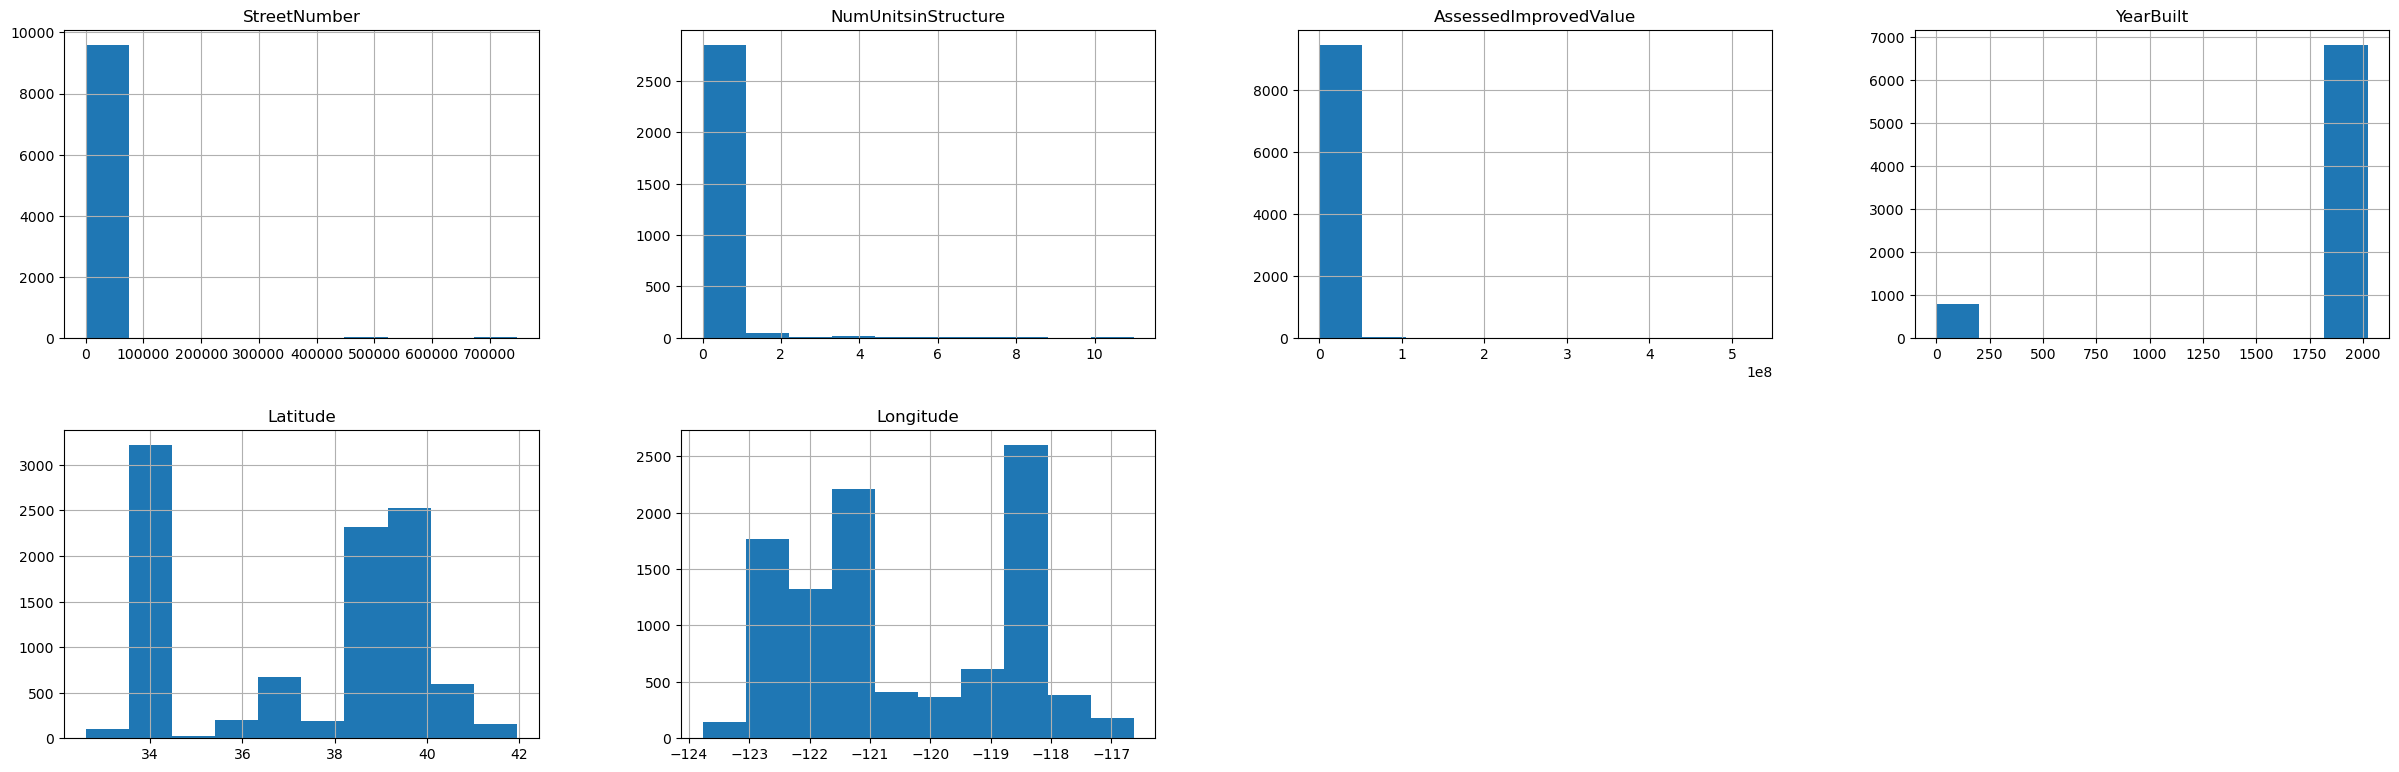

In [97]:
# Plot a histogram summary sheet of the continuous features and save in a png file
df[continuous_columns].hist(layout=(6, 4), figsize=(30,30), bins=10)
plt.savefig('continuous_histograms_1-1.pdf')

### - Plot histograms individual sheet for all the continuous features.

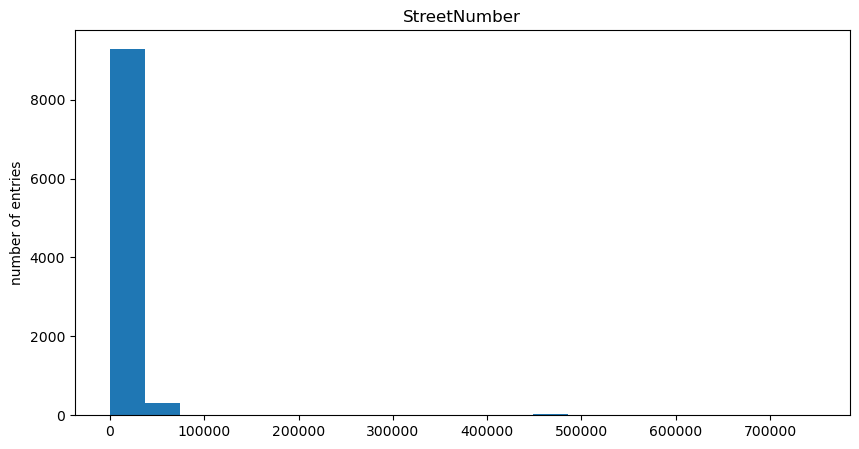

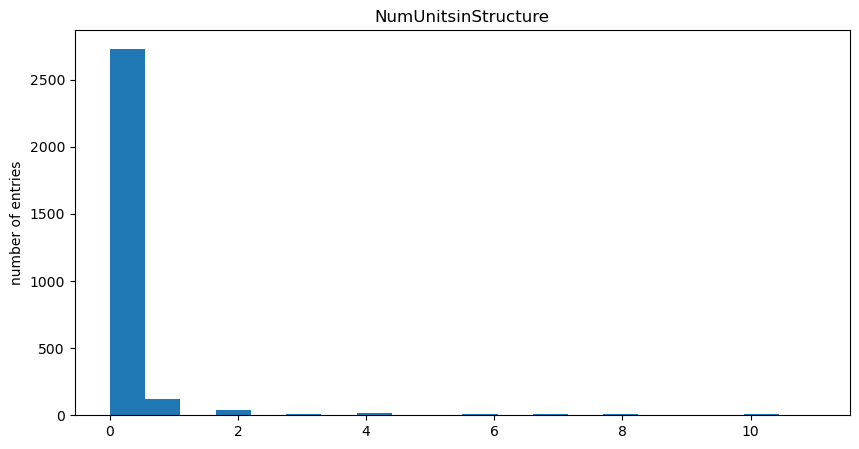

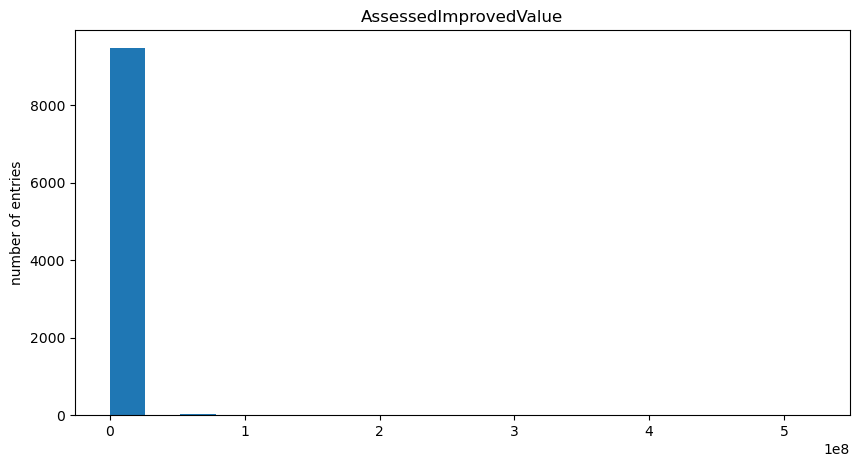

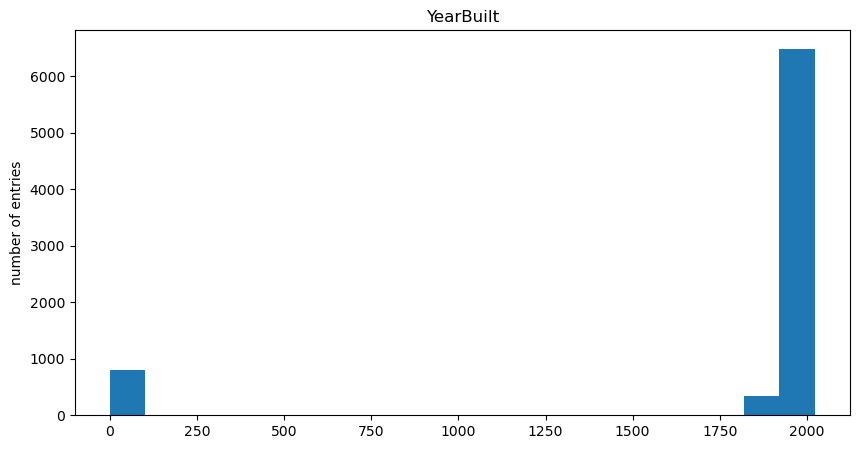

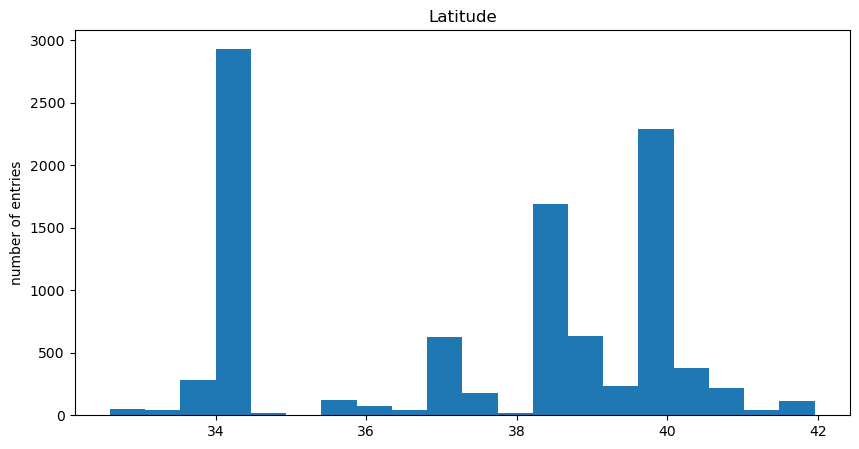

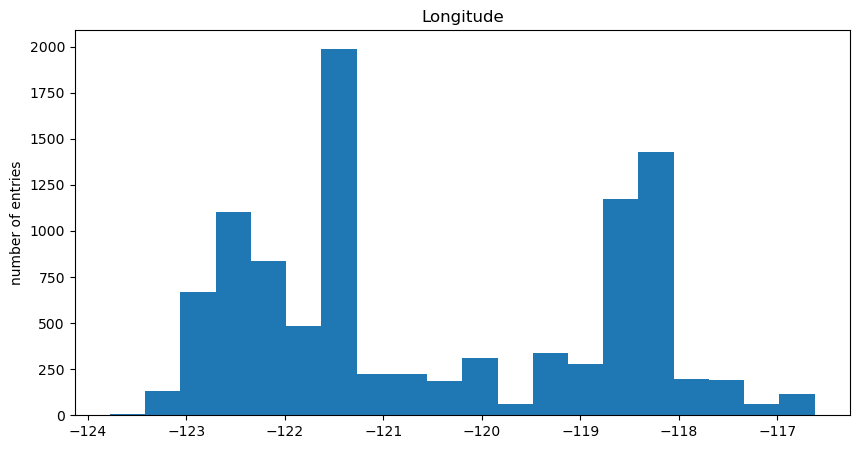

In [98]:
for col in continuous_columns:
        f = df[col].plot(kind='hist', figsize=(10,5), bins=20)
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()    

### - Plot box plots summary sheet for all the continuous features.

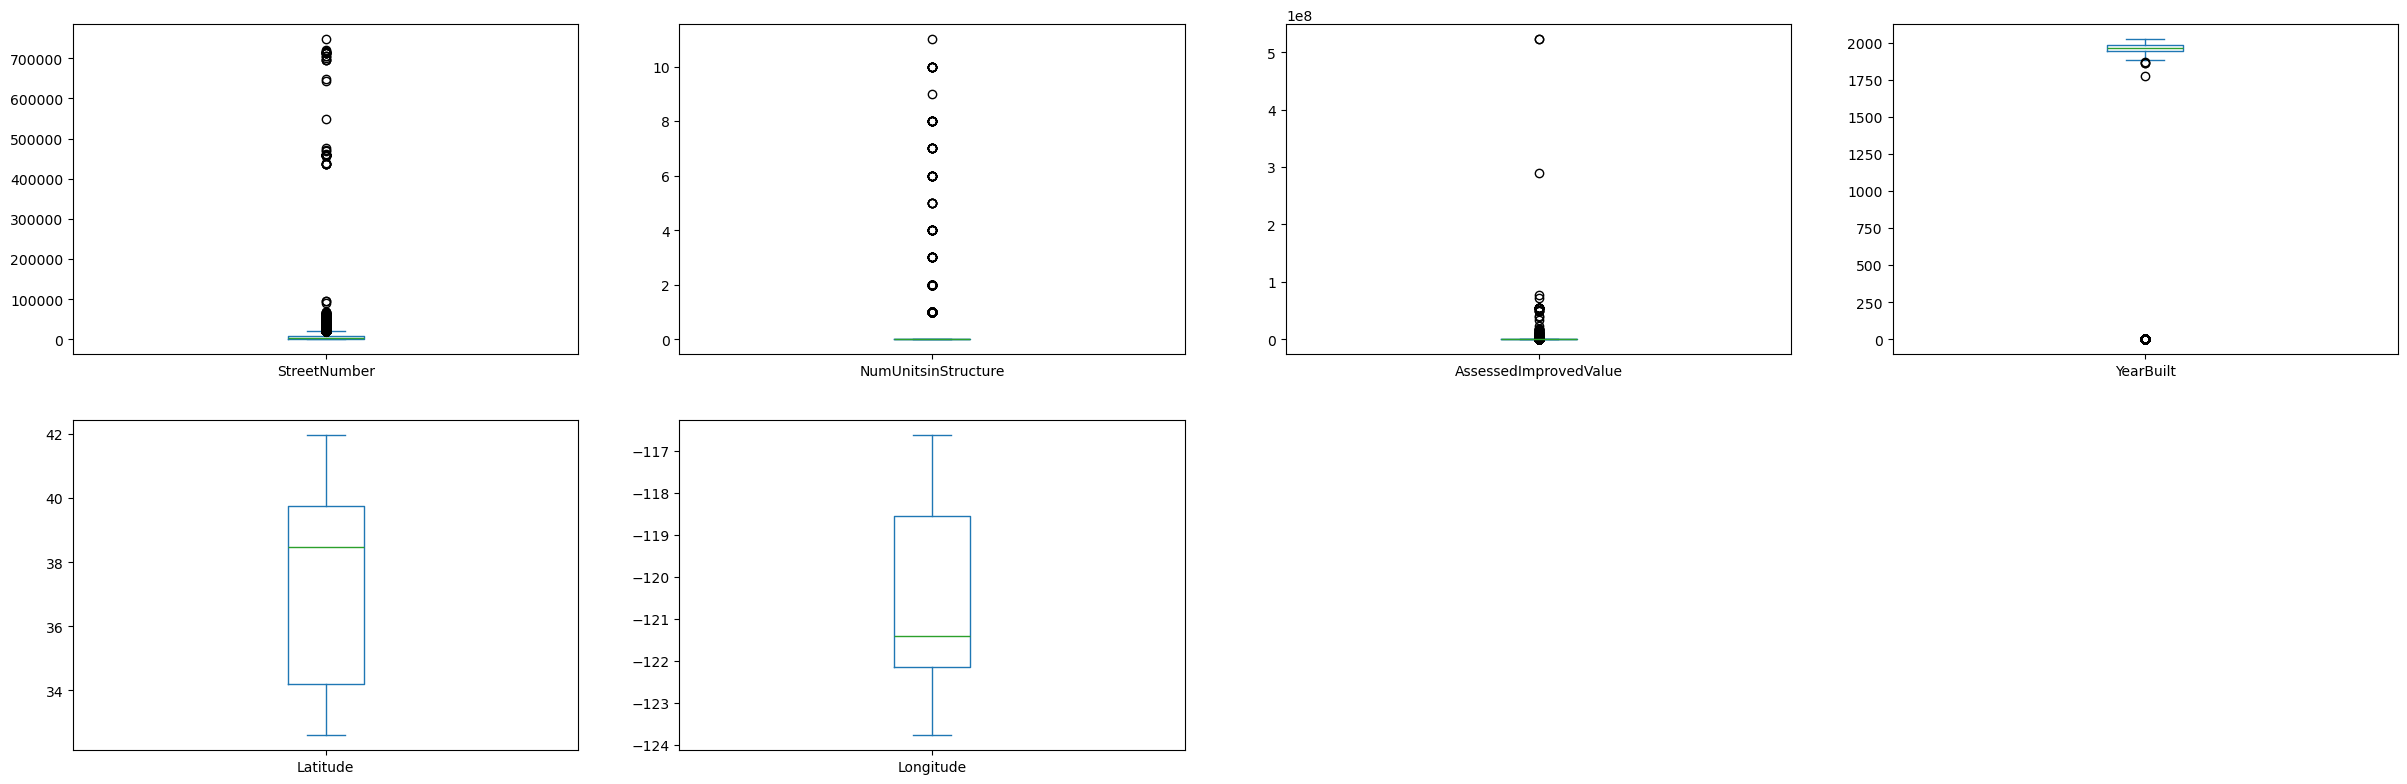

In [99]:
df[continuous_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
plt.savefig('continuous_boxplots__summary1-1.pdf')

### - Plot box plots individual sheet for all the continuous features.

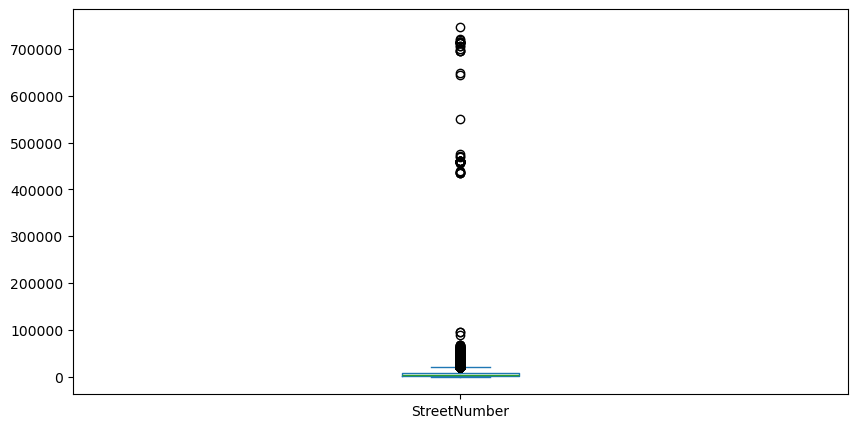

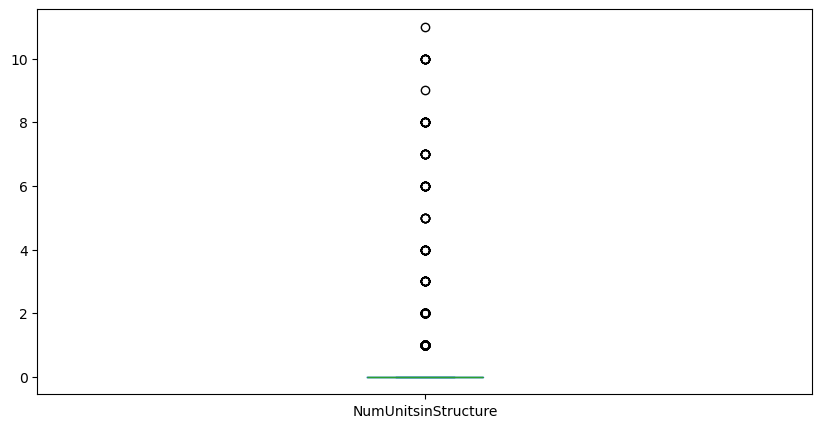

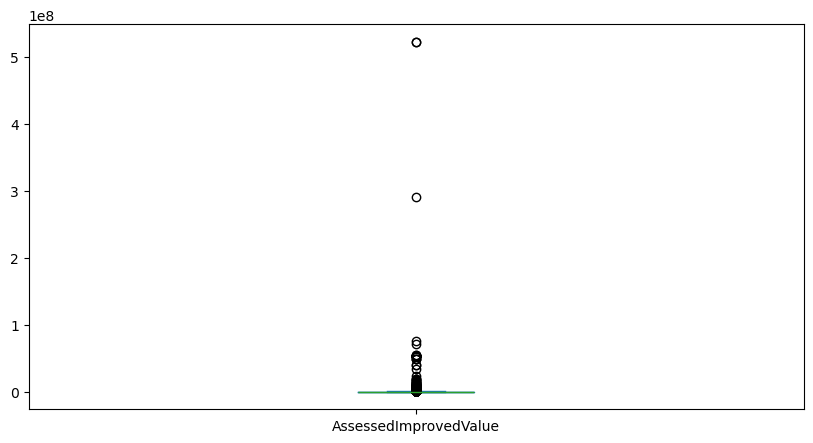

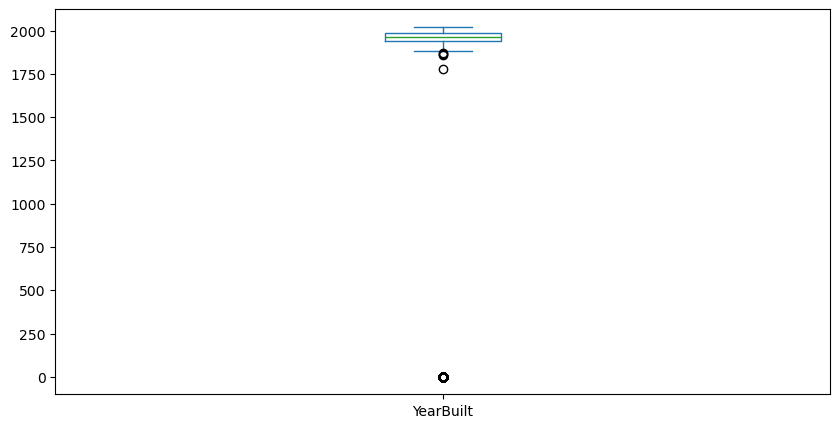

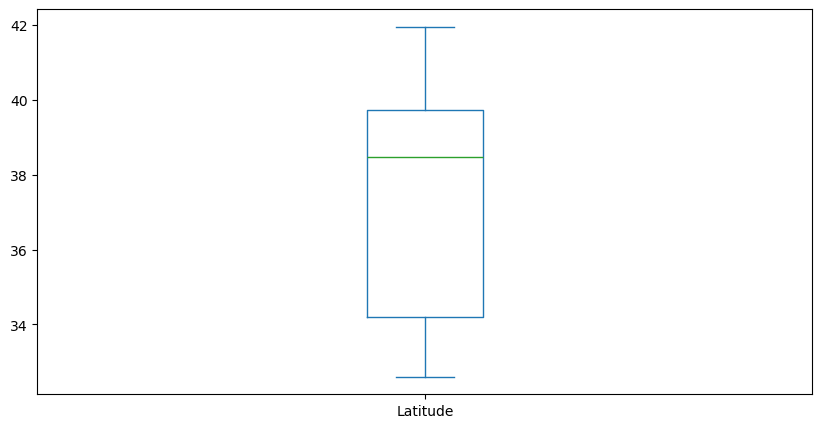

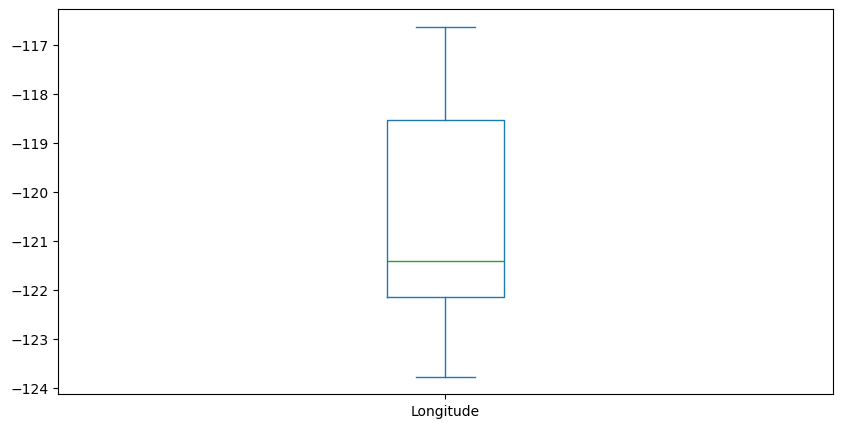

In [100]:
# Plot box plots for all the continuous features and save in a PDF file
with PdfPages('continuous_boxplots_1-1.pdf') as pp:
    for col in continuous_columns:
        f = df[col].plot(kind='box', figsize=(10,5))
        pp.savefig(f.get_figure())
        plt.show()    

### - Plot bar plots individual sheet for categorical features.

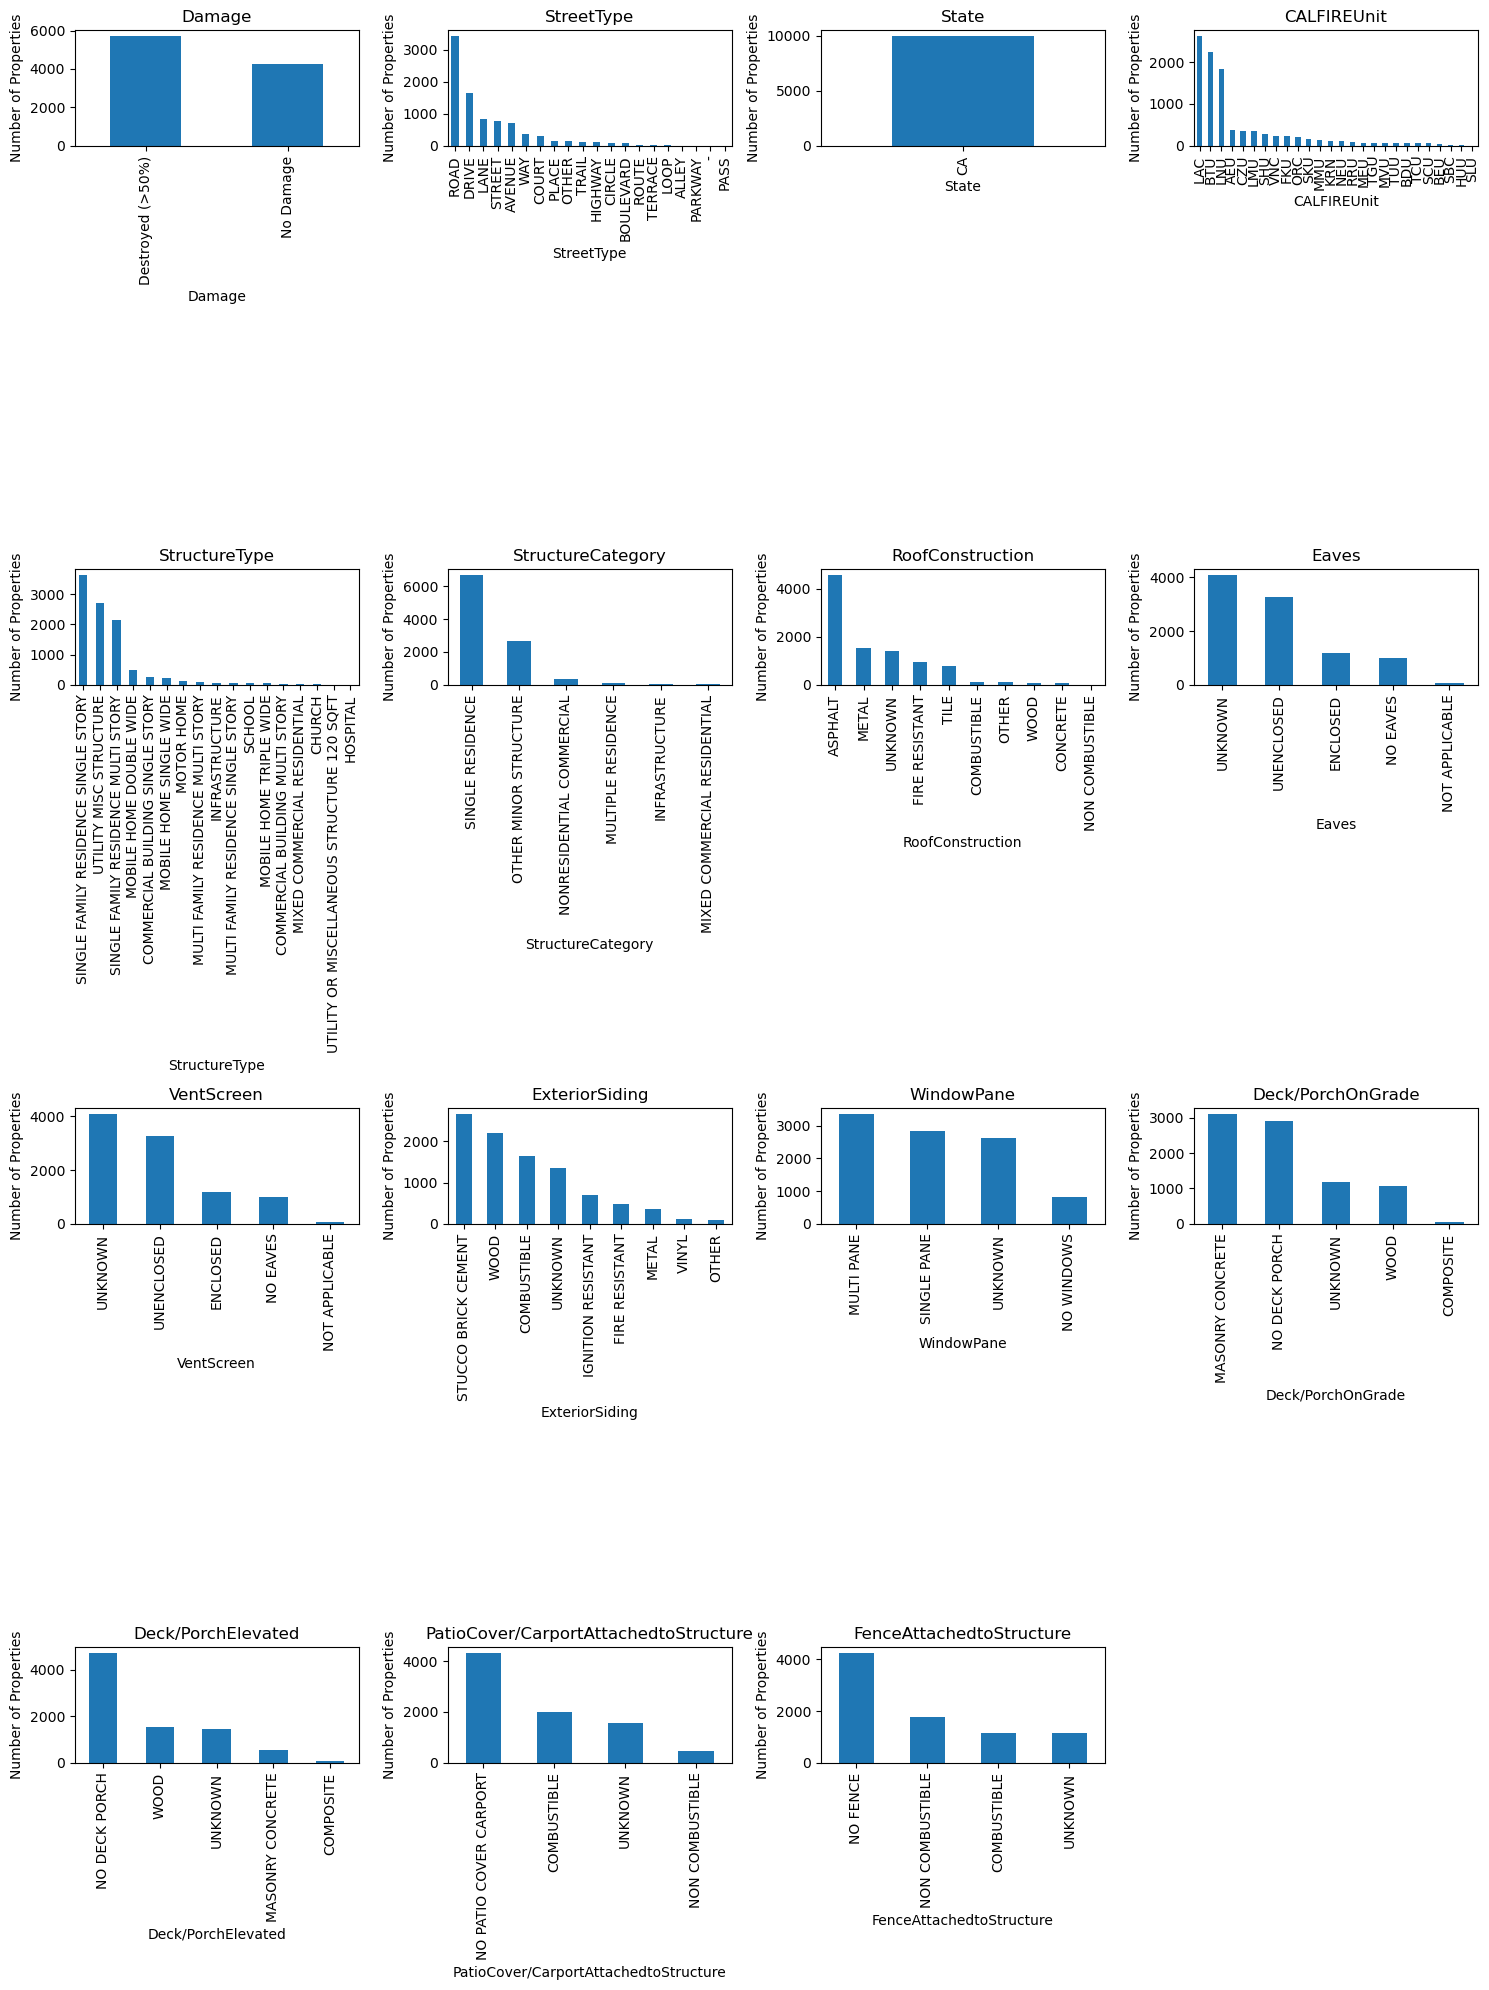

In [101]:
#List of features to exclude due to high cardinality
excluded_features = ['ObjectID', 'StreetName', 'City', 'ZipCode', 'Community', 'SiteAddress', 'County']

#Calculate the number of rows and columns for subplots
n_cols = 4  # Number of columns of subplots
valid_columns = [col for col in categorical_columns if col not in excluded_features]
n_rows = (len(valid_columns) + n_cols - 1) // n_cols

# Create a PDF to save the plots
with PdfPages('categorical_barplots_summary_1-1.pdf') as pp:
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    # Loop through categorical columns and plot their value counts as bar plots
    plot_index = 0
    for col in valid_columns:
        ax = axes[plot_index]
        df[col].value_counts().plot(kind='bar', ax=ax)
        ax.set_title(col)
        ax.set_ylabel('Number of Properties')
        plot_index += 1
    # Hide any unused axes
    for i in range(plot_index, len(axes)):
        axes[i].axis('off')
    plt.tight_layout()
    pp.savefig(fig)
    plt.show()


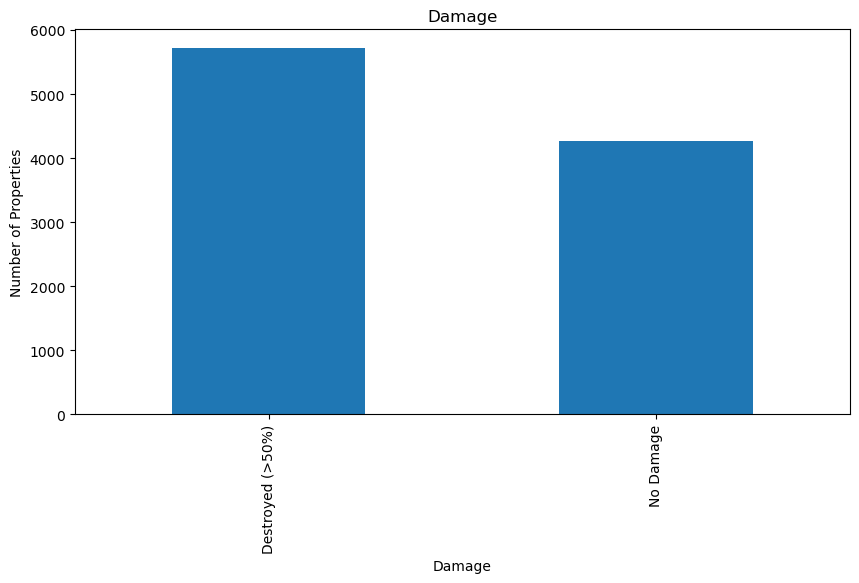

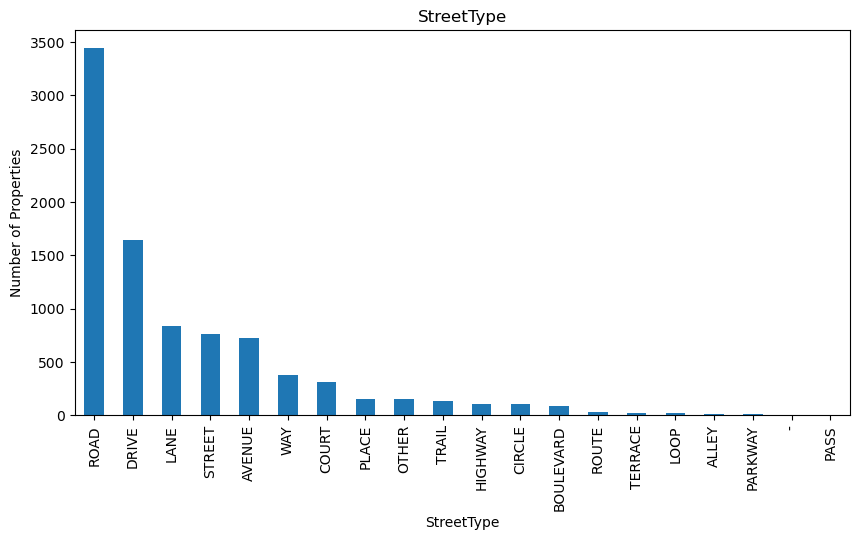

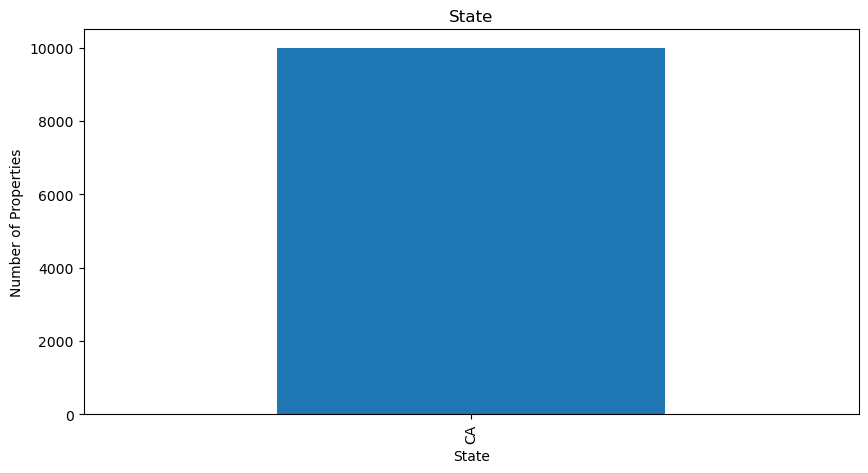

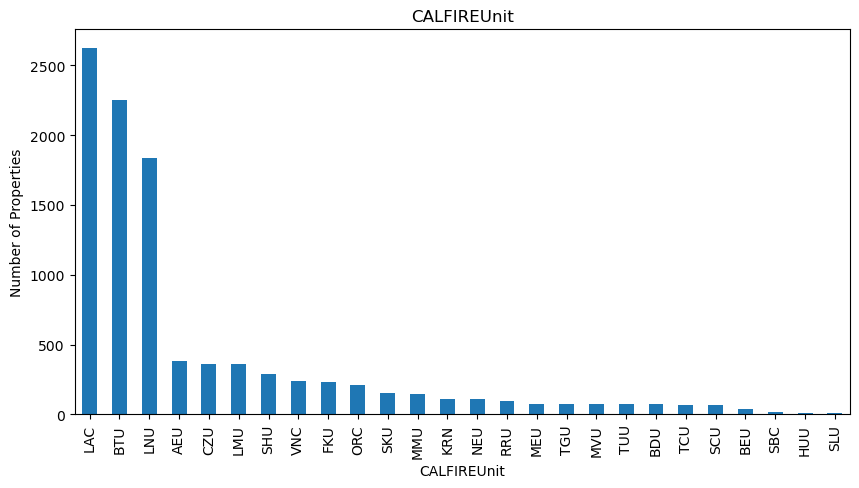

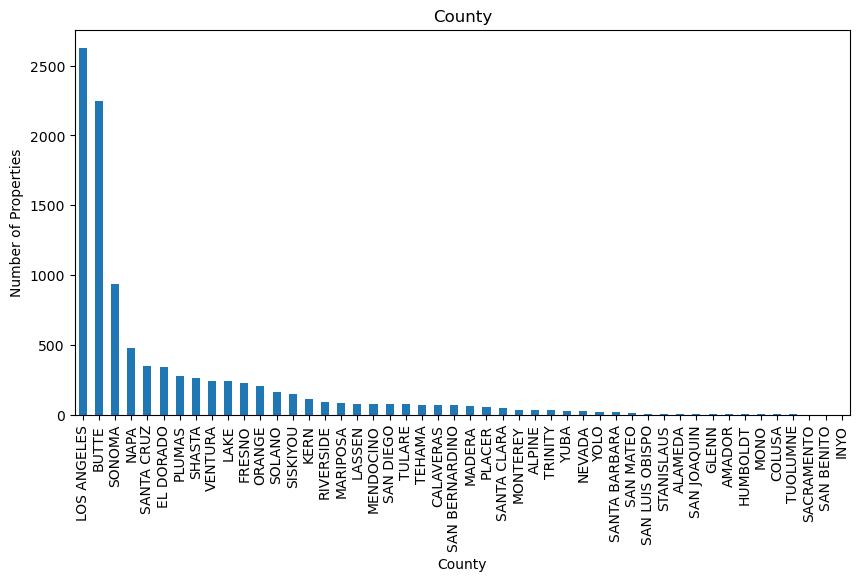

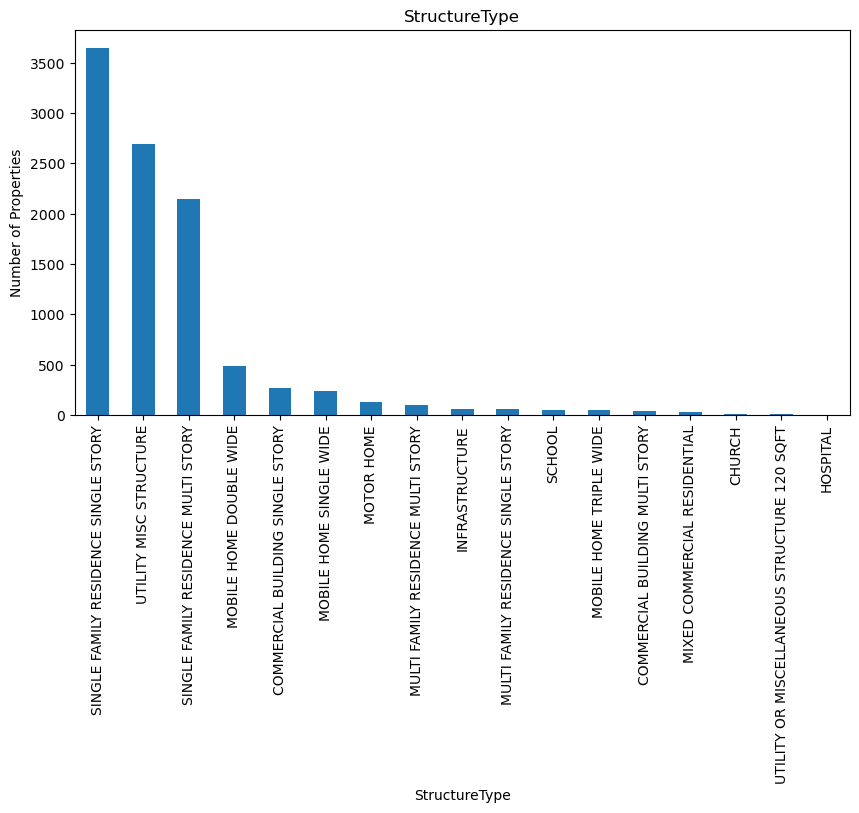

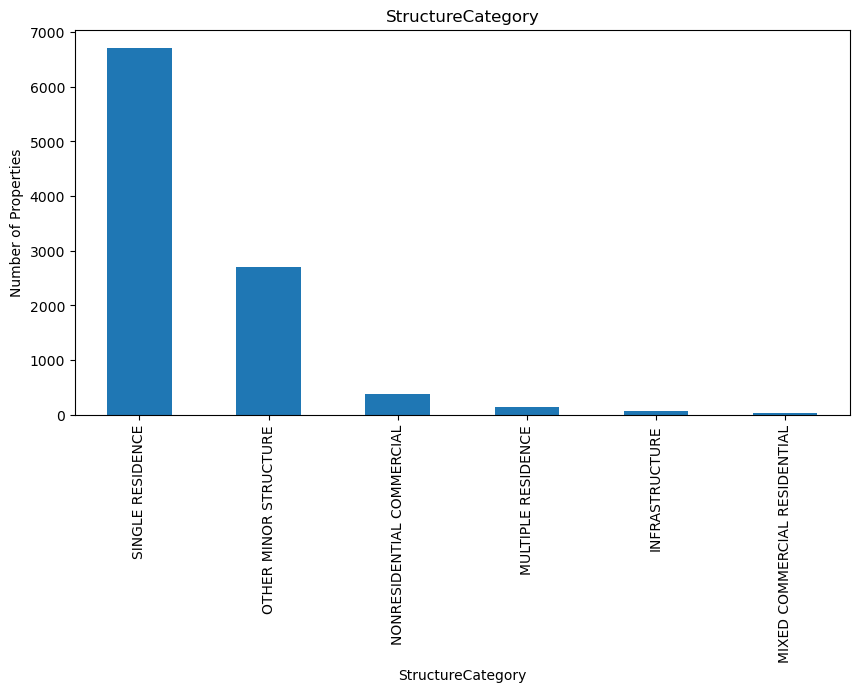

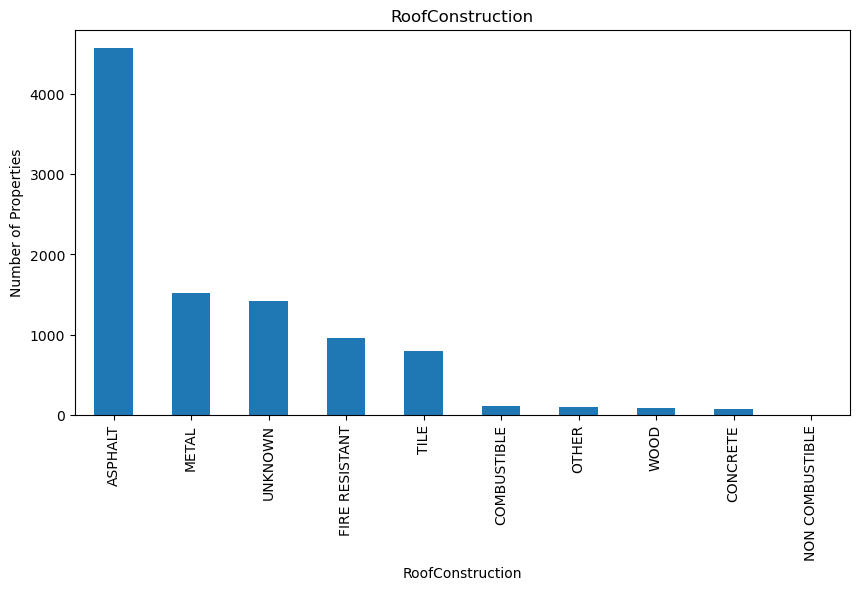

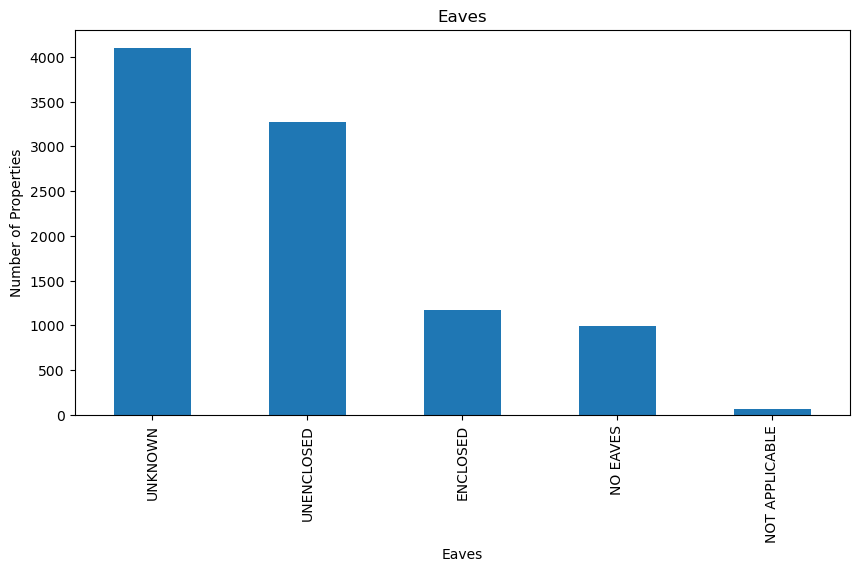

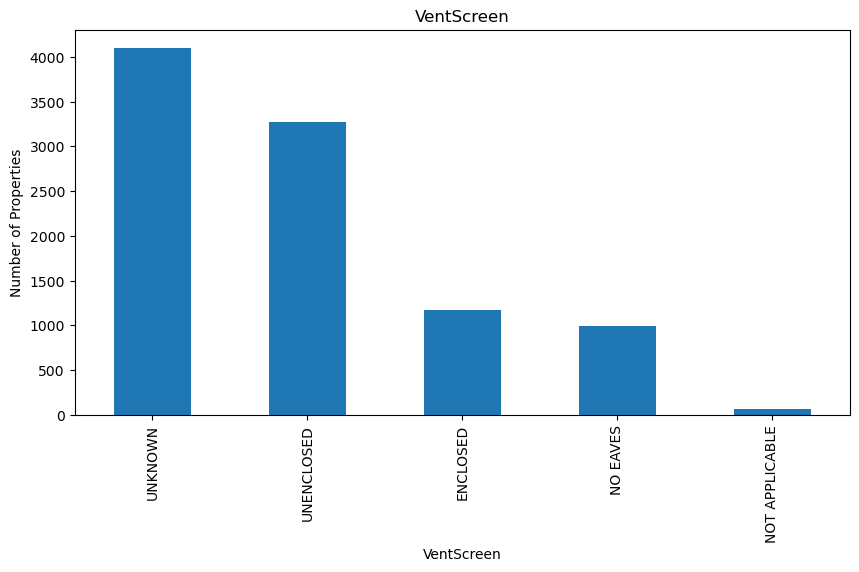

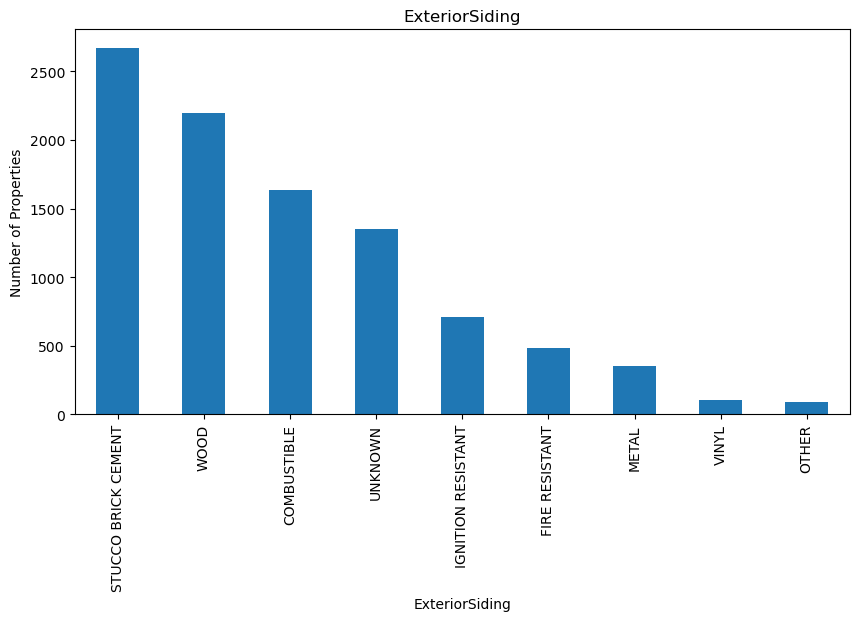

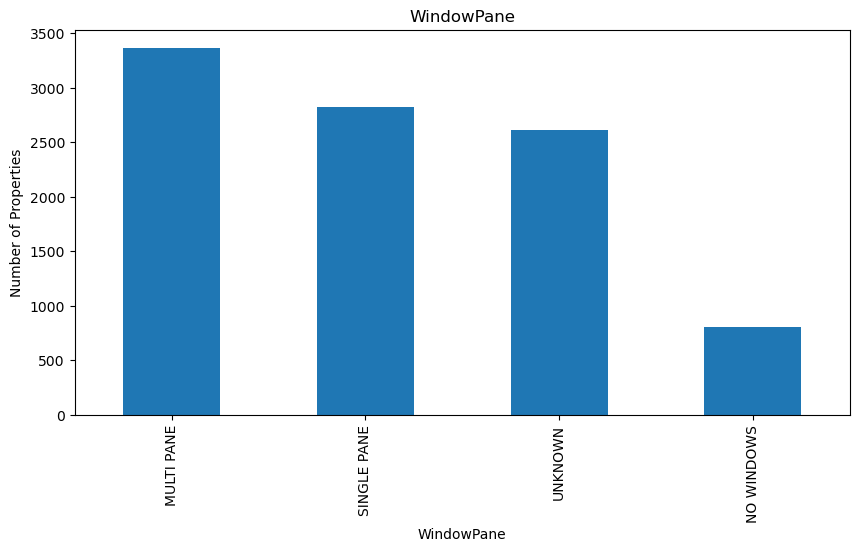

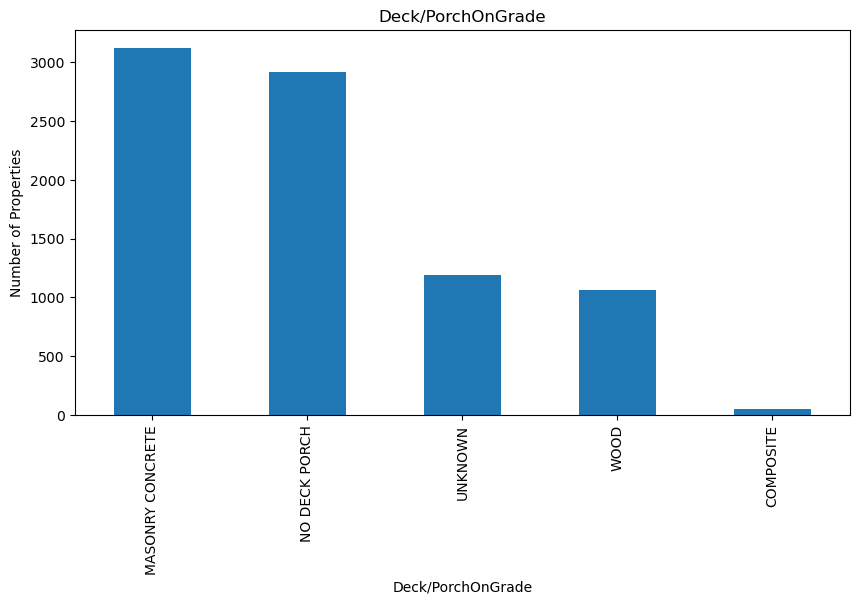

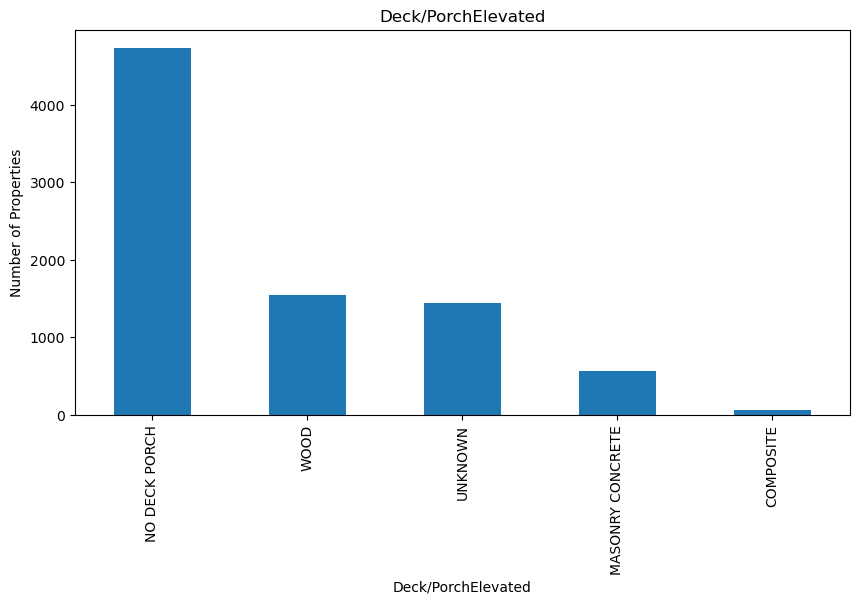

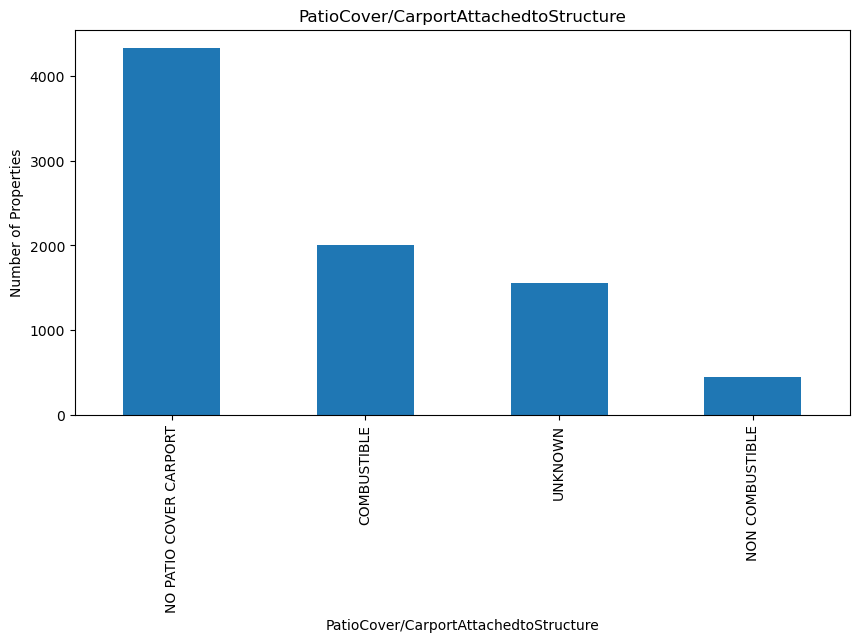

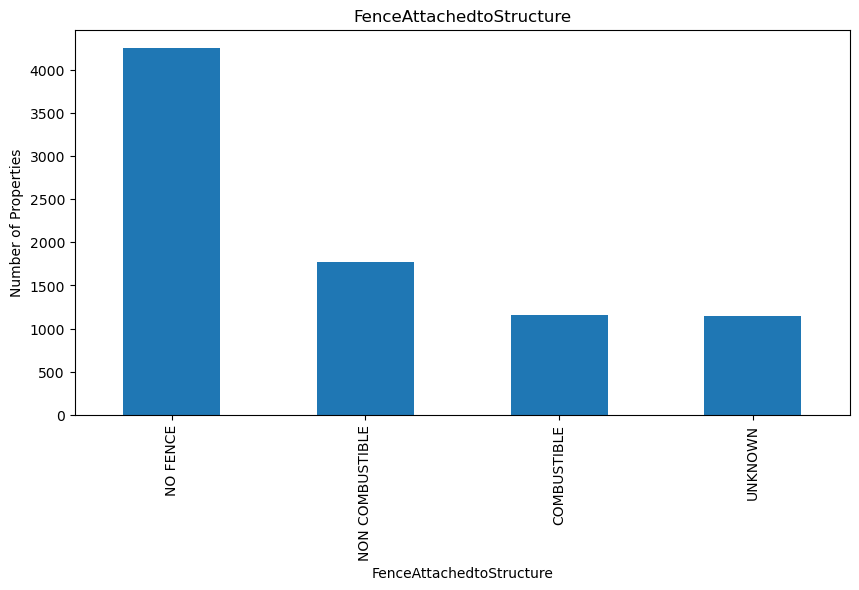

In [102]:
# Plot bar plots for all the catagorical features and save them in a single PDF file
# Exclude the below features due to high cardinality
excluded_features = ['ObjectID', 'StreetName', 'City', 'ZipCode', 'Community', 'SiteAddress']
with PdfPages('categorical_barplots_1-1.pdf') as pp:
    for col in categorical_columns:
        if col not in excluded_features:
            f = df[col].value_counts().plot(kind='bar', figsize=(10,5))
            plt.title(col)
            plt.ylabel('Number of Properties')
            pp.savefig(f.get_figure())
            plt.show()

# (2). Data Understanding: Data Quality Plan for the cleaned CSV file.

### 1. The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

- The feature HazardType had a cardinality of 1 (Fire). Because it did not provide variability between records, this column was dropped as part of the preliminary cleaning.
- The feature Distance-ResidencetoUtility/MiscStructure>120SQFT only applied to properties with external structures greater than 120 SQFT. As a result, this feature was missing values for 86% of records. This feature was dropped as part of the preliminary cleaning
- The feature Distance-PropaneTankStructure only applied to properties with propane tanks. As a result, this feature was missing values for 87% of records. This feature was dropped as part of the preliminary cleaning process
- Structure defense actions weren't recorded for most properties (94%). As a result, the feature StructureDefenseActionsTaken was dropped as part of the preliminary cleaning
- Missing values for ZipCode - 40% of records in the original dataset are missing values for ZipCode, which may impede location-based analysis
- Missing values for features - Other features are also missing values. Their significance varies depending on the overall relevance of each column to the analysis or model. Further investigation of missing data patterns will guide decisions for handling missing values
- Presence of outliers - There are a significant number of outliers present across a range of different features. They initially look plausible but will need to be investigated further
- High cardinality features - There are several features with high cardinality, which can cause overfitting for predictive models. They will need to be investigated further 

In [103]:
# Read from csv file into a data frame
df = pd.read_csv('FireDamageCleaned.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [104]:
# Convert all object columns to category
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('category')
    
# Convert IncidentStartDate to date time
df['IncidentStartDate'] = pd.to_datetime(df['IncidentStartDate'])

### 2. Propose solutions to deal with the problems identified

#### 2.1 Missing/Placeholder Values

2.1.1 ZipCode: 
- In the data quality report, noted that 40.03% of records are missing values for ZipCode
- The composite feature SiteAddress can be used to determine some of those missing values

In [105]:
# Function to extract ZipCode from SiteAddress
def extract_zipcode(site_address):
    match = re.search(r'(\d{5})$', str(site_address))  #Extract five-digit zip code
    if match: #If a match is found
        return match.group(1).lstrip('0')  #Return the found ZipCode without leading zeros
    return None #If no match, return None

#Ensure that ZipCode and SiteAddress are treated as strings for easier matching
df['ZipCode'] = df['ZipCode'].astype(str)
df['SiteAddress'] = df['SiteAddress'].astype(str)

#Filter the rows where ZipCode is missing, 'nan', or '0.0' -> will be filling in these rows
df_null_zip_code = df[df['ZipCode'].isnull() | (df['ZipCode'] == 'nan') | (df['ZipCode'] == '0') | (df['ZipCode'] == '0.0')]
print(len(df_null_zip_code))  #Check how many rows have invalid ZipCode

# Apply the function to the SiteAddress column and directly insert the result into the ZipCode column
#df.loc selects rows based on conditions (is null, nan, or 0/0.0) -> if row matches these conditions, apply the function to extract zip code from SiteAddress
df.loc[df['ZipCode'].isnull() | (df['ZipCode'] == 'nan') | (df['ZipCode'] == '0') | (df['ZipCode'] == '0.0'), 'ZipCode'] = df['SiteAddress'].apply(extract_zipcode)

#Convert 'ZipCode' to categorical data type after filling missing values
df['ZipCode'] = df['ZipCode'].astype("category")

#Verify changes: Check if there are still any missing ZipCode values
print(df[df['ZipCode'].isnull()])  #Check if there are still any missing ZipCode values
print(df['ZipCode'].isnull().sum())  #Count of missing ZipCode values

# Calculate the percentage of records missing ZipCode
null_percentage = (df['ZipCode'].isnull().sum()) / len(df) * 100
print("Percentage of records missing ZipCode: ", null_percentage, "%")  #Percentage of missing ZipCode


5915
      ObjectID            Damage  StreetNumber     StreetName StreetType  \
52       57136         No Damage        4398.0     ATLAS PEAK       ROAD   
64       57861  Destroyed (>50%)        2765.0     ATLAS PEAK       ROAD   
91       20554         No Damage       38601.0  CARMEL VALLEY       ROAD   
92       48249  Destroyed (>50%)        3640.0        NORANDA       LANE   
93        5555         No Damage           4.0         WISHON      DRIVE   
...        ...               ...           ...            ...        ...   
9948     17340         No Damage        7125.0       SOLITUDE      COURT   
9949     28164         No Damage       15002.0       ANDERSON        WAY   
9953     48836  Destroyed (>50%)        2576.0          SAPRA        NaN   
9957     74309  Destroyed (>50%)       12494.0      GAS PIONT       ROAD   
9961      5556         No Damage           5.0         WISHON      DRIVE   

                    City State ZipCode CALFIREUnit       County  \
52        UNINC

In [106]:
df[df['ZipCode'].isnull()]

,ObjectID,Damage,StreetNumber,StreetName,StreetType,City,State,ZipCode,CALFIREUnit,County,Community,IncidentStartDate,StructureType,StructureCategory,NumUnitsinStructure,RoofConstruction,Eaves,VentScreen,ExteriorSiding,WindowPane,Deck/PorchOnGrade,Deck/PorchElevated,PatioCover/CarportAttachedtoStructure,FenceAttachedtoStructure,AssessedImprovedValue,YearBuilt,SiteAddress,Latitude,Longitude
52,57136,No Damage,4398.0,ATLAS PEAK,ROAD,UNINCORPORATED,CA,NaN,LNU,NAPA,NaN,2017-10-08,UTILITY MISC STRUCTURE,OTHER MINOR STRUCTURE,NaN,FIRE RESISTANT,NOT APPLICABLE,NOT APPLICABLE,COMBUSTIBLE,UNKNOWN,NaN,NaN,NaN,NaN,249055.0,NaN,4398 ATLAS PEAK RD,38.440471,-122.239681
64,57861,Destroyed (>50%),2765.0,ATLAS PEAK,ROAD,UNINCORPORATED,CA,NaN,LNU,NAPA,NaN,2017-10-08,SINGLE FAMILY RESIDENCE SINGLE STORY,SINGLE RESIDENCE,NaN,UNKNOWN,UNKNOWN,UNKNOWN,FIRE RESISTANT,MULTI PANE,NaN,NaN,NaN,NaN,1557983.0,1988.0,2765 ATLAS PEAK RD,38.375342,-122.245950
91,20554,No Damage,38601.0,CARMEL VALLEY,ROAD,NaN,CA,NaN,BEU,MONTEREY,NaN,2020-08-16,INFRASTRUCTURE,INFRASTRUCTURE,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,nan,36.387939,-121.549557
92,48249,Destroyed (>50%),3640.0,NORANDA,LANE,LOS ANGELES COUNTY,CA,NaN,LAC,LOS ANGELES,MALIBU,2018-11-08,SINGLE FAMILY RESIDENCE SINGLE STORY,SINGLE RESIDENCE,0.0,UNKNOWN,UNENCLOSED,UNENCLOSED,COMBUSTIBLE,UNKNOWN,UNKNOWN,UNKNOWN,NO PATIO COVER CARPORT,NO FENCE,0.0,0.0,nan,34.053798,-118.875252
93,5555,No Damage,4.0,WISHON,DRIVE,NaN,CA,NaN,TUU,TULARE,SPRINGVILLE,2020-08-19,SINGLE FAMILY RESIDENCE MULTI STORY,SINGLE RESIDENCE,0.0,METAL,UNENCLOSED,UNENCLOSED,WOOD,SINGLE PANE,NO DECK PORCH,WOOD,NO PATIO COVER CARPORT,NO FENCE,0.0,0.0,nan,36.195372,-118.655845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,17340,No Damage,7125.0,SOLITUDE,COURT,NaN,CA,NaN,LNU,SOLANO,NaN,2020-08-16,SINGLE FAMILY RESIDENCE MULTI STORY,SINGLE RESIDENCE,NaN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,nan,38.407304,-122.012083
9949,28164,No Damage,15002.0,ANDERSON,WAY,NaN,CA,NaN,ORC,ORANGE,NaN,2020-12-02,SINGLE FAMILY RESIDENCE MULTI STORY,SINGLE RESIDENCE,NaN,ASPHALT,ENCLOSED,ENCLOSED,STUCCO BRICK CEMENT,MULTI PANE,MASONRY CONCRETE,WOOD,NO PATIO COVER CARPORT,NON COMBUSTIBLE,278401.0,NaN,15002 ANDERSON WAY AB SILVERADO CA,33.743540,-117.635133
9953,48836,Destroyed (>50%),2576.0,SAPRA,NaN,THOUSAND OAKS,CA,NaN,VNC,VENTURA,THOUSAND OAKS,2018-11-08,SINGLE FAMILY RESIDENCE SINGLE STORY,SINGLE RESIDENCE,NaN,TILE,UNENCLOSED,UNENCLOSED,IGNITION RESISTANT,MULTI PANE,MASONRY CONCRETE,WOOD,NO PATIO COVER CARPORT,NON COMBUSTIBLE,538749.0,1977.0,2576 SAPRA ST THOUSAND OAKS CA,34.196782,-118.836644
9957,74309,Destroyed (>50%),12494.0,GAS PIONT,ROAD,ANDERSON,CA,NaN,SHU,SHASTA,NaN,2013-09-09,UTILITY MISC STRUCTURE,OTHER MINOR STRUCTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,nan,40.460586,-122.534951


In [107]:
df['ZipCode'].isnull().sum()

np.int64(1069)

After extracting zip code values from SiteAddress, the percentage of records missing values for ZipCode was reduced

Potential Actions:
- Given that latitude and longitude are available for 100% of records, use geocoding to determine missing values for ZipCode
    - Requires API calls via geocoding services such as Google Maps API
    - High accuracy for filling missing values
- Use mode imputation to fill in missing values for ZipCode
    - Can introduce bias if the missing zip codes are not randomly distributed
    - Medium accuracy for filling missing values
- Leave missing zip codes as NaN
    - Preserves data integrity

**Decision:** Perform mode imputation after grouping by city
- Although city and zip code boundaries don't align perfectly, cities tend to have a primary zip code that is most frequently associated with the city
- Mode imputation is a straightforward method that does not require complex algorithms or external services, such as API calls
- Filling in missing values with the most frequent zip code within a city preserves data completeness, which will support later analysis

In [108]:
def get_mode_excluding_nan(x):
    # Return the most common zip code for each city
    x_filtered = x.dropna()  #Exclude NaN values
    return x_filtered.mode()[0] if not x_filtered.mode().empty else pd.NA #Return the first mode in case there are multiple modes

#Fill missing ZipCode values with the mode of the corresponding 'City'
df['ZipCode'] = df['ZipCode'].fillna(df.groupby('City')['ZipCode'].transform(get_mode_excluding_nan))

#Check if there are still missing values in 'ZipCode'
missing_values_zipcode = df['ZipCode'].isnull().sum()
print(f"Missing ZipCode values after imputation: {missing_values_zipcode}")

Missing ZipCode values after imputation: 538


In [109]:
df['ZipCode'].isnull().sum()

np.int64(538)

In [110]:
# Check which cities have all ZipCode values missing
cities_with_all_missing_zip = df[df['ZipCode'].isnull()]['City'].value_counts()
print(cities_with_all_missing_zip)

City
SOUTH LAKE       19
THOUSAND OAKS     5
YUCAIPA           4
SANTA BARBARA     2
POPPET FLATS      2
                 ..
JANESVILLE        0
JOHNSONDALE       0
JUNCTION CITY     0
JURUPA VALLEY     0
ZENIA             0
Name: count, Length: 216, dtype: int64


There are certain cities in the dataset that do not have zip codes. As a result, we cannot find a mode for them. We can apply an alternative strategy for cities without a mode by filling ZipCode values with the mode for the dataset

In [111]:
#Get the most frequent zip code in the overall dataset
most_frequent_zip = df['ZipCode'].mode()[0]

#Impute the missing ZipCodes based on the City mode
df['ZipCode'] = df.groupby('City')['ZipCode'].transform(
    lambda x: x.mode()[0] if not x.mode().empty else most_frequent_zip
)

# For rows where City is NaN, replace missing ZipCodes with the dataset mode
df.loc[df['City'].isnull(), 'ZipCode'] = df.loc[df['City'].isnull(), 'ZipCode'].fillna(most_frequent_zip)


In [112]:
# Check rows with missing ZipCode after imputation
missing_zipcodes = df[df['ZipCode'].isnull()]
missing_zipcodes.head() #Preview the rows with missing ZipCodes


,ObjectID,Damage,StreetNumber,StreetName,StreetType,City,State,ZipCode,CALFIREUnit,County,Community,IncidentStartDate,StructureType,StructureCategory,NumUnitsinStructure,RoofConstruction,Eaves,VentScreen,ExteriorSiding,WindowPane,Deck/PorchOnGrade,Deck/PorchElevated,PatioCover/CarportAttachedtoStructure,FenceAttachedtoStructure,AssessedImprovedValue,YearBuilt,SiteAddress,Latitude,Longitude


In [113]:
df[df['ZipCode'].isnull()]

,ObjectID,Damage,StreetNumber,StreetName,StreetType,City,State,ZipCode,CALFIREUnit,County,Community,IncidentStartDate,StructureType,StructureCategory,NumUnitsinStructure,RoofConstruction,Eaves,VentScreen,ExteriorSiding,WindowPane,Deck/PorchOnGrade,Deck/PorchElevated,PatioCover/CarportAttachedtoStructure,FenceAttachedtoStructure,AssessedImprovedValue,YearBuilt,SiteAddress,Latitude,Longitude


After extracting zip codes from SiteAddress and performing several rounds of imputation, there are no null values for ZipCode

In [114]:
df[df['ZipCode'].isnull() | (df['ZipCode'] == 'nan') | (df['ZipCode'] == '0') | (df['ZipCode'] == '0.0')]

,ObjectID,Damage,StreetNumber,StreetName,StreetType,City,State,ZipCode,CALFIREUnit,County,Community,IncidentStartDate,StructureType,StructureCategory,NumUnitsinStructure,RoofConstruction,Eaves,VentScreen,ExteriorSiding,WindowPane,Deck/PorchOnGrade,Deck/PorchElevated,PatioCover/CarportAttachedtoStructure,FenceAttachedtoStructure,AssessedImprovedValue,YearBuilt,SiteAddress,Latitude,Longitude


In [115]:
#Convert 'ZipCode' back to categorical
df['ZipCode'] = df['ZipCode'].astype("category")

2.1.2 Community: 
- As noted in the data quality report, 58% of records are missing values for Community
- The feature has high cardinality (425 unique values)

Potential Actions
- Leave missing values as NaN
    - Leaving missing values NaN avoids the introduction of bias
    - Rely on other features such as ZipCode, Latitude, and Longitude for location-based analysis
- Imputation
    - Group by ZipCode and fill missing Community values with the most frequently recorded community (mode) for each ZipCode
- Drop feature
    - If the feature is not relevant to later analysis, we can drop the feature
    - We can rely on other features such as ZipCode, Latitude, and Longitude for location-based analysis

**Decision:** Drop the feature because 58% of records are missing values for it. Additionally, the feature has high cardinality. Location-based analysis can be performed using features such as ZipCode, County, City, Latitude, and Longitude

In [116]:
df = df.drop("Community", axis=1)
print(df.columns)

Index(['ObjectID', 'Damage', 'StreetNumber', 'StreetName', 'StreetType',
       'City', 'State', 'ZipCode', 'CALFIREUnit', 'County',
       'IncidentStartDate', 'StructureType', 'StructureCategory',
       'NumUnitsinStructure', 'RoofConstruction', 'Eaves', 'VentScreen',
       'ExteriorSiding', 'WindowPane', 'Deck/PorchOnGrade',
       'Deck/PorchElevated', 'PatioCover/CarportAttachedtoStructure',
       'FenceAttachedtoStructure', 'AssessedImprovedValue', 'YearBuilt',
       'SiteAddress', 'Latitude', 'Longitude'],
      dtype='object')


In [117]:
df.dtypes

ObjectID                                    int64
Damage                                   category
StreetNumber                              float64
StreetName                               category
StreetType                               category
City                                     category
State                                    category
ZipCode                                  category
CALFIREUnit                              category
County                                   category
IncidentStartDate                        category
StructureType                            category
StructureCategory                        category
NumUnitsinStructure                       float64
RoofConstruction                         category
Eaves                                    category
VentScreen                               category
ExteriorSiding                           category
WindowPane                               category
Deck/PorchOnGrade                        category


2.1.3 AssessedImprovedValue
- As noted in the data quality report, 5.03% of records are missing values for AssessedImprovedValue

**Decision:** Leave NaN values for now. Will reassess null values when evaluating outliers later in the data quality plan

2.1.4 Missing values for NumUnitsinStructure
- Noted in the data quality report that 70.30% of records in the dataset contain null values for NumUnitsinStructure. We will evaluate the feature by revisiting the summary statistics

In [118]:
# Assess the summary statistics for NumUnitsinStructure
df['NumUnitsinStructure'].describe()

count    2970.000000
mean        0.225253
std         1.066705
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.000000
Name: NumUnitsinStructure, dtype: float64

In [119]:
df['NumUnitsinStructure'].isnull().sum()

np.int64(7030)

Observations:
- There are 2,970 records with values for NumUnitsinStructure
- The relatively high standard deviation (1.066) compared to the mean (0.225253) suggests some variance, with outliers in the dataset
- The min, Q1, median, and Q3 are all equal to zero, indicating that the dataset is either primarily made up of single unit structues, or 0 is being used as a placeholder
- The max is 11, indicating that there are multi-unit structures in the dataset

In [120]:
zero_units_by_type = df[df["NumUnitsinStructure"] == 0]["StructureType"].value_counts()

print(zero_units_by_type)

StructureType
SINGLE FAMILY RESIDENCE SINGLE STORY           894
UTILITY MISC STRUCTURE                         785
SINGLE FAMILY RESIDENCE MULTI STORY            612
MOBILE HOME DOUBLE WIDE                        125
COMMERCIAL BUILDING SINGLE STORY                79
MOTOR HOME                                      78
MOBILE HOME SINGLE WIDE                         69
INFRASTRUCTURE                                  28
SCHOOL                                          16
MIXED COMMERCIAL RESIDENTIAL                    15
MOBILE HOME TRIPLE WIDE                         11
COMMERCIAL BUILDING MULTI STORY                 10
MULTI FAMILY RESIDENCE SINGLE STORY              4
MULTI FAMILY RESIDENCE MULTI STORY               3
CHURCH                                           2
HOSPITAL                                         0
UTILITY OR MISCELLANEOUS STRUCTURE 120 SQFT      0
Name: count, dtype: int64


Observations:
- After grouping by StructureType, it appears that the majority of zero values belong to single family residences and miscellaneous utility structures, indicating that zero likely indicates single unit structures 

**Decision:** Drop NumUnitsinStructure as a feature
1. Prevalence of null values, as ~70% of records are missing values for this feature. Imputation could introduce bias rather than improve data quality
2. Unreliable 0 serving as a placeholder rather than meaningful data
3. Redundant information, as nature of the building is covered by the categorical feature StructureType
- Most structure types imply a unit count (Example: Single Family Residence implies NumUnitsinStructure = 1, Multi Family Residence implies multiple units)

In [121]:
df = df.drop("NumUnitsinStructure", axis=1)

In [122]:
print(df.columns)

Index(['ObjectID', 'Damage', 'StreetNumber', 'StreetName', 'StreetType',
       'City', 'State', 'ZipCode', 'CALFIREUnit', 'County',
       'IncidentStartDate', 'StructureType', 'StructureCategory',
       'RoofConstruction', 'Eaves', 'VentScreen', 'ExteriorSiding',
       'WindowPane', 'Deck/PorchOnGrade', 'Deck/PorchElevated',
       'PatioCover/CarportAttachedtoStructure', 'FenceAttachedtoStructure',
       'AssessedImprovedValue', 'YearBuilt', 'SiteAddress', 'Latitude',
       'Longitude'],
      dtype='object')


2.1.5 City

- In the data quality report, noted that 23.71% of records in the data are missing values for City

**Decision:** Drop City feature
- The City feature is not crucial for location-based analysis. Zip codes are more precise than city names, and the dataset has zip codes for most records. As a result, zip code can be used as a proxy for city-level data analysis
- Geocoding or mapping ZIP codes to cities was considered but deemed unnecessary, as ZIP codes provide sufficient granularity for analysis
- Imputing city names based on ZIP codes could introduce errors due to mismatch between postal city names and local government boundaries
- The City feature has high cardinality (255 values) and contains typos, inconsistencies, and misspellings across its categories. Cleaning it adds complexity without significant benefits

In [123]:
df = df.drop("City", axis=1)

In [124]:
df.dtypes

ObjectID                                    int64
Damage                                   category
StreetNumber                              float64
StreetName                               category
StreetType                               category
State                                    category
ZipCode                                  category
CALFIREUnit                              category
County                                   category
IncidentStartDate                        category
StructureType                            category
StructureCategory                        category
RoofConstruction                         category
Eaves                                    category
VentScreen                               category
ExteriorSiding                           category
WindowPane                               category
Deck/PorchOnGrade                        category
Deck/PorchElevated                       category
PatioCover/CarportAttachedtoStructure    category


2.1.6 StreetType

- In the data quality report, noted that 24.3% of records have null values for StreetType
- The feature has high cardinality, with 21 different categories
- There are dominant categories such as "Road" and "Drive"

In [125]:
#Get value counts for 'StreetType', including NaN values
street_type_counts = df['StreetType'].value_counts(dropna=False)

street_type_counts_df = street_type_counts.reset_index()
street_type_counts_df.columns = ['Street Type', 'Count']

street_type_counts_df

,Street Type,Count
0,ROAD,3441
1,DRIVE,1639
2,NaN,1112
3,LANE,838
4,STREET,763
5,AVENUE,721
6,WAY,376
7,COURT,310
8,PLACE,153
9,OTHER,149


**Decision:** Retain NaN values, revisit when addressing cardinality <br>
- Due to high cardinality and dominant categories, imputing missing values with the mode may misrepresent the distribution across categories
- Imputing with the mode would overrepresent dominant categories such as "Road", which may not accurately reflect the missing values
- Because StreetType is a categorical feature, NaN values can be ignored during model training, resulting in more accurate predictions when compared to mode imputation
- Will retain the categories and not reduce cardinality because they may be used in feature engineering later (i.e., modeling patterns across rural vs. urban properties)

2.1.7 WindowPane
- In the data quality report, noted that 30% of records have null/unknown values for WindowPane

In [126]:
window_counts_df = df['WindowPane'].value_counts(dropna=False)
window_counts_df.columns = ['WindowPane', 'Count']
window_counts_df

WindowPane
MULTI PANE     3365
SINGLE PANE    2825
UNKNOWN        2617
NO WINDOWS      805
NaN             388
Name: count, dtype: int64

In [127]:
#Group by StructureType and WindowPane and calculate counts
window_by_structure = df.groupby(['StructureType', 'WindowPane']).size().unstack(fill_value=0)

#Calculate the proportions within each StructureType
window_by_structure_prop = window_by_structure.div(window_by_structure.sum(axis=1), axis=0)

print(window_by_structure)
print(window_by_structure_prop)


WindowPane                                   MULTI PANE  NO WINDOWS  \
StructureType                                                         
CHURCH                                                0           0   
COMMERCIAL BUILDING MULTI STORY                      20           1   
COMMERCIAL BUILDING SINGLE STORY                     72          41   
HOSPITAL                                              0           0   
INFRASTRUCTURE                                        3          35   
MIXED COMMERCIAL RESIDENTIAL                          0           0   
MOBILE HOME DOUBLE WIDE                             164           3   
MOBILE HOME SINGLE WIDE                              41           2   
MOBILE HOME TRIPLE WIDE                              25           0   
MOTOR HOME                                           17           0   
MULTI FAMILY RESIDENCE MULTI STORY                   74           0   
MULTI FAMILY RESIDENCE SINGLE STORY                  26           0   
SCHOOL

**Observations:** 
- Certain structure types have a high proportion of Unknowns (e.g., Single Family Residence Single Story, Utility Misc Structure, Commercial Building Single Story)

**Decision:** Perform mode imputation after grouping by StructureType
- Grouping by StructureType ensures that the mode for each specific structure type is used, preventing such bias and making imputations more aligned with the actual distribution for each structure type
- Grouping by StructureType before imputation ensures that the imputation respects the underlying patterns within each group
- Combine Unknown and null vaues as a single category, as they both represent missing values

In [128]:
df['WindowPane'] = df['WindowPane'].replace('Unknown', pd.NA)  # Replace 'Unknown' with NaN
df['WindowPane'] = df['WindowPane'].fillna(
    df.groupby('StructureType')['WindowPane'].transform(
        lambda x: x[x != 'Unknown'].mode()[0] if not x[x != 'Unknown'].mode().empty else 'Unknown')
)

In [129]:
window_counts_df = df['WindowPane'].value_counts(dropna=False)
window_counts_df.columns = ['WindowPane', 'Count']
window_counts_df

WindowPane
MULTI PANE     3601
SINGLE PANE    2886
UNKNOWN        2707
NO WINDOWS      806
Name: count, dtype: int64

In [130]:
#Group by StructureType and WindowPane and calculate counts or proportions
window_by_structure = df.groupby(['StructureType', 'WindowPane']).size().unstack(fill_value=0)

#Calculate the proportions within each StructureType
window_by_structure_prop = window_by_structure.div(window_by_structure.sum(axis=1), axis=0)

print(window_by_structure)
print(window_by_structure_prop)

WindowPane                                   MULTI PANE  NO WINDOWS  \
StructureType                                                         
CHURCH                                                0           0   
COMMERCIAL BUILDING MULTI STORY                      23           1   
COMMERCIAL BUILDING SINGLE STORY                     94          41   
HOSPITAL                                              0           0   
INFRASTRUCTURE                                        3          36   
MIXED COMMERCIAL RESIDENTIAL                          0           0   
MOBILE HOME DOUBLE WIDE                             164           3   
MOBILE HOME SINGLE WIDE                              41           2   
MOBILE HOME TRIPLE WIDE                              28           0   
MOTOR HOME                                           17           0   
MULTI FAMILY RESIDENCE MULTI STORY                   76           0   
MULTI FAMILY RESIDENCE SINGLE STORY                  33           0   
SCHOOL

As a result, there are no longer NaN values for WindowPane. Unknown/missing values have been grouped into category UNKNOWN

2.1.8 Deck/PorchOnGrade
- As noted in the data quality report, 28.52% of records are missing values for Deck/PorchOnGrade

In [131]:
grade_counts_df = df['Deck/PorchOnGrade'].value_counts(dropna=False)
grade_counts_df.columns = ['Deck/PorchOnGrade', 'Count']
grade_counts_df

Deck/PorchOnGrade
MASONRY CONCRETE    3119
NO DECK PORCH       2920
NaN                 1662
UNKNOWN             1190
WOOD                1060
COMPOSITE             49
Name: count, dtype: int64

In [132]:
#Group by StructureType and Deck/PorchOnGrade and calculate counts
grade_by_structure = df.groupby(['StructureType', 'Deck/PorchOnGrade']).size().unstack(fill_value=0)

#Calculate the proportions within each StructureType
grade_by_structure_prop = grade_by_structure.div(grade_by_structure.sum(axis=1), axis=0)

print(grade_by_structure)
print(grade_by_structure_prop)

Deck/PorchOnGrade                            COMPOSITE  MASONRY CONCRETE  \
StructureType                                                              
CHURCH                                               0                 6   
COMMERCIAL BUILDING MULTI STORY                      1                14   
COMMERCIAL BUILDING SINGLE STORY                     0                57   
HOSPITAL                                             0                 1   
INFRASTRUCTURE                                       0                 9   
MIXED COMMERCIAL RESIDENTIAL                         0                 0   
MOBILE HOME DOUBLE WIDE                              1                98   
MOBILE HOME SINGLE WIDE                              0                35   
MOBILE HOME TRIPLE WIDE                              1                14   
MOTOR HOME                                           1                 8   
MULTI FAMILY RESIDENCE MULTI STORY                   1                67   
MULTI FAMILY

**Decision:** Perform mode imputation on Unknown/Null values after grouping by StructureType
- Replace Unknown values with NaN, as they both represent missing data
- Grouping by StructureType ensures that the mode for each specific structure type is used, preventing such bias and making imputations more aligned with the actual distribution for each structure type
- Grouping by StructureType before imputation ensures that the imputation respects the underlying patterns within each group

In [133]:
# Replace Unknown with pd.NA
df['Deck/PorchOnGrade'] = df['Deck/PorchOnGrade'].replace('Unknown', pd.NA)

#Perform mode imputation by grouping, fill NaNs with mode of each group
df['Deck/PorchOnGrade'] = df.groupby('StructureType')['Deck/PorchOnGrade'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else pd.NA))

In [134]:
df['Deck/PorchOnGrade'].isnull().sum()

np.int64(4)

In [135]:
#Calculate the overall mode for 'Deck/PorchOnGrade'
overall_mode = df['Deck/PorchOnGrade'].mode()[0] if not df['Deck/PorchOnGrade'].mode().empty else pd.NA

#Fill remaining NaNs with the overall mode
df['Deck/PorchOnGrade'] = df['Deck/PorchOnGrade'].fillna(overall_mode)

In [136]:
df['Deck/PorchOnGrade'].isnull().sum()

np.int64(0)

In [137]:
#Group by StructureType and WindowPane and calculate counts
grade_by_structure = df.groupby(['StructureType', 'Deck/PorchOnGrade']).size().unstack(fill_value=0)

#Calculate the proportions within each StructureType
grade_by_structure_prop = grade_by_structure.div(grade_by_structure.sum(axis=1), axis=0)

print(grade_by_structure)
print(grade_by_structure_prop)

Deck/PorchOnGrade                            COMPOSITE  MASONRY CONCRETE  \
StructureType                                                              
CHURCH                                               0                 8   
COMMERCIAL BUILDING MULTI STORY                      1                20   
COMMERCIAL BUILDING SINGLE STORY                     0                57   
HOSPITAL                                             0                 1   
INFRASTRUCTURE                                       0                 9   
MIXED COMMERCIAL RESIDENTIAL                         0                 0   
MOBILE HOME DOUBLE WIDE                              1                98   
MOBILE HOME SINGLE WIDE                              0                35   
MOBILE HOME TRIPLE WIDE                              1                28   
MOTOR HOME                                           1                 8   
MULTI FAMILY RESIDENCE MULTI STORY                   1                80   
MULTI FAMILY

In [138]:
grade_counts_df = df['Deck/PorchOnGrade'].value_counts(dropna=False)
grade_counts_df.columns = ['Deck/PorchOnGrade', 'Count']
grade_counts_df

Deck/PorchOnGrade
MASONRY CONCRETE    4129
NO DECK PORCH       3572
UNKNOWN             1190
WOOD                1060
COMPOSITE             49
Name: count, dtype: int64

After performing imputation, there are no more null values for Deck/PorchOnGrade

2.1.9 Deck/PorchElevated                  

In [139]:
elevated_counts_df = df['Deck/PorchElevated'].value_counts(dropna=False)
elevated_counts_df.columns = ['Deck/PorchElevated', 'Count']
elevated_counts_df

Deck/PorchElevated
NO DECK PORCH       4728
NaN                 1662
WOOD                1546
UNKNOWN             1441
MASONRY CONCRETE     561
COMPOSITE             62
Name: count, dtype: int64

As there are a significant number of NaN values in Deck/PorchElevated, we need to handle these values through a method such as imputation

In [140]:
#Group by StructureType and Deck/PorchElevated and calculate counts
elevated_by_structure = df.groupby(['StructureType', 'Deck/PorchElevated']).size().unstack(fill_value=0)

#Calculate the proportions within each StructureType
elevated_by_structure_prop = elevated_by_structure.div(elevated_by_structure.sum(axis=1), axis=0)

print(elevated_by_structure)
print(elevated_by_structure_prop)

Deck/PorchElevated                           COMPOSITE  MASONRY CONCRETE  \
StructureType                                                              
CHURCH                                               0                 1   
COMMERCIAL BUILDING MULTI STORY                      2                 7   
COMMERCIAL BUILDING SINGLE STORY                     1                 7   
HOSPITAL                                             0                 0   
INFRASTRUCTURE                                       0                 0   
MIXED COMMERCIAL RESIDENTIAL                         0                 1   
MOBILE HOME DOUBLE WIDE                              3                 6   
MOBILE HOME SINGLE WIDE                              0                 0   
MOBILE HOME TRIPLE WIDE                              1                 0   
MOTOR HOME                                           3                 0   
MULTI FAMILY RESIDENCE MULTI STORY                   4                31   
MULTI FAMILY

**Decision:** Perform mode imputation on Unknown/Null values after grouping by StructureType
- Replace Unknown values with NaN, as they both represent missing data
- Grouping by StructureType ensures that the mode for each specific structure type is used, preventing such bias and making imputations more aligned with the actual distribution for each structure type
- Grouping by StructureType before imputation ensures that the imputation respects the underlying patterns within each group

In [141]:
# Replace 'Unknown' with pd.NA
df['Deck/PorchElevated'] = df['Deck/PorchElevated'].replace('Unknown', pd.NA)

# Perform mode imputation by grouping, fill NaNs with mode of each group
df['Deck/PorchElevated'] = df.groupby('StructureType')['Deck/PorchElevated'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else pd.NA))

In [142]:
df['Deck/PorchElevated'].isnull().sum()

np.int64(4)

In [143]:
#Calculate the overall mode for 'Deck/PorchOnGrade'
overall_mode = df['Deck/PorchElevated'].mode()[0] if not df['Deck/PorchElevated'].mode().empty else pd.NA

#Fill remaining NaNs with the overall mode
df['Deck/PorchElevated'] = df['Deck/PorchElevated'].fillna(overall_mode)

In [144]:
df['Deck/PorchElevated'].isnull().sum()

np.int64(0)

In [145]:
#Group by StructureType and WindowPane and calculate counts
elevated_by_structure = df.groupby(['StructureType', 'Deck/PorchElevated']).size().unstack(fill_value=0)

#Calculate the proportions within each StructureType
elevated_by_structure_prop = elevated_by_structure.div(elevated_by_structure.sum(axis=1), axis=0)

print(elevated_by_structure)
print(elevated_by_structure_prop)

Deck/PorchElevated                           COMPOSITE  MASONRY CONCRETE  \
StructureType                                                              
CHURCH                                               0                 1   
COMMERCIAL BUILDING MULTI STORY                      2                 7   
COMMERCIAL BUILDING SINGLE STORY                     1                 7   
HOSPITAL                                             0                 0   
INFRASTRUCTURE                                       0                 0   
MIXED COMMERCIAL RESIDENTIAL                         0                 1   
MOBILE HOME DOUBLE WIDE                              3                 6   
MOBILE HOME SINGLE WIDE                              0                 0   
MOBILE HOME TRIPLE WIDE                              1                 0   
MOTOR HOME                                           3                 0   
MULTI FAMILY RESIDENCE MULTI STORY                   4                44   
MULTI FAMILY

In [146]:
elevated_counts_df = df['Deck/PorchElevated'].value_counts(dropna=False)
elevated_counts_df.columns = ['Deck/PorchElevated', 'Count']
elevated_counts_df

Deck/PorchElevated
NO DECK PORCH       5908
WOOD                2015
UNKNOWN             1441
MASONRY CONCRETE     574
COMPOSITE             62
Name: count, dtype: int64

After performing imputation, there are no more NaN values

2.1.9 PatioCover/CarportAttachedtoStructure
- In the data quality report, noted that 32.18% of records are missing values for PatioCover/CarportAttachedtoStructure

In [147]:
patio_carport_counts_df = df['PatioCover/CarportAttachedtoStructure'].value_counts(dropna=False)
patio_carport_counts_df.columns = ['PatioCover/CarportAttachedtoStructure', 'Count']
patio_carport_counts_df

PatioCover/CarportAttachedtoStructure
NO PATIO COVER CARPORT    4332
COMBUSTIBLE               2000
NaN                       1662
UNKNOWN                   1556
NON COMBUSTIBLE            450
Name: count, dtype: int64

In [148]:
#Counts of each category, including NaN and Unknown
patio_carport_counts_df = df['PatioCover/CarportAttachedtoStructure'].value_counts(dropna=False)
patio_carport_counts_df = patio_carport_counts_df.reset_index()
patio_carport_counts_df.columns = ['PatioCover/CarportAttachedtoStructure', 'Count']

#Calculate the percentage based on the length of the DataFrame
patio_carport_counts_df['Percentage'] = (patio_carport_counts_df['Count'] / len(df)) * 100

patio_carport_counts_df


,PatioCover/CarportAttachedtoStructure,Count,Percentage
0,NO PATIO COVER CARPORT,4332,43.32
1,COMBUSTIBLE,2000,20.00
2,NaN,1662,16.62
3,UNKNOWN,1556,15.56
4,NON COMBUSTIBLE,450,4.50


**Observations:**
- ~75% of records either don't have a patio cover/carport or are unknown/NaN values

**Decision:** Drop PatioCover/CarportAttachedtoStructure as a feature
- A single category (No Patio Cover/Carport) dominants the values for this dataset
- Given that the feature is highly imbalanced and potentially lacks significant variance, it is unlikely to offer strong predictive power

In [149]:
df = df.drop(columns=['PatioCover/CarportAttachedtoStructure'])

In [150]:
df.dtypes

ObjectID                       int64
Damage                      category
StreetNumber                 float64
StreetName                  category
StreetType                  category
State                       category
ZipCode                     category
CALFIREUnit                 category
County                      category
IncidentStartDate           category
StructureType               category
StructureCategory           category
RoofConstruction            category
Eaves                       category
VentScreen                  category
ExteriorSiding              category
WindowPane                  category
Deck/PorchOnGrade           category
Deck/PorchElevated          category
FenceAttachedtoStructure    category
AssessedImprovedValue        float64
YearBuilt                    float64
SiteAddress                   object
Latitude                     float64
Longitude                    float64
dtype: object

2.1.10 FenceAttachedtoStructure  
- In the data quality report, noted that 28.12% of records are missing values for FenceAttachedtoStructure 

In [151]:
fence_counts_df = df['FenceAttachedtoStructure'].value_counts(dropna=False)
fence_counts_df.columns = ['FenceAttachedtoStructure', 'Count']
fence_counts_df

FenceAttachedtoStructure
NO FENCE           4255
NON COMBUSTIBLE    1771
NaN                1662
COMBUSTIBLE        1162
UNKNOWN            1150
Name: count, dtype: int64

In [152]:
#Counts of each category, including NaN and Unknown
fence_counts_df = df['FenceAttachedtoStructure'].value_counts(dropna=False)
fence_counts_df = fence_counts_df.reset_index()
fence_counts_df.columns = ['FenceAttachedtoStructure', 'Count']

# Calculate the percentage based on the length of the DataFrame
fence_counts_df['Percentage'] = (fence_counts_df['Count'] / len(df)) * 100

fence_counts_df

,FenceAttachedtoStructure,Count,Percentage
0,NO FENCE,4255,42.55
1,NON COMBUSTIBLE,1771,17.71
2,NaN,1662,16.62
3,COMBUSTIBLE,1162,11.62
4,UNKNOWN,1150,11.50


**Observations:**
- ~70% of records either don't have a fence or are unknown/NaN values

**Decision:** Drop FenceAttachedtoStructure as a feature
- A single category (No Fence) dominants the values for this dataset
- The remaining values ("Non Combustible" and "Combustible") constitute a minor fraction of the data, meaning the feature offers limited diversity and low predictive power
- Given that the feature is highly imbalanced and potentially lacks significant variance, it is unlikely to offer strong predictive power

In [153]:
df = df.drop(columns=['FenceAttachedtoStructure'])

In [154]:
df.dtypes

ObjectID                    int64
Damage                   category
StreetNumber              float64
StreetName               category
StreetType               category
State                    category
ZipCode                  category
CALFIREUnit              category
County                   category
IncidentStartDate        category
StructureType            category
StructureCategory        category
RoofConstruction         category
Eaves                    category
VentScreen               category
ExteriorSiding           category
WindowPane               category
Deck/PorchOnGrade        category
Deck/PorchElevated       category
AssessedImprovedValue     float64
YearBuilt                 float64
SiteAddress                object
Latitude                  float64
Longitude                 float64
dtype: object

2.1.11 Roof Construction

In [155]:
roof_df = df['RoofConstruction'].value_counts(dropna=False)
roof_df.columns = ['Roof', 'Count']
roof_df

RoofConstruction
ASPHALT            4576
METAL              1517
UNKNOWN            1418
FIRE RESISTANT      960
TILE                793
NaN                 369
COMBUSTIBLE         112
OTHER                99
WOOD                 86
CONCRETE             69
NON COMBUSTIBLE       1
Name: count, dtype: int64

Observations:
- There are rare categories within RoofConstruction (e.g., Wood, Concrete, Non Combustible)

**Set the cardinality threshold at 90%**
- Will keep categories that make up 90% of records as separate categories. The rest of the less frequently recorded categories will be grouped into 'Other'
- This will reduce the complexity of handling a high cardinality feature while preserving the most represented categories

In [156]:
#Initialize accumulator
accumulator = 0

#Get the counts for each roof type
roof_counts = df['RoofConstruction'].value_counts()
roofs = []

# Loop through the roof types until the accumulator exceeds 9000
for roof, count in roof_counts.items():
    roofs.append(roof)
    if accumulator > 9000:
        break
    accumulator += count

print(f"Total records accumulated: {accumulator}")
print(roofs)


Total records accumulated: 9264
['ASPHALT', 'METAL', 'UNKNOWN', 'FIRE RESISTANT', 'TILE', 'COMBUSTIBLE']


In [157]:
#Get the value counts for RoofConstruction
roof_counts = df['RoofConstruction'].value_counts()

#Get the top 6 RoofConstruction types
top_types = roof_counts.head(6).index

#Replace RoofConstruction values that are not in top_types with 'Other'
df['RoofConstruction'] = np.where(df['RoofConstruction'].isin(top_types), df['RoofConstruction'], 'OTHER')

df['RoofConstruction'].describe()



count       10000
unique          7
top       ASPHALT
freq         4576
Name: RoofConstruction, dtype: object

In [158]:
roof_df = df['RoofConstruction'].value_counts(dropna=False)
roof_df.columns = ['Roof', 'Count']
roof_df

RoofConstruction
ASPHALT           4576
METAL             1517
UNKNOWN           1418
FIRE RESISTANT     960
TILE               793
OTHER              624
COMBUSTIBLE        112
Name: count, dtype: int64

In [159]:
roof_df = df['RoofConstruction'].value_counts(dropna=False)
roof_df.columns = ['Roof', 'Count']
roof_df

RoofConstruction
ASPHALT           4576
METAL             1517
UNKNOWN           1418
FIRE RESISTANT     960
TILE               793
OTHER              624
COMBUSTIBLE        112
Name: count, dtype: int64

In [160]:
df['RoofConstruction'].isnull().sum()

np.int64(0)

- Note that there are no null values for RoofConstruction
- UNKNOWN and OTHER are separate categories
    - UNKNOWN indicates missing values and a lack of specific information for these records
    - OTHER represents less frequently used roof construction types

2.1.12 Eaves

In [161]:
eaves_df = df['Eaves'].value_counts(dropna=False)
eaves_df.columns = ['Eaves', 'Count']
eaves_df

Eaves
UNKNOWN           4097
UNENCLOSED        3271
ENCLOSED          1176
NO EAVES           997
NaN                398
NOT APPLICABLE      61
Name: count, dtype: int64

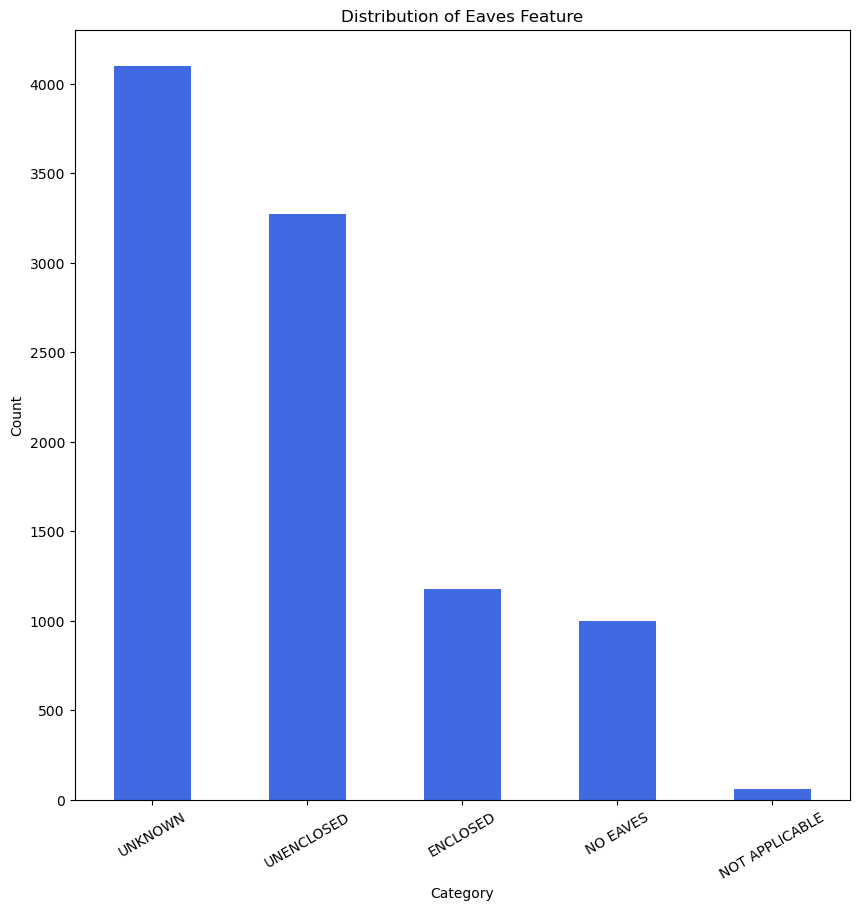

In [162]:
#Count of each category in the 'Eaves' column
eaves_counts = df['Eaves'].value_counts()

#Bar plot
plt.figure(figsize=(10, 10))
eaves_counts.plot(kind='bar', color='royalblue')
plt.title('Distribution of Eaves Feature')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

**Decision:** Drop Eaves as a feature
- Eaves contains a high proportion of missing and unknown values, indicating that the data is incomplete
- Imputing values could add bias to the model

In [163]:
# Drop Eaves
df = df.drop("Eaves", axis=1)

In [164]:
df.dtypes

ObjectID                    int64
Damage                   category
StreetNumber              float64
StreetName               category
StreetType               category
State                    category
ZipCode                  category
CALFIREUnit              category
County                   category
IncidentStartDate        category
StructureType            category
StructureCategory        category
RoofConstruction           object
VentScreen               category
ExteriorSiding           category
WindowPane               category
Deck/PorchOnGrade        category
Deck/PorchElevated       category
AssessedImprovedValue     float64
YearBuilt                 float64
SiteAddress                object
Latitude                  float64
Longitude                 float64
dtype: object

#### 2.2 Outliers

2.2.1 AssessedImprovedValue
- Minimum value of 0.0 likely represents missing or placeholder data
- The standard deviation (8.67 million) is much larger than the mean (658,700), suggesting extreme variation and potential outliers
- The maximum value (522 million) is extremely high compared to the 75th percentile (339,586), suggesting high outliers

In [165]:
# Print table with continuous statistics
df['AssessedImprovedValue'].describe().T

count    9.497000e+03
mean     6.587008e+05
std      8.669051e+06
min      0.000000e+00
25%      7.085800e+04
50%      1.597400e+05
75%      3.395860e+05
max      5.226526e+08
Name: AssessedImprovedValue, dtype: float64

In [166]:
num_zeros = (df["AssessedImprovedValue"] == 0).sum()
zero_percentage = (num_zeros) / len(df) * 100
print(f"Number of zero values: {num_zeros}")
print(f"Percentage of values that are 0: {zero_percentage}")

Number of zero values: 410
Percentage of values that are 0: 4.1000000000000005


In [167]:
len(df['AssessedImprovedValue'].dropna())

9497

Running Assessment: Because zero values for this feature only make up a small percentage of records, we will consider keeping these records with zero values. We will revisit this decision after resolving outliers 

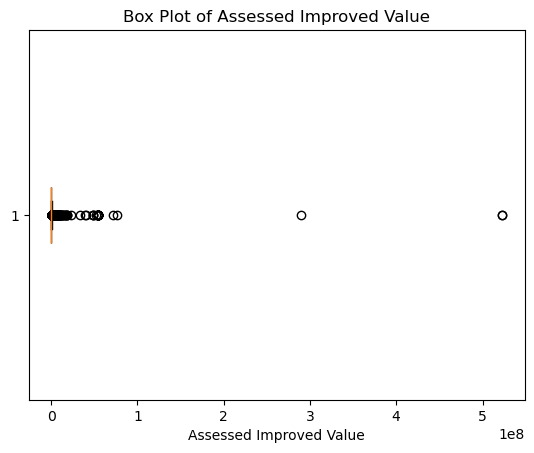

In [168]:
df_value_outliers = df['AssessedImprovedValue'].dropna()
plt.boxplot(df_value_outliers, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot of Assessed Improved Value")
plt.xlabel("Assessed Improved Value")
plt.show()

**Observations:**
- Positive skew in the distribution, indicating that the majority of values are grouped towards the low end. There are a few large values pulling the distribution toward the right

**Decision:** Use the following methods to control extreme outliers and normalize the values
- Capping: Apply the 90th percentile to cap extreme outliers. Outliers that could disproportionately influence analysis will be limited to preserve integrity of the distribution
- Log transformation: Compress the entire range of values to reduce skew in the distribution. Will perform log(x + 1) because log(0) is undefined

Capping Extreme Values

In [169]:
#Calculate 99th percentile
upper_percentile = df['AssessedImprovedValue'].quantile(0.99)

#Set lower_percentile to 0 to include zero values in the dataset
lower_percentile = 0

#Cap the values up to the 99th percentile
df['AssessedImprovedValue'] = np.clip(df['AssessedImprovedValue'], lower_percentile, upper_percentile)

In [170]:
#Updated statistics
df['AssessedImprovedValue'].describe().T

count    9.497000e+03
mean     3.554894e+05
std      6.707535e+05
min      0.000000e+00
25%      7.085800e+04
50%      1.597400e+05
75%      3.395860e+05
max      4.963876e+06
Name: AssessedImprovedValue, dtype: float64

**Observations:**
- The maximum value has been reduced to 4.96 million after capping at the 90th percentile
- There is still a positive skew but will apply the log transformation to see if it normalizes the data sufficiently

In [171]:
#Apply log(1 + x) transformation in place on the AssessedImprovedValue column
df['AssessedImprovedValue'] = np.log1p(df['AssessedImprovedValue'])

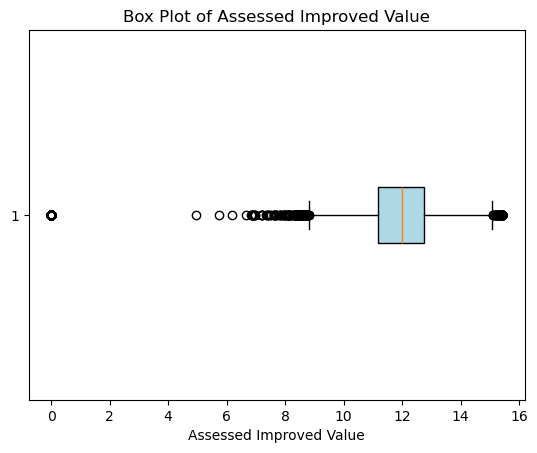

In [172]:
df_value_outliers = df['AssessedImprovedValue'].dropna()
plt.boxplot(df_value_outliers, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot of Assessed Improved Value")
plt.xlabel("Assessed Improved Value")
plt.show()

Applied the log transformation in place, as we will be using the normalized values for analysis going forward

In [173]:
df['AssessedImprovedValue'].describe()

count    9497.000000
mean       11.493406
std         2.752611
min         0.000000
25%        11.168447
50%        11.981309
75%        12.735485
max        15.417698
Name: AssessedImprovedValue, dtype: float64

Review of Summary Statistics Post-Capping and Log Transformation:
- The post-capping and log-transformed dataset now has more manageable statistics, with reduced skew and extreme values
- The transformation has compressed the distribution of the AssessedImprovedValue, making the data more suitable for analysis, modeling, and visualization
- The reduced spread (lower standard deviation) and the centering of values around the median indicate that the transformation has been successful in normalizing the dataset

In [174]:
# Still have NaN values for AssessedImprovedValue
df['AssessedImprovedValue'].isna().sum()

np.int64(503)

In [175]:
# Number of records with 0
df[df['AssessedImprovedValue'] == 0].shape[0]

410

In [176]:
df['AssessedImprovedValue'].describe()

count    9497.000000
mean       11.493406
std         2.752611
min         0.000000
25%        11.168447
50%        11.981309
75%        12.735485
max        15.417698
Name: AssessedImprovedValue, dtype: float64

After performing median imputation, we no longer have null values for AssessedImprovedValue

**Decision:** Apply median imputation to NaN values
- Because the data for AssessedImprovedValue is skewed, imputation with the median will provide a representative central value
- Filling with the minimum value (0) would exacerbate the skew of distribution
- Median imputation is simple to implement and less sensitive to outliers in the data

In [177]:
median_assessed_value = df['AssessedImprovedValue'].median()
df['AssessedImprovedValue'] = df['AssessedImprovedValue'].fillna(median_assessed_value)

In [178]:
df['AssessedImprovedValue'].isna().sum()

np.int64(0)

2.2.2 YearBuilt

In the data quality report, noted that ~23% of records contain null values for YearBuilt

In [179]:
df['YearBuilt'].isnull().sum()

np.int64(2383)

0 values are also present in the dataset. Because 0 is not a logical value for the year that a property was built, 0 is being used as a placeholder for missing values

In [180]:
df[df['YearBuilt'] == 0].shape[0]

795

**Decision:** Consistently use 0 as a placeholder for missing values by replacing null values with 0 (imputation)

In [181]:
df['YearBuilt'].fillna(0, inplace=True)
df['YearBuilt'].isnull().sum()

np.int64(0)

In [182]:
#Assessing summary statistics for YearBuilt (excluding placeholders)
df_year_nonnull = df[df['YearBuilt'] != 0]
df_year_nonnull['YearBuilt'].describe()

count    6822.000000
mean     1965.162269
std        27.031129
min      1776.000000
25%      1948.000000
50%      1966.000000
75%      1986.000000
max      2022.000000
Name: YearBuilt, dtype: float64

Observations:
- The mean is around 1965, with a relatively small standard deviation of 27 years
- The mean is close to the median, indicating that the distribution of data is relatively symmmetric
- The range of Q1 and Q3 indicate that most properties were constructed in the mid 20th century

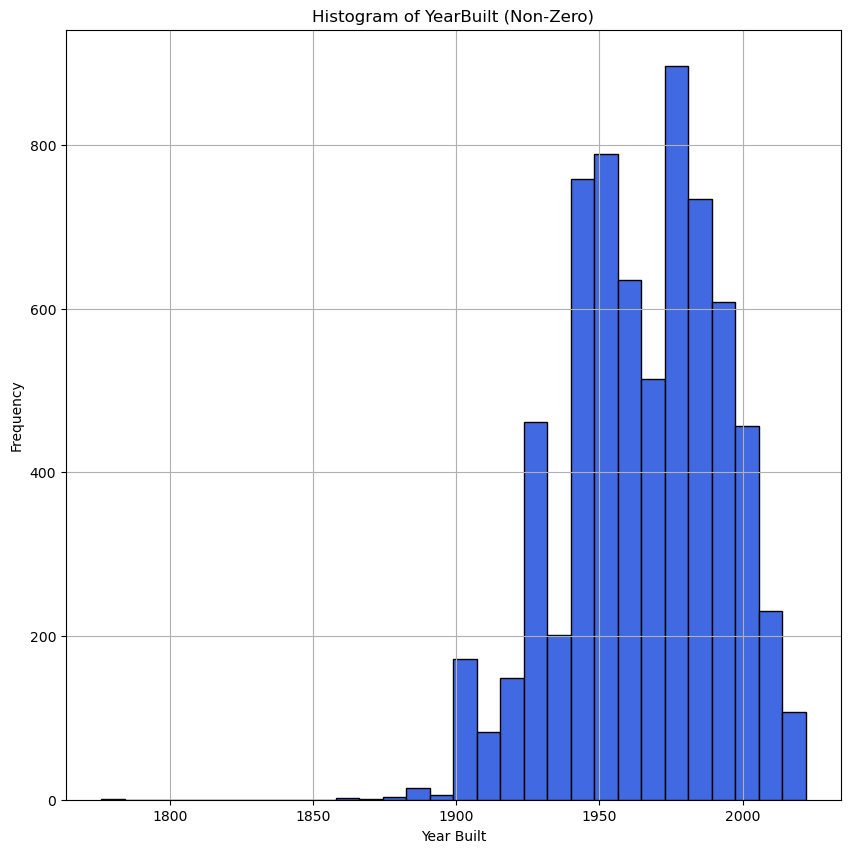

In [183]:
#Plot histogram to visualize distribution on non-zero values
plt.figure(figsize=(10, 10))
plt.hist(df_year_nonnull['YearBuilt'], bins=30, color='royalblue', edgecolor='black')
plt.title('Histogram of YearBuilt (Non-Zero)')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Decision:** Because the non-zero YearBuilt values seem to follow a normal distribution, use median imputation to replace zero values

In [184]:
median_year = df_year_nonnull['YearBuilt'].median()
df['YearBuilt'].replace(0, median_year, inplace=True)

In [185]:
#Convert to integer
df['YearBuilt'] = df['YearBuilt'].astype('Int64')

In [186]:
df['YearBuilt'].describe()

count      10000.0
mean     1965.4285
std      22.329356
min         1776.0
25%         1955.0
50%         1966.0
75%         1978.0
max         2022.0
Name: YearBuilt, dtype: Float64

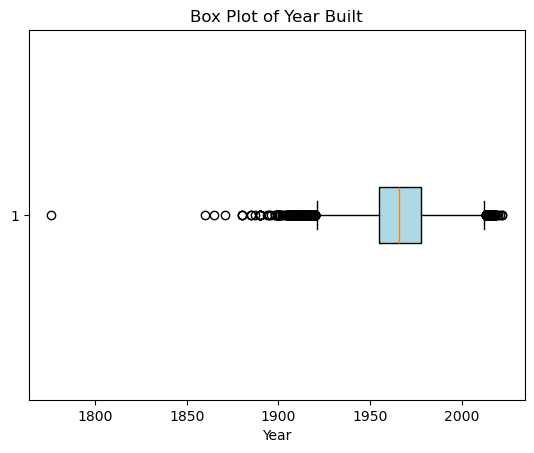

In [187]:
df_year = df['YearBuilt']
plt.boxplot(df_year, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot of Year Built")
plt.xlabel("Year")
plt.show()

In [188]:
# No longer have years recorded as 0
df[df['YearBuilt'] == 0].shape[0]

0

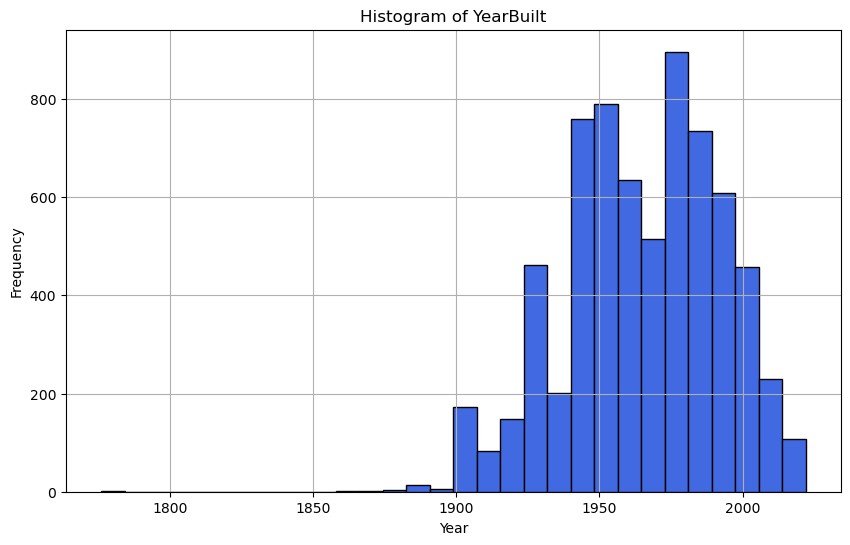

In [189]:
# Plot histogram to visualize distribution on non-zero values
plt.figure(figsize=(10, 6))
plt.hist(df_year_nonnull['YearBuilt'], bins=30, color='royalblue', edgecolor='black')
plt.title('Histogram of YearBuilt')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### 2.3 High Cardinality Features

2.3.1 StreetNumber
- In the dataset, there are 5,707 unique streets numbers
- StreetNumber has high cardinality because each record corresponds to a specific property
- We do not need StreetNumber as a unique identifier for records (ObjectID serves as the primary key)
- Street numbers are unlikely are unlikely to have predictive value in understanding the likelihood of wildfire damage. We can perform location-based analysis via features such as ZipCode and County
- The number of unique values could lead to overfitting in the model <br> <br>
**Decision:** Drop StreetNumber as a feature


In [190]:
df = df.drop("StreetNumber", axis=1)

In [191]:
df.dtypes

ObjectID                    int64
Damage                   category
StreetName               category
StreetType               category
State                    category
ZipCode                  category
CALFIREUnit              category
County                   category
IncidentStartDate        category
StructureType            category
StructureCategory        category
RoofConstruction           object
VentScreen               category
ExteriorSiding           category
WindowPane               category
Deck/PorchOnGrade        category
Deck/PorchElevated       category
AssessedImprovedValue     float64
YearBuilt                   Int64
SiteAddress                object
Latitude                  float64
Longitude                 float64
dtype: object

2.3.2 StreetName
- In the dataset, there are 4,506 unique streets names
- Street names are unlikely are unlikely to have predictive value in understanding the likelihood of wildfire damage. We can perform location-based analysis via features such as ZipCode and County
- The number of unique values could lead to overfitting in the model <br> <br>
**Decision:** Drop StreetName as a feature

In [192]:
df = df.drop("StreetName", axis=1)

In [193]:
df.dtypes

ObjectID                    int64
Damage                   category
StreetType               category
State                    category
ZipCode                  category
CALFIREUnit              category
County                   category
IncidentStartDate        category
StructureType            category
StructureCategory        category
RoofConstruction           object
VentScreen               category
ExteriorSiding           category
WindowPane               category
Deck/PorchOnGrade        category
Deck/PorchElevated       category
AssessedImprovedValue     float64
YearBuilt                   Int64
SiteAddress                object
Latitude                  float64
Longitude                 float64
dtype: object

2.3.3 County

In [194]:
county_counts = df['County'].value_counts(dropna=False)
county_counts_df = county_counts.reset_index()
county_counts_df.columns = ['County', 'Count']
county_counts_df

,County,Count
0,LOS ANGELES,2626
1,BUTTE,2250
2,SONOMA,933
3,NAPA,479
4,SANTA CRUZ,351
5,EL DORADO,340
6,PLUMAS,278
7,SHASTA,262
8,VENTURA,241
9,LAKE,238


**Set the cardinality threshold at 90%**
- Will keep categories that make up 90% of records as separate categories. The rest of the less frequently recorded categories will be grouped into 'Other'
- This will reduce the complexity of handling a high cardinality feature while preserving the most represented categories

In [195]:
#Initialize accumulator
accumulator = 0

#Get the counts for each county
county_counts = df['County'].value_counts()
counties = []

#Loop through the counties until the accumulator exceeds 9000
for county, count in county_counts.items():
    accumulator += count
    counties.append(county)
    if accumulator > 9000:
        break

print(f"Total records accumulated: {accumulator}")
print(counties)
print(len(counties))

Total records accumulated: 9043
['LOS ANGELES', 'BUTTE', 'SONOMA', 'NAPA', 'SANTA CRUZ', 'EL DORADO', 'PLUMAS', 'SHASTA', 'VENTURA', 'LAKE', 'FRESNO', 'ORANGE', 'SOLANO', 'SISKIYOU', 'KERN', 'RIVERSIDE', 'MARIPOSA']
17


**Decision:** Reduce cardinality while preserving the 17 most frequently used categories as separate categories. Group the remaining rare categories into new category 'Other'

In [196]:
county_counts = df['County'].value_counts()

top_counties = county_counts.head(17).index

df['County'] = np.where(df['County'].isin(top_counties), df['County'], 'OTHER')

print(df['County'].value_counts())

County
LOS ANGELES    2626
BUTTE          2250
OTHER           957
SONOMA          933
NAPA            479
SANTA CRUZ      351
EL DORADO       340
PLUMAS          278
SHASTA          262
VENTURA         241
LAKE            238
FRESNO          230
ORANGE          209
SOLANO          163
SISKIYOU        151
KERN            113
RIVERSIDE        93
MARIPOSA         86
Name: count, dtype: int64


Reasons for applying a cardinality threshold:
- Reduce dimensionality of the dataset
- Focus analysis on key categories
- Reduce noise within the feature

2.3.3 StreetType

In [197]:
street_type_counts

StreetType
ROAD         3441
DRIVE        1639
NaN          1112
LANE          838
STREET        763
AVENUE        721
WAY           376
COURT         310
PLACE         153
OTHER         149
TRAIL         128
HIGHWAY       104
CIRCLE        103
BOULEVARD      87
ROUTE          26
TERRACE        20
LOOP           15
ALLEY           6
PARKWAY         6
-               2
PASS            1
Name: count, dtype: int64

In [198]:
len(df['StreetType'].unique())

21

**Set the cardinality threshold at 90%**
- Will keep categories that make up 90% of records as separate categories. The rest of the less frequently recorded categories will be grouped into 'Other'
- This will reduce the complexity of handling a high cardinality feature while preserving the most represented categories

In [199]:
# Initialize accumulator
accumulator = 0
street_types = []

# Loop through the StreetTypes until the accumulator exceeds 9000
for street_type, count in street_type_counts.items():
    accumulator += count
    street_types.append(street_type)
    if accumulator > 9000:
        break

print(f"Total records accumulated: {accumulator}")
print(street_types)
print(len(street_types))

Total records accumulated: 9200
['ROAD', 'DRIVE', nan, 'LANE', 'STREET', 'AVENUE', 'WAY', 'COURT']
8


Based on the above analysis, cardinality would still be high after applying a 90% threshold. We will inspect the distribution of the categories for StreetType

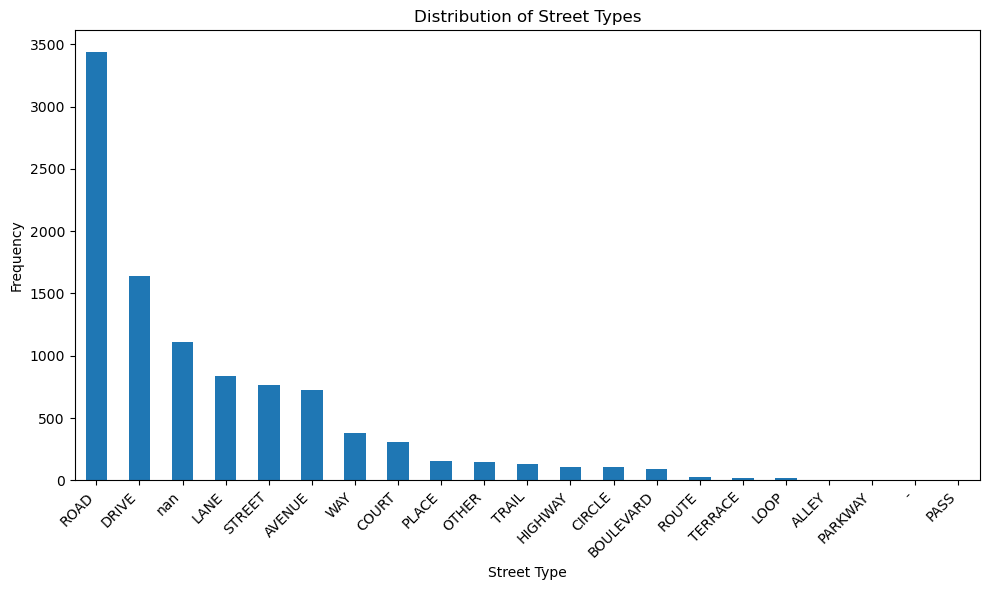

In [200]:
# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
street_type_counts.plot(kind='bar')

# Add labels and title
plt.title('Distribution of Street Types')
plt.xlabel('Street Type')
plt.ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate and align labels

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()


**Observations**
- Road is the dominant StreetType
- There is a long tail distribution, indicating that a large number of street types each account for a small portion of the data


**Set the cardinality threshold at 85%**
- Will keep categories that make up 90% of records as separate categories. The rest of the less frequently recorded categories will be grouped into 'Other'
- This will reduce the complexity of handling a high cardinality feature while preserving the most represented categories

In [201]:
# Initialize accumulator
accumulator = 0
street_types = []

# Loop through the StreetTypes until the accumulator exceeds 9000
for street_type, count in street_type_counts.items():
    accumulator += count
    street_types.append(street_type)
    if accumulator > 8500:
        break

print(f"Total records accumulated: {accumulator}")
print(street_types)
print(len(street_types))

Total records accumulated: 8514
['ROAD', 'DRIVE', nan, 'LANE', 'STREET', 'AVENUE']
6


After setting the cardinality threshold at 85%, the cardinality for StreetType will be reduced to 10. We will proceed with this threshold

In [202]:
top_street_types = street_type_counts.head(10).index

df['StreetType'] = np.where(df['StreetType'].isin(top_street_types), df['StreetType'], 'OTHER')

print(df['StreetType'].value_counts())

StreetType
ROAD      3441
DRIVE     1639
LANE       838
STREET     763
AVENUE     721
OTHER      647
WAY        376
COURT      310
PLACE      153
Name: count, dtype: int64


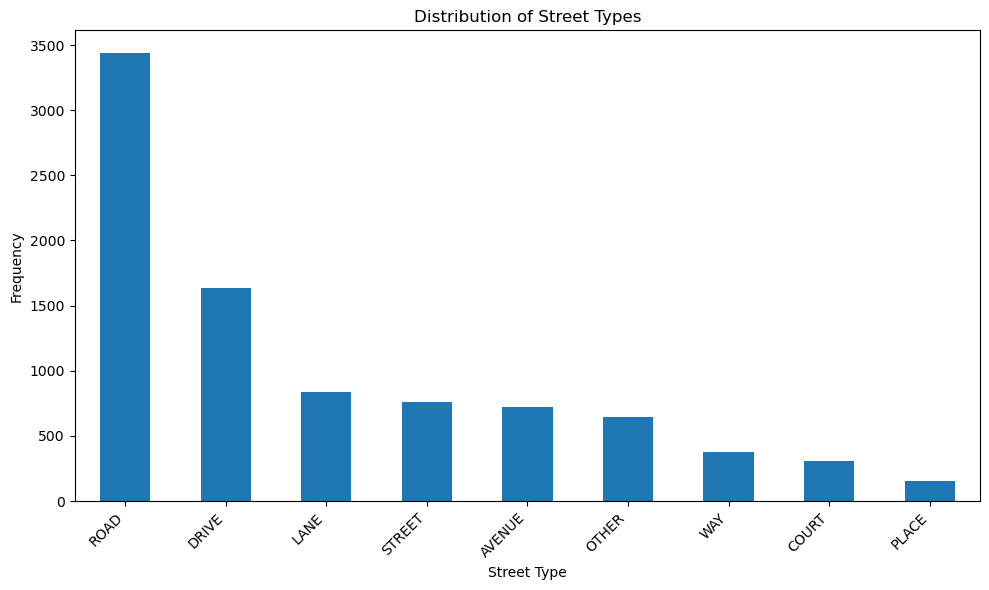

In [203]:
street_type_counts = df['StreetType'].value_counts()

plt.figure(figsize=(10, 6))  
street_type_counts.plot(kind='bar')

plt.title('Distribution of Street Types')
plt.xlabel('Street Type')
plt.ylabel('Frequency')

plt.xticks(rotation=45, ha='right')  


plt.tight_layout() 
plt.show()

In [204]:
df['StreetType'].isnull().sum()

np.int64(1112)

After reducing cardinality through grouping, there are no null values for StreetType

#### 2.4 Low Cardinality Features

2.4.1. State
- Noted that there is one unique value for the categorical feature State (CA) 
- State does not add distinguishing information across records
- Location details are sufficiently captured by ZipCode, Latitude, and Longitude<br> <br>
**Decision:** Drop State as a feature

In [205]:
df = df.drop("State", axis=1)

In [206]:
df.dtypes

ObjectID                    int64
Damage                   category
StreetType                 object
ZipCode                  category
CALFIREUnit              category
County                     object
IncidentStartDate        category
StructureType            category
StructureCategory        category
RoofConstruction           object
VentScreen               category
ExteriorSiding           category
WindowPane               category
Deck/PorchOnGrade        category
Deck/PorchElevated       category
AssessedImprovedValue     float64
YearBuilt                   Int64
SiteAddress                object
Latitude                  float64
Longitude                 float64
dtype: object

#### 2.5 Redundant Features

2.5.1 StructureType & StructureCategory

In [207]:
type_counts_df = df['StructureType'].value_counts(dropna=False)
type_counts_df.columns = ['StructureType', 'Count']
type_counts_df

StructureType
SINGLE FAMILY RESIDENCE SINGLE STORY           3645
UTILITY MISC STRUCTURE                         2695
SINGLE FAMILY RESIDENCE MULTI STORY            2147
MOBILE HOME DOUBLE WIDE                         483
COMMERCIAL BUILDING SINGLE STORY                266
MOBILE HOME SINGLE WIDE                         239
MOTOR HOME                                      129
MULTI FAMILY RESIDENCE MULTI STORY              102
INFRASTRUCTURE                                   61
MULTI FAMILY RESIDENCE SINGLE STORY              54
SCHOOL                                           53
MOBILE HOME TRIPLE WIDE                          47
COMMERCIAL BUILDING MULTI STORY                  38
MIXED COMMERCIAL RESIDENTIAL                     25
CHURCH                                           11
UTILITY OR MISCELLANEOUS STRUCTURE 120 SQFT       4
HOSPITAL                                          1
Name: count, dtype: int64

In [208]:
cat_counts_df = df['StructureCategory'].value_counts(dropna=False)
cat_counts_df.columns = ['StructureCategory', 'Count']
cat_counts_df

StructureCategory
SINGLE RESIDENCE                6709
OTHER MINOR STRUCTURE           2699
NONRESIDENTIAL COMMERCIAL        369
MULTIPLE RESIDENCE               137
INFRASTRUCTURE                    61
MIXED COMMERCIAL RESIDENTIAL      25
Name: count, dtype: int64

Observations:
- StructureType appears to be a more granular view of StructureCategory

**Decision:** Apply a cardinality threshold of 90% to StructureType and drop StructureCategory as a feature. Combine Unknown and NaN categories
- StructureCategory is a higher-level classification that overlaps with much of the information already provided by StructureType. Keeping both features may introduce redundancy without contributing additional insights to the model
- Applying a cardinality threshold to StructureType retains the majority of meaningful data while reducing noise from less frequent categories, improving model performance and reducing feature complexity


In [209]:
# Initialize accumulator
accumulator = 0

# Get the counts for each county
structure_type_counts = df['StructureType'].value_counts()
types = []

# Loop through the counties until the accumulator exceeds 9000
for type, count in structure_type_counts.items():
    types.append(type)
    if accumulator > 9000:
        break
    accumulator += count

print(f"Total records accumulated: {accumulator}")
print(types)
print(len(types))

Total records accumulated: 9236
['SINGLE FAMILY RESIDENCE SINGLE STORY', 'UTILITY MISC STRUCTURE', 'SINGLE FAMILY RESIDENCE MULTI STORY', 'MOBILE HOME DOUBLE WIDE', 'COMMERCIAL BUILDING SINGLE STORY', 'MOBILE HOME SINGLE WIDE']
6


In [210]:
structure_type_counts = df['StructureType'].value_counts()

top_types = structure_type_counts.head(6).index

df['StructureType'] = np.where(df['StructureType'].isin(top_types), df['StructureType'], 'OTHER')

print(df['StructureType'].value_counts())

StructureType
SINGLE FAMILY RESIDENCE SINGLE STORY    3645
UTILITY MISC STRUCTURE                  2695
SINGLE FAMILY RESIDENCE MULTI STORY     2147
OTHER                                    525
MOBILE HOME DOUBLE WIDE                  483
COMMERCIAL BUILDING SINGLE STORY         266
MOBILE HOME SINGLE WIDE                  239
Name: count, dtype: int64


In [211]:
# Drop StructureCategory
df = df.drop("StructureCategory", axis=1)

In [212]:
df.dtypes

ObjectID                    int64
Damage                   category
StreetType                 object
ZipCode                  category
CALFIREUnit              category
County                     object
IncidentStartDate        category
StructureType              object
RoofConstruction           object
VentScreen               category
ExteriorSiding           category
WindowPane               category
Deck/PorchOnGrade        category
Deck/PorchElevated       category
AssessedImprovedValue     float64
YearBuilt                   Int64
SiteAddress                object
Latitude                  float64
Longitude                 float64
dtype: object

2.5.2 VentScreen

In [213]:
vent_df = df['VentScreen'].value_counts(dropna=False)
vent_df.columns = ['VentScreen', 'Count']
vent_df

VentScreen
UNKNOWN           4097
UNENCLOSED        3271
ENCLOSED          1176
NO EAVES           997
NaN                398
NOT APPLICABLE      61
Name: count, dtype: int64

Observations
- There are null values for VentScreen

In [214]:
#Count of each StructureType
structure_counts = df['StructureType'].value_counts(normalize=True)  # Overall distribution

#Count occurrences where Vent is 'Unknown' or NaN
unknown_vent = df[df['VentScreen'].isin(['Unknown', np.nan])]['StructureType'].value_counts()

#Proportion of 'Unknown' RoofConstruction within each StructureType
unknown_vent_prop = unknown_vent / df['StructureType'].value_counts()

# Merge both distributions for comparison
comparison_df = pd.DataFrame({
    'Overall_StructureType_Distribution': structure_counts,
    'Unknown_Vent_Proportion': unknown_vent_prop
}).fillna(0)

comparison_df = comparison_df.sort_values(by='Unknown_Vent_Proportion', ascending=False)

# Display the top structure types where 'Unknown' in RoofConstruction is most common
print(comparison_df.head(10))


                                      Overall_StructureType_Distribution  \
StructureType                                                              
MOBILE HOME DOUBLE WIDE                                           0.0483   
COMMERCIAL BUILDING SINGLE STORY                                  0.0266   
MOBILE HOME SINGLE WIDE                                           0.0239   
OTHER                                                             0.0525   
SINGLE FAMILY RESIDENCE SINGLE STORY                              0.3645   
UTILITY MISC STRUCTURE                                            0.2695   
SINGLE FAMILY RESIDENCE MULTI STORY                               0.2147   

                                      Unknown_Vent_Proportion  
StructureType                                                  
MOBILE HOME DOUBLE WIDE                              0.091097  
COMMERCIAL BUILDING SINGLE STORY                     0.082707  
MOBILE HOME SINGLE WIDE                              0.0669

<Figure size 1200x600 with 0 Axes>

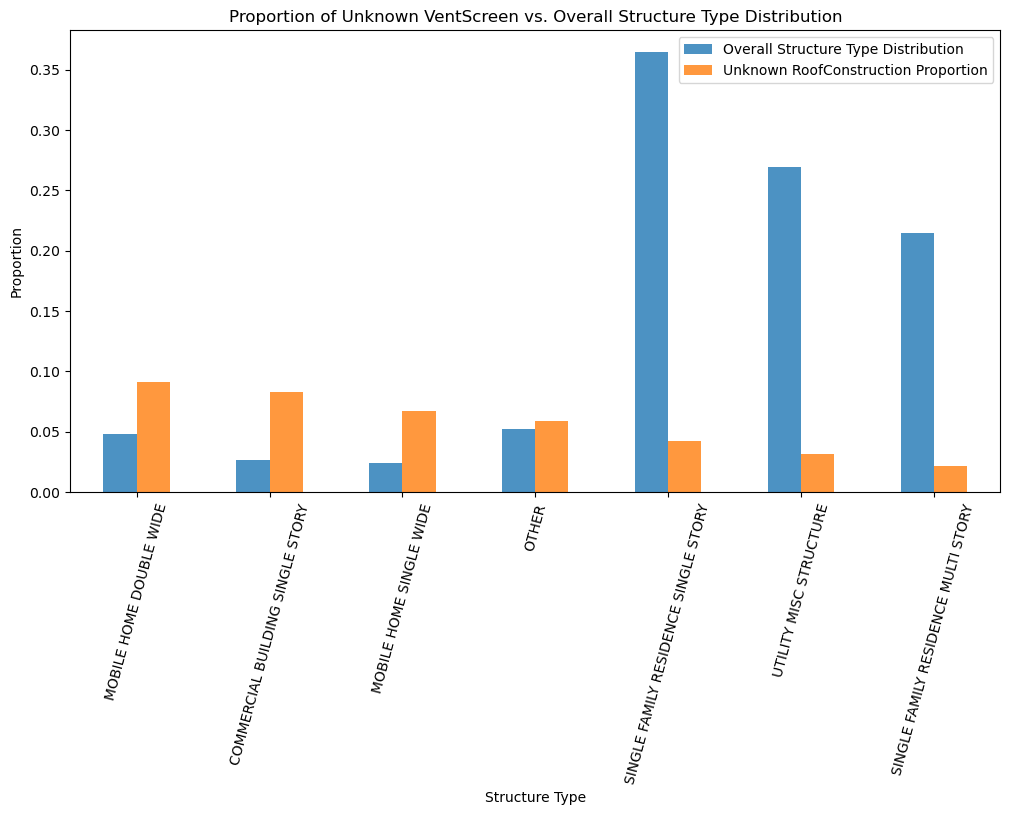

In [215]:
plt.figure(figsize=(12, 6))

# Bar chart comparing distributions
comparison_df.plot(kind='bar', figsize=(12, 6), alpha=0.8)
plt.title("Proportion of Unknown VentScreen vs. Overall Structure Type Distribution")
plt.ylabel("Proportion")
plt.xlabel("Structure Type")
plt.xticks(rotation=75)
plt.legend(["Overall Structure Type Distribution", "Unknown RoofConstruction Proportion"])
plt.show()


**Observations:** <br>
- It appears that certain StructureType categories are dispropportionately affected by Unknown/NaN values (i.e., Commercial Building Single Story, mobile homes)


**Decision:** Perform imputation based on structure type to fill Unknown or NaN values with the most frequent value within the same StructureType

In [216]:
df['VentScreen'] = df['VentScreen'].replace('Unknown', pd.NA)  #Replace 'Unknown' with NaN
df['VentScreen'] = df['VentScreen'].fillna(df.groupby('StructureType')['VentScreen'].transform(lambda x: x[x != 'Unknown'].mode()[0] if not x[x != 'Unknown'].mode().empty else 'Unknown'))

In [217]:
vent_df = df['VentScreen'].value_counts(dropna=False)
vent_df.columns = ['VentScreen', 'Count']
vent_df

VentScreen
UNKNOWN           4464
UNENCLOSED        3271
ENCLOSED          1176
NO EAVES          1028
NOT APPLICABLE      61
Name: count, dtype: int64

**Summary of Actions**
- Observed that certain StructureType categories were disproportinately affected by null values in VentScreen. This indicated that the likelihood of a missing value for VentScreen is not random but instead related to the type of structure
- Accounted for these dependencies by grouping by StructureType and then imputing the mode for each specific type of structure

2.5.3 SiteAddress
- Composite feature that includes complete address

**Decision:** Drop feature, as its values are captured by other attributes

In [218]:
df = df.drop("SiteAddress", axis=1)

#### 2.6 Cleaning Category Labels

In [219]:
siding_df = df['ExteriorSiding'].value_counts(dropna=False)
siding_df.columns = ['ExteriorSiding', 'Count']
siding_df

ExteriorSiding
STUCCO BRICK CEMENT    2672
WOOD                   2200
COMBUSTIBLE            1637
UNKNOWN                1353
IGNITION RESISTANT      707
FIRE RESISTANT          482
NaN                     393
METAL                   356
VINYL                   106
OTHER                    94
Name: count, dtype: int64

**Observations:** 
- Stucco Brick Cement and Stucco/Brick/Cement likely refer to the same type of exterior and are inconsistencies in labeling
- As reported in the data quality report, ~ 17% of records are missing values for ExteriorSiding

In [220]:
df['ExteriorSiding'] = df['ExteriorSiding'].str.strip().str.replace(r'Stucco/Brick/Cement', 'Stucco Brick Cement', regex=True)

In [221]:
siding_df = df['ExteriorSiding'].value_counts(dropna=False)
siding_df.columns = ['ExteriorSiding', 'Count']
siding_df

ExteriorSiding
STUCCO BRICK CEMENT    2672
WOOD                   2200
COMBUSTIBLE            1637
UNKNOWN                1353
IGNITION RESISTANT      707
FIRE RESISTANT          482
NaN                     393
METAL                   356
VINYL                   106
OTHER                    94
Name: count, dtype: int64

In [222]:
#Get value counts including NaN
siding_df = df['ExteriorSiding'].value_counts(dropna=False)

siding_df = siding_df.reset_index()
siding_df.columns = ['ExteriorSiding', 'Count']

siding_df['Proportion'] = siding_df['Count'] / df['ExteriorSiding'].count()

siding_df


,ExteriorSiding,Count,Proportion
0,STUCCO BRICK CEMENT,2672,0.278131
1,WOOD,2200,0.229000
2,COMBUSTIBLE,1637,0.170397
3,UNKNOWN,1353,0.140835
4,IGNITION RESISTANT,707,0.073592
5,FIRE RESISTANT,482,0.050172
6,NaN,393,0.040908
7,METAL,356,0.037056
8,VINYL,106,0.011034
9,OTHER,94,0.009785


**Decision:** Reduce cardinality by grouping categories that appear in less than 5% of records into Other and grouping NaN records with Unknown. Combine Fire Resistant and Ignition Resistant
- Both Fire Resistant and Ignition Resistant refer to materials that are designed to withstand fire and ignition. Group these two categories into a single category reduces the cardinality of the feature

In [223]:
df['ExteriorSiding'] = df['ExteriorSiding'].str.strip().str.replace(r'METAL', 'OTHER', regex=True)
df['ExteriorSiding'] = df['ExteriorSiding'].str.strip().str.replace(r'VINYL', 'OTHER', regex=True)
df['ExteriorSiding'] = df['ExteriorSiding'].str.strip().str.replace(r'FIRE RESISTANT', 'FIRE/IGNITION RESISTANT', regex=True)
df['ExteriorSiding'] = df['ExteriorSiding'].str.strip().str.replace(r'IGNITION RESISTANT', 'FIRE/IGNITION RESISTANT', regex=True)
df['ExteriorSiding'] = df['ExteriorSiding'].str.strip().replace('UNKNOWN', np.nan)

In [224]:
#Get value counts including NaN
siding_df = df['ExteriorSiding'].value_counts(dropna=False)

siding_df = siding_df.reset_index()
siding_df.columns = ['ExteriorSiding', 'Count']

siding_df['Proportion'] = siding_df['Count'] / df['ExteriorSiding'].count()

siding_df

,ExteriorSiding,Count,Proportion
0,STUCCO BRICK CEMENT,2672,0.323722
1,WOOD,2200,0.266537
2,NaN,1746,0.211534
3,COMBUSTIBLE,1637,0.198328
4,FIRE/IGNITION RESISTANT,707,0.085655
5,OTHER,556,0.067361
6,FIRE/FIRE/IGNITION RESISTANT,482,0.058396


In [225]:
# Replace the incorrect duplicate category with the correct one
df['ExteriorSiding'] = df['ExteriorSiding'].replace('FIRE/FIRE/IGNITION RESISTANT', 'FIRE/IGNITION RESISTANT')

In [226]:
# Get value counts including NaN
siding_df = df['ExteriorSiding'].value_counts(dropna=False)

# Convert the series to a DataFrame and reset the column names
siding_df = siding_df.reset_index()
siding_df.columns = ['ExteriorSiding', 'Count']

# Calculate the proportions
siding_df['Proportion'] = siding_df['Count'] / df['ExteriorSiding'].count()

# Display the result
siding_df

,ExteriorSiding,Count,Proportion
0,STUCCO BRICK CEMENT,2672,0.323722
1,WOOD,2200,0.266537
2,NaN,1746,0.211534
3,COMBUSTIBLE,1637,0.198328
4,FIRE/IGNITION RESISTANT,1189,0.144051
5,OTHER,556,0.067361


In [227]:
df['ExteriorSiding'] = df['ExteriorSiding'].fillna('UNKNOWN')

In [228]:
# Get value counts including NaN
siding_df = df['ExteriorSiding'].value_counts(dropna=False)

# Convert the series to a DataFrame and reset the column names
siding_df = siding_df.reset_index()
siding_df.columns = ['ExteriorSiding', 'Count']

# Calculate the proportions
siding_df['Proportion'] = siding_df['Count'] / df['ExteriorSiding'].count()

# Display the result
siding_df

,ExteriorSiding,Count,Proportion
0,STUCCO BRICK CEMENT,2672,0.2672
1,WOOD,2200,0.2200
2,UNKNOWN,1746,0.1746
3,COMBUSTIBLE,1637,0.1637
4,FIRE/IGNITION RESISTANT,1189,0.1189
5,OTHER,556,0.0556


### 2. Summary of Actions Performed

In [229]:
df.head(30)

,ObjectID,Damage,StreetType,ZipCode,CALFIREUnit,County,IncidentStartDate,StructureType,RoofConstruction,VentScreen,ExteriorSiding,WindowPane,Deck/PorchOnGrade,Deck/PorchElevated,AssessedImprovedValue,YearBuilt,Latitude,Longitude
0,63752,Destroyed (>50%),ROAD,95404,LNU,SONOMA,2017-10-08 00:00:00,SINGLE FAMILY RESIDENCE SINGLE STORY,FIRE RESISTANT,UNKNOWN,FIRE/IGNITION RESISTANT,MULTI PANE,MASONRY CONCRETE,NO DECK PORCH,10.939302,1966,38.501048,-122.685623
1,58216,Destroyed (>50%),NaN,95461,LNU,LAKE,2015-09-12 00:00:00,UTILITY MISC STRUCTURE,FIRE RESISTANT,UNKNOWN,COMBUSTIBLE,UNKNOWN,NO DECK PORCH,NO DECK PORCH,11.517465,1966,38.759144,-122.631672
2,20194,No Damage,ROAD,95969,BEU,OTHER,2020-08-16 00:00:00,SINGLE FAMILY RESIDENCE SINGLE STORY,ASPHALT,UNENCLOSED,WOOD,SINGLE PANE,NO DECK PORCH,NO DECK PORCH,11.635196,1972,36.417060,-121.674834
3,83242,No Damage,DRIVE,96150.0,AEU,EL DORADO,2021-08-14 00:00:00,SINGLE FAMILY RESIDENCE MULTI STORY,ASPHALT,ENCLOSED,WOOD,SINGLE PANE,WOOD,NO DECK PORCH,11.673547,1966,38.851438,-120.016628
4,128000,Destroyed (>50%),STREET,90272.0,LAC,LOS ANGELES,2025-01-07 08:02:00,UTILITY MISC STRUCTURE,ASPHALT,UNKNOWN,STUCCO BRICK CEMENT,NO WINDOWS,NO DECK PORCH,NO DECK PORCH,12.157733,1948,34.049564,-118.521175
5,80864,Destroyed (>50%),ROAD,95636.0,AEU,EL DORADO,2021-08-14 00:00:00,MOBILE HOME DOUBLE WIDE,OTHER,UNENCLOSED,OTHER,SINGLE PANE,UNKNOWN,NO DECK PORCH,11.751950,1966,38.642954,-120.514863
6,22149,No Damage,NaN,95969,CZU,SANTA CRUZ,2020-08-16 00:00:00,UTILITY MISC STRUCTURE,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,12.567680,1968,37.046336,-122.157093
7,121379,No Damage,AVENUE,90272.0,LAC,LOS ANGELES,2025-01-07 08:02:00,SINGLE FAMILY RESIDENCE MULTI STORY,TILE,ENCLOSED,STUCCO BRICK CEMENT,SINGLE PANE,MASONRY CONCRETE,NO DECK PORCH,14.474546,1992,34.062727,-118.542424
8,69372,Destroyed (>50%),NaN,95404,LNU,LAKE,2015-09-12 00:00:00,MOBILE HOME SINGLE WIDE,FIRE RESISTANT,UNKNOWN,UNKNOWN,SINGLE PANE,NO DECK PORCH,NO DECK PORCH,9.899429,1966,38.773449,-122.666922
9,20321,Destroyed (>50%),DRIVE,95969,BEU,OTHER,2020-08-16 00:00:00,UTILITY MISC STRUCTURE,ASPHALT,UNKNOWN,STUCCO BRICK CEMENT,SINGLE PANE,NO DECK PORCH,NO DECK PORCH,12.484390,1988,36.409540,-121.630501


In [230]:
df.shape

(10000, 18)

The dataset now has 19 features. It still has 10,000 rows because no records were dropped

In [231]:
df.isnull().any()

ObjectID                 False
Damage                   False
StreetType                True
ZipCode                  False
CALFIREUnit              False
County                   False
IncidentStartDate        False
StructureType            False
RoofConstruction         False
VentScreen               False
ExteriorSiding           False
WindowPane               False
Deck/PorchOnGrade        False
Deck/PorchElevated       False
AssessedImprovedValue    False
YearBuilt                False
Latitude                 False
Longitude                False
dtype: bool

In [232]:
df.dtypes

ObjectID                    int64
Damage                   category
StreetType                 object
ZipCode                  category
CALFIREUnit              category
County                     object
IncidentStartDate        category
StructureType              object
RoofConstruction           object
VentScreen               category
ExteriorSiding             object
WindowPane               category
Deck/PorchOnGrade        category
Deck/PorchElevated       category
AssessedImprovedValue     float64
YearBuilt                   Int64
Latitude                  float64
Longitude                 float64
dtype: object

There are no null/NaN values in the dataset

In [233]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
object_columns

#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes 

ObjectID                    int64
Damage                   category
StreetType               category
ZipCode                  category
CALFIREUnit              category
County                   category
IncidentStartDate        category
StructureType            category
RoofConstruction         category
VentScreen               category
ExteriorSiding           category
WindowPane               category
Deck/PorchOnGrade        category
Deck/PorchElevated       category
AssessedImprovedValue     float64
YearBuilt                   Int64
Latitude                  float64
Longitude                 float64
dtype: object

In [234]:
# Write the dataframe to a csv file
df.to_csv('PostDQP.csv', index=False)

| Feature Name                                               | Action Performed |
|------------------------------------------------------------|------------------|
| ObjectID                                                   | No changes                 |
| Damage                                                     | No changes                 |
| StreetNumber                                               | Dropped feature  |
| StreetName                                                 | Dropped feature  |
| StreetType                | Reduce cardinality by grouping                 |
| City                                                       | Dropped feature                 |
| State                                                      | Dropped feature                 |
| ZipCode                                                    | Imputation for missing values       |
| CALFIREUnit                                                | No changes                 |
| County                                                     | Reduced cardinality by grouping rare categories                 |
| Community                                                  | Dropped feature  |
| IncidentStartDate                                          | No changes                 |
| HazardType                                                 | Dropped feature                 |
| StructureType                                              | Reduced cardinality by grouping rare categories                 |
| StructureCategory                                          | Dropped feature                 |
| NumUnitsinStructure (if multiunit)                         | Dropped feature  |
| RoofConstruction                                           | Reduced cardinality by grouping rare categories                 |
| Eaves                                                      | Dropped feature                 |
| VentScreen                                                 | Performed mode imputation by StructureType                 |
| ExteriorSiding                                             | Reduced cardinality by grouping                 |
| WindowPane                                                 | Performed mode imputation by StructureType                    |
| Deck/PorchOnGrade                                          | Performed mode imputation by StructureType                 |
| Deck/PorchElevated                                         | Performed mode imputation by StructureType                    |
| PatioCover/CarportAttachedtoStructure                      | Dropped feature                 |
| FenceAttachedtoStructure                                   | Dropped feature                 |
| AssessedImprovedValue (parcel)                             | Capped values and performed log transformation. Performed median imputation for null values                 |
| YearBuilt (parcel)                                         | Median imputation for null and zero values|
| SiteAddress (parcel)                                       | Dropped feature                 |
| Latitude                                                   | No changes                 |
| Longitude                                                  | No changes                 |
